In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools

plt.rcParams["figure.figsize"] = [10, 10]

seed = 37
random.seed(seed)

In [19]:
def generate_clustering(n_clusters, n_points_per_cluster, distance_to_cluster):
    
    clusters = [np.random.random(2) for i in range(n_clusters)]
    points = []
    
    for cluster in clusters:
        for i in range(n_points_per_cluster):
            
            dist_vec = np.random.random(2) * distance_to_cluster
            points.append(cluster + dist_vec)
    
    return np.array(points)

In [20]:
points = generate_clustering(n_clusters=7, n_points_per_cluster=10, distance_to_cluster=0.2)

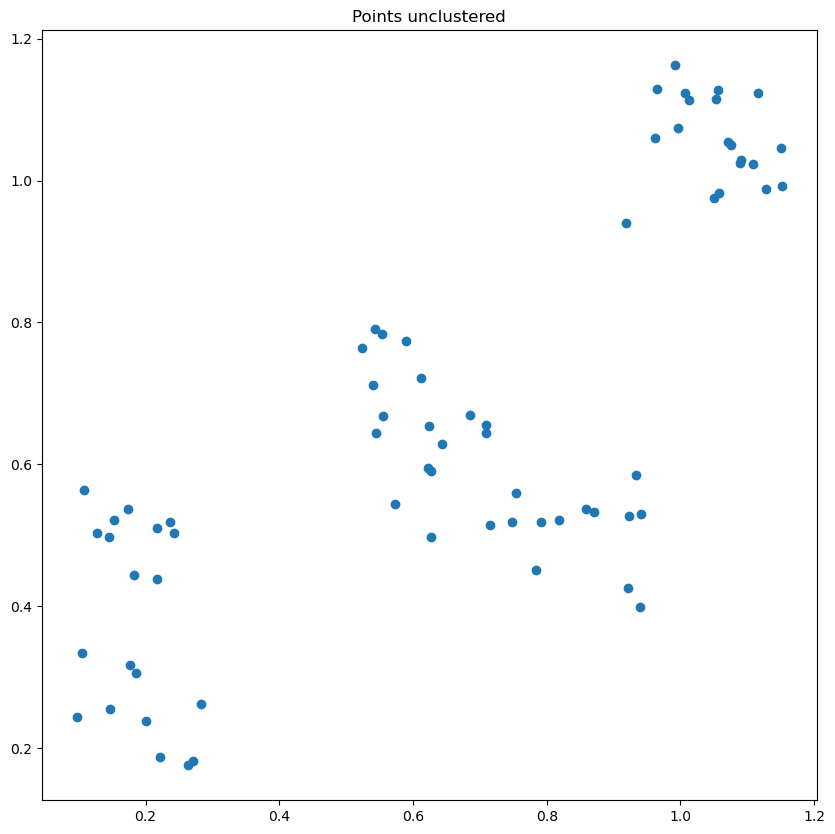

In [21]:
plt.title("Points unclustered")
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [50]:
class AgglomerativeClustering:
    
    def __init__(self, linkage_type):
        
        # linkage_type in {single_linkage, complete_linkage, average_linkage}
        self.linkage_type = linkage_type
        
        assert(linkage_type in ["single_linkage", "complete_linkage", "average_linkage"])
        
    def fit(self, points):
        
        # hier kommen die verschiedenen stufen des agglomerative clustering dran
        self.clusterings = []
        n = len(points)
        
        # meta informationen
        self.who_merged = []
        self.distance_at_merge = []
        
        points = np.hstack([points, np.zeros(n).reshape(-1, 1)])
        points[:, 2] = range(n)
        
        self.clusterings.append(points)
        
        curr_clustering = points
        
        while len(np.unique(curr_clustering[:, 2])) > 1:
            
            # finde distanzen zwischen clusters
            curr_labels = np.unique(curr_clustering[:, 2])
            
            min_dist = np.inf
            merge_those = None
            
            # finde kleinste distanz zwischen clusters
            for (c1, c2) in itertools.combinations(curr_labels, 2):
                
                # das haengt vom linkage type ab
                dist_clusters = None
                n_combinations = 0
                
                if self.linkage_type == "single_linkage":
                    dist_clusters = np.inf
                elif self.linkage_type == "complete_linkage":
                    dist_clusters = -np.inf
                elif self.linkage_type == "average_linkage":
                    dist_clusters = 0
                
                for c1_point in curr_clustering[curr_clustering[:, 2] == c1]:
                    for c2_point in curr_clustering[curr_clustering[:, 2] == c2]:
                        
                        dist = np.linalg.norm(c1_point[:2] - c2_point[:2])
                        
                        if self.linkage_type == "single_linkage":
                            dist_clusters = min(dist_clusters, dist)
                        elif self.linkage_type == "complete_linkage":
                            dist_clusters = max(dist_clusters, dist)
                        else:
                            dist_clusters += dist
                            n_combinations += 1
                            
                if self.linkage_type == "average_linkage":
                    dist_clusters /= n_combinations
                            
                if dist_clusters < min_dist:
                    min_dist = dist_clusters
                    merge_those = (c1, c2)
            
            (m1, m2) = merge_those
            # verschmelze, indem man labels aendert
            new_clustering = np.copy(curr_clustering)
            new_clustering[new_clustering[:, 2] == m2, 2] = m1
            
            self.who_merged.append(merge_those)
            self.distance_at_merge.append(min_dist)
            
            # haenge an clusterings an
            self.clusterings.append(new_clustering)
            # setze zu naechstem clustering
            curr_clustering = new_clustering
        
    def show_clusterings(self):
        
        for i, clustering in enumerate(self.clusterings):
            
            plt.title(f"Clustering Level {i+1} (#clusters={len(np.unique(clustering[:, 2]))})")
            plt.scatter(clustering[:, 0], clustering[:, 1], c=clustering[:, 2])
            
            # zeichne text
            for point in clustering:
                plt.text(point[0], point[1], int(point[2]))
            
            plt.show()
            
            # da immer gleich angehaengt wird bei who_merged und bei distance_at_merge
            if i < len(self.who_merged):
                (c1, c2) = self.who_merged[i]
                print(f"{c1} and {c2} merged at distance {self.distance_at_merge[i]}")
                
    
    def show_clustering(self, k=1):
        
        if k == 1:

            max_jump = 0
            clustering_at_max_jump = None

            for i in range(len(self.distance_at_merge)):

                if i == 0:
                    continue

                jump = self.distance_at_merge[i] - self.distance_at_merge[i-1]

                if jump > max_jump:
                    max_jump = jump
                    clustering_at_max_jump = self.clusterings[i+1]

            plt.title("Final clustering")
            plt.scatter(clustering_at_max_jump[:, 0], clustering_at_max_jump[:, 1], c=clustering_at_max_jump[:, 2])
            plt.show()
            
        else:
            clustering = self.clusterings[-k]
            plt.title("Final clustering")
            plt.scatter(clustering[:, 0], clustering[:, 1], c=clustering[:, 2])
            plt.show()

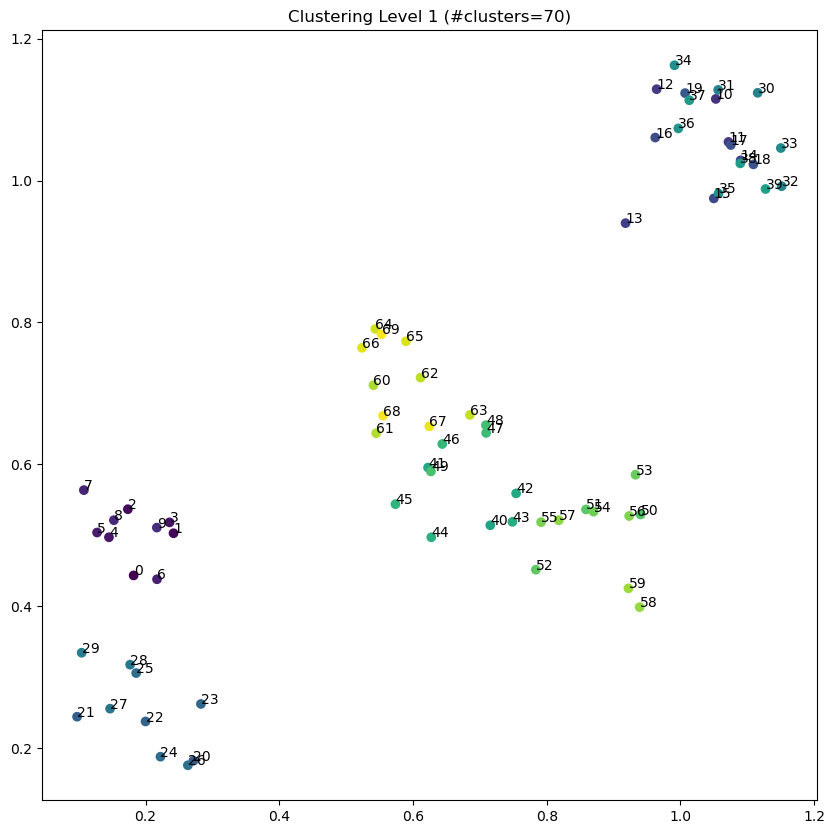

14.0 and 38.0 merged at distance 0.004286921552180861


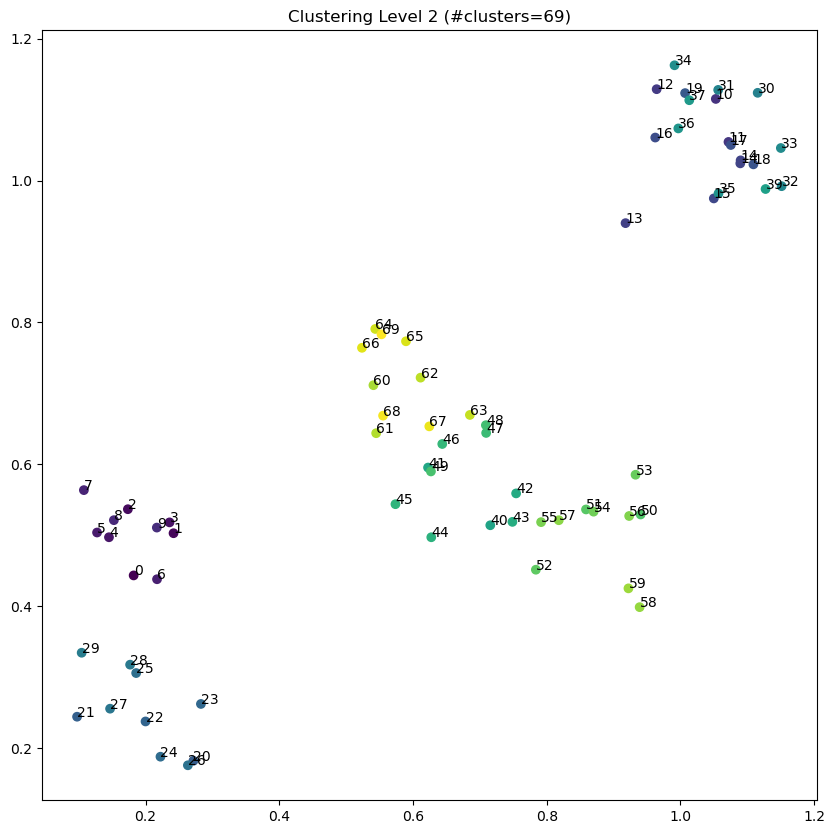

11.0 and 17.0 merged at distance 0.005572714603954559


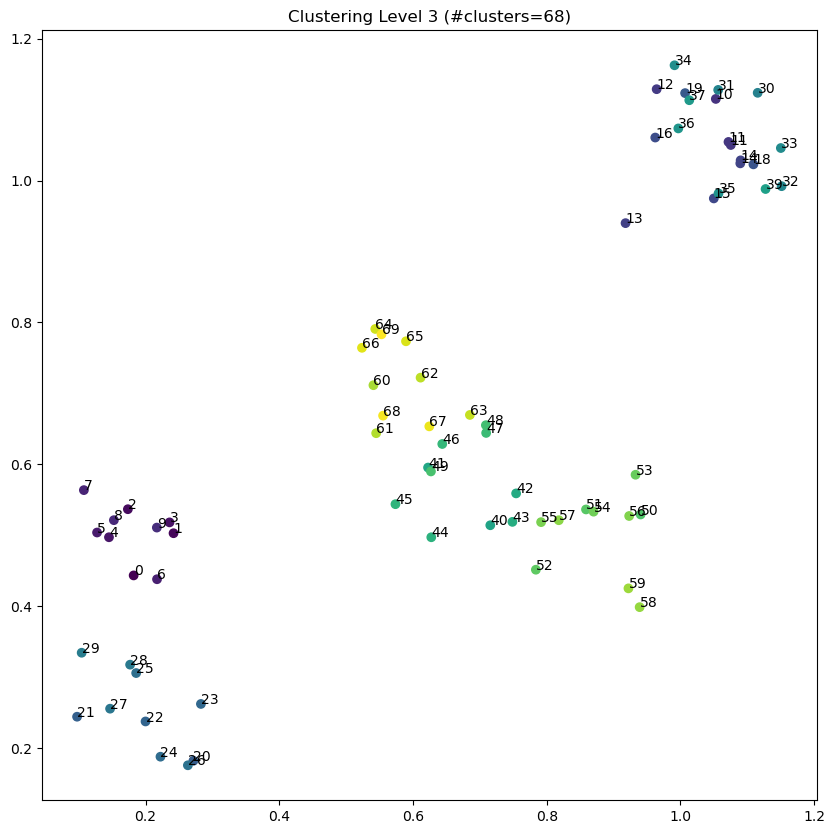

41.0 and 49.0 merged at distance 0.0069642097521790845


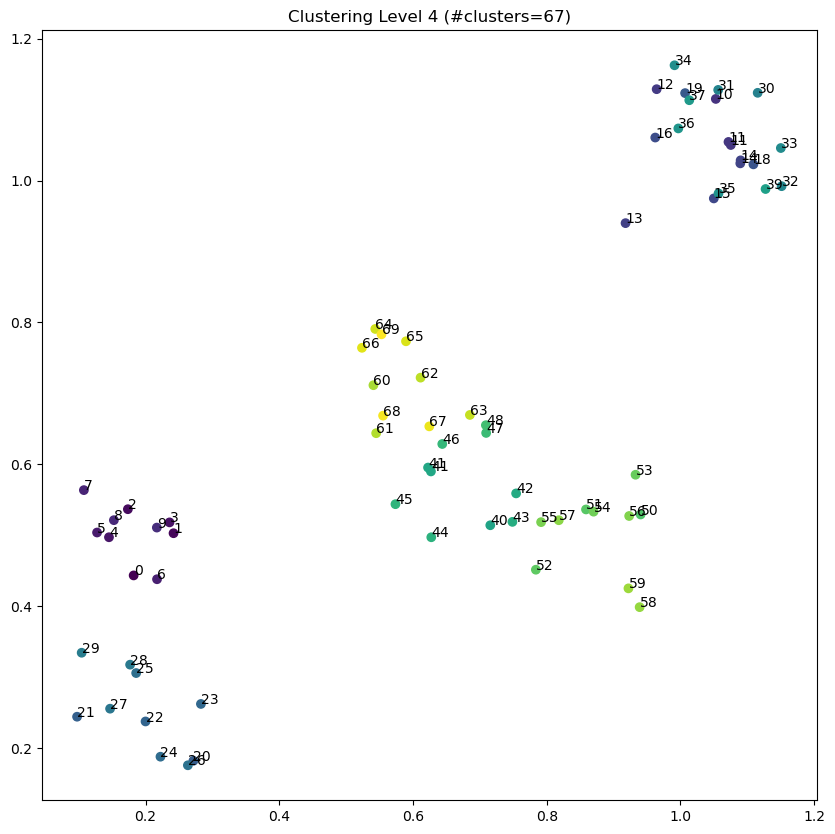

15.0 and 35.0 merged at distance 0.009937188605087249


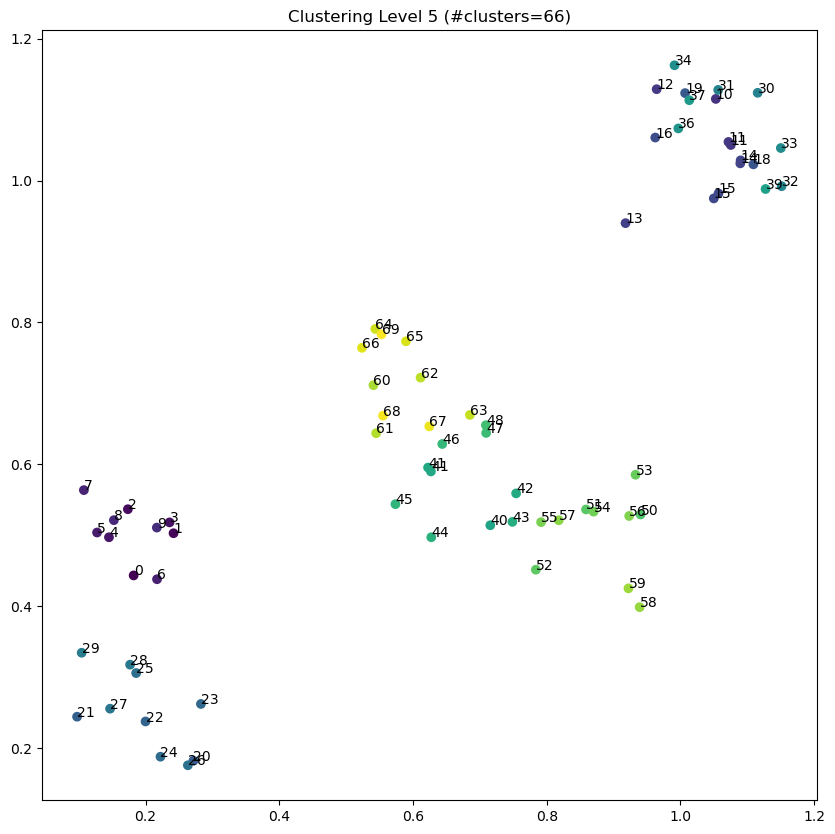

20.0 and 26.0 merged at distance 0.010445026704371562


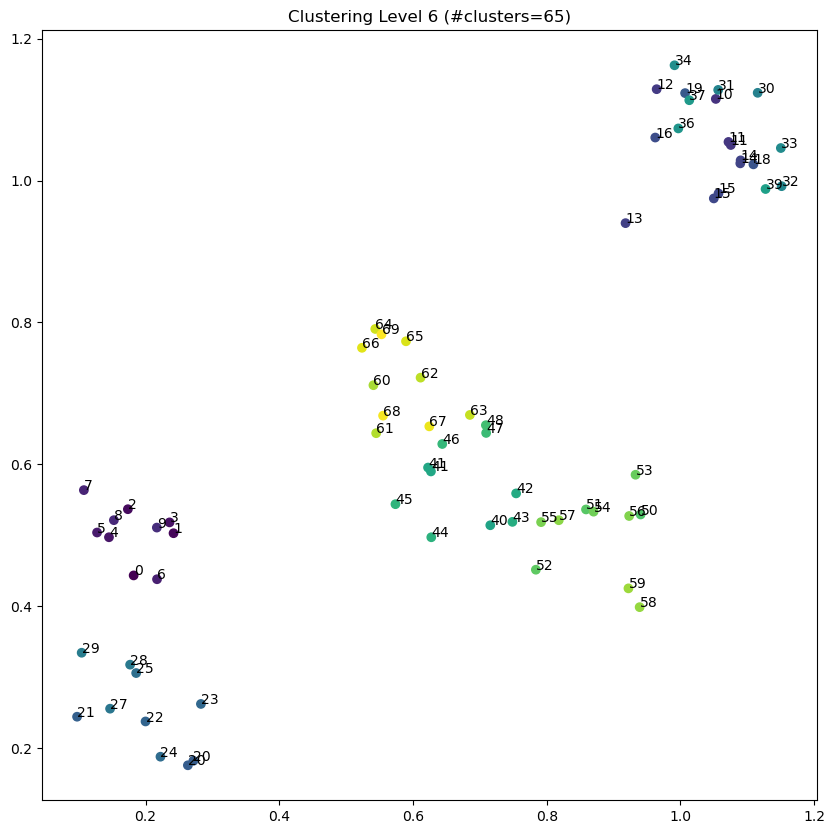

47.0 and 48.0 merged at distance 0.010904194884022366


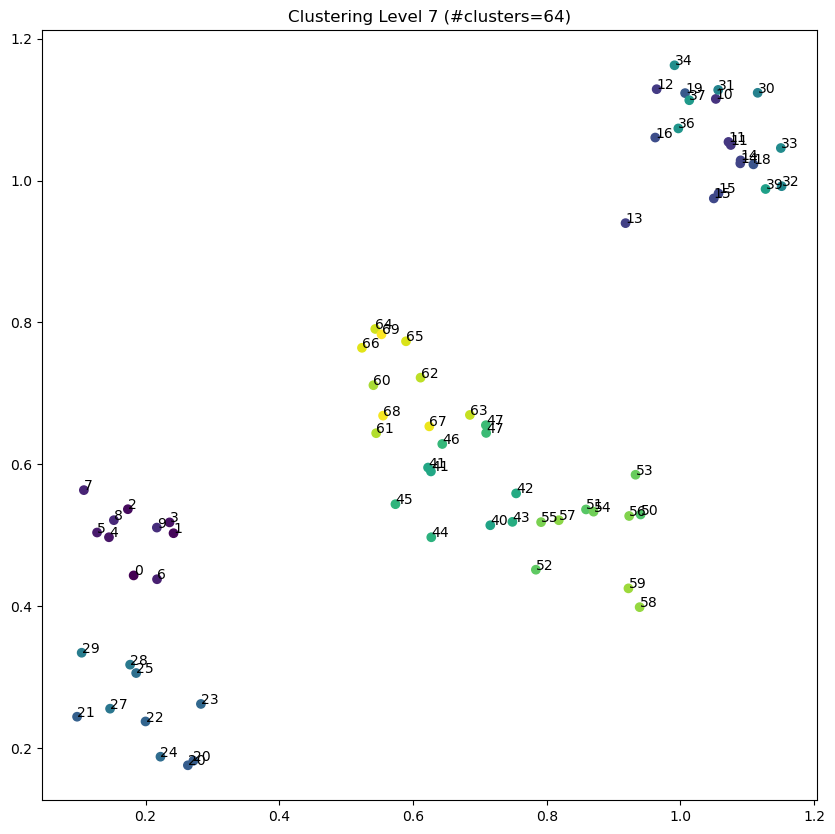

51.0 and 54.0 merged at distance 0.01175268130615428


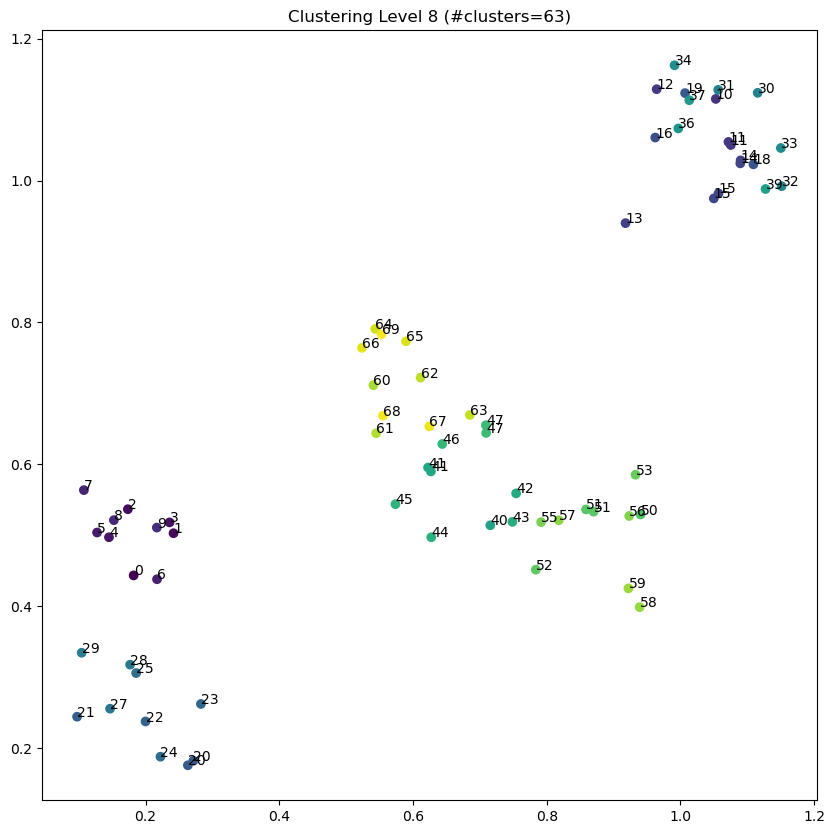

19.0 and 37.0 merged at distance 0.011826605314008327


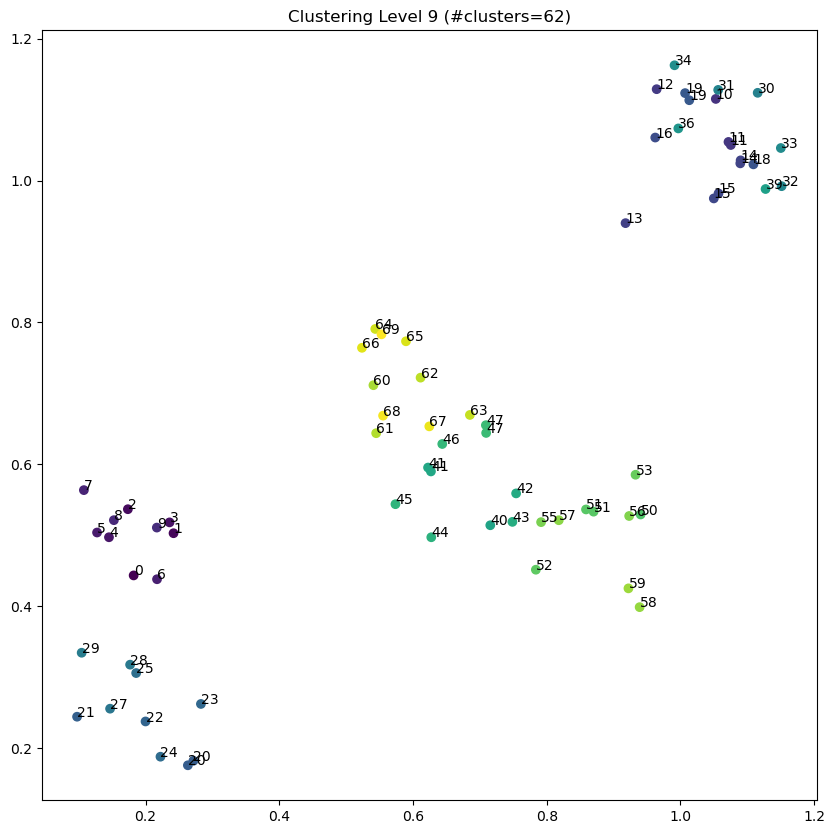

64.0 and 69.0 merged at distance 0.012046153905048682


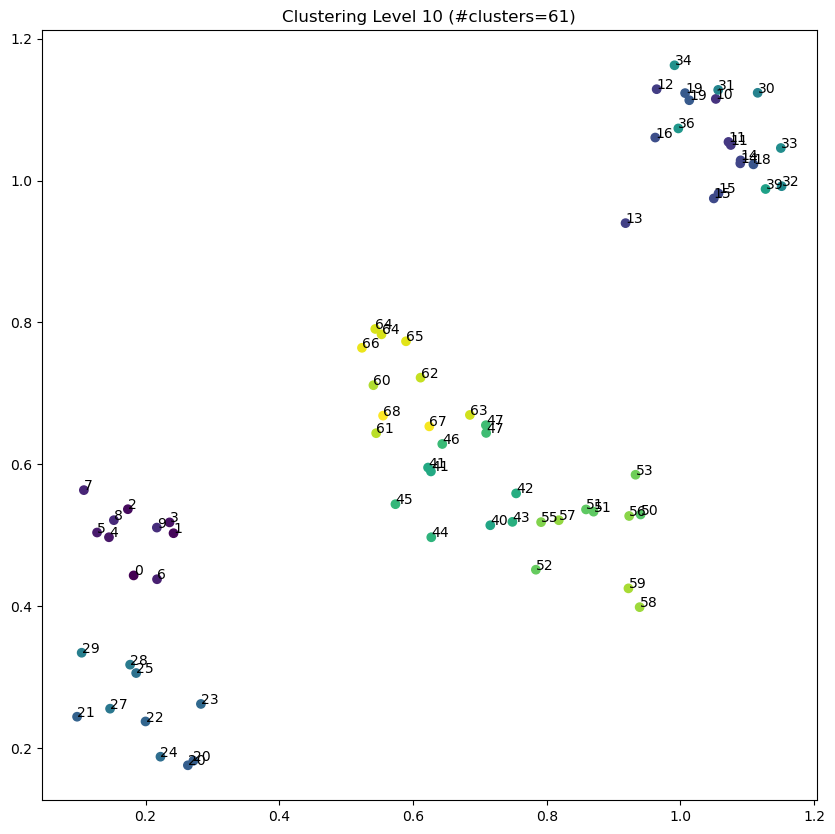

10.0 and 31.0 merged at distance 0.013224264225377503


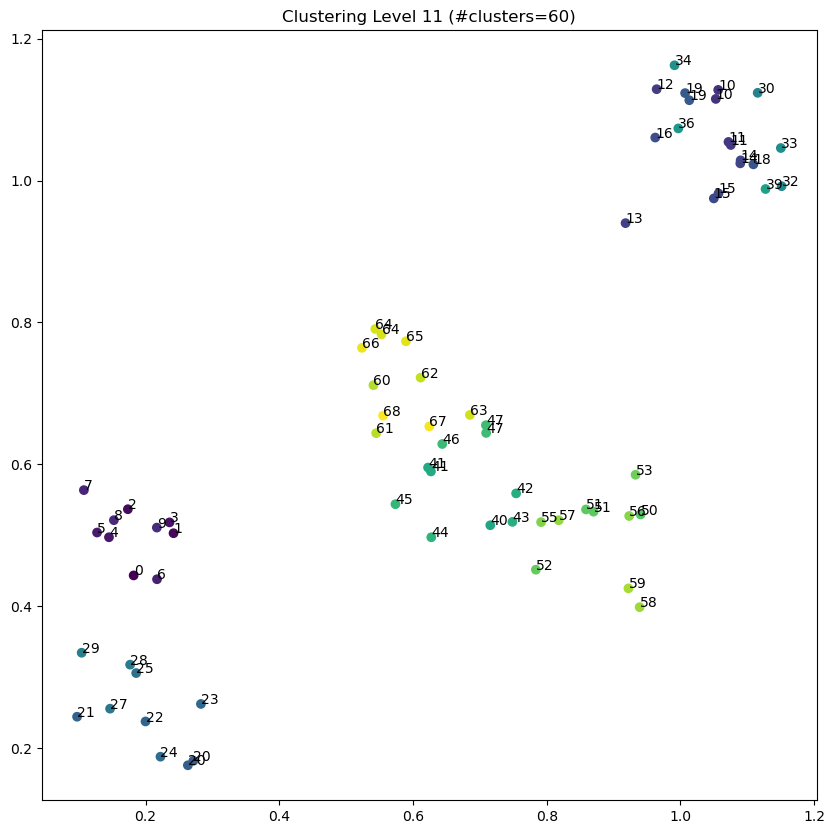

25.0 and 28.0 merged at distance 0.01487651696679805


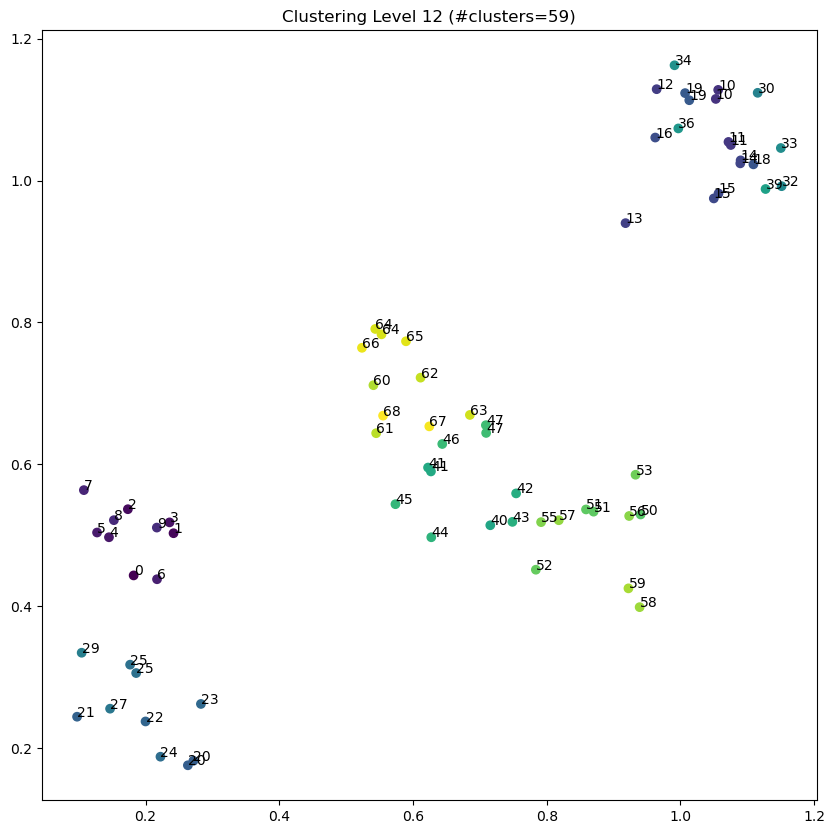

1.0 and 3.0 merged at distance 0.0163925866105426


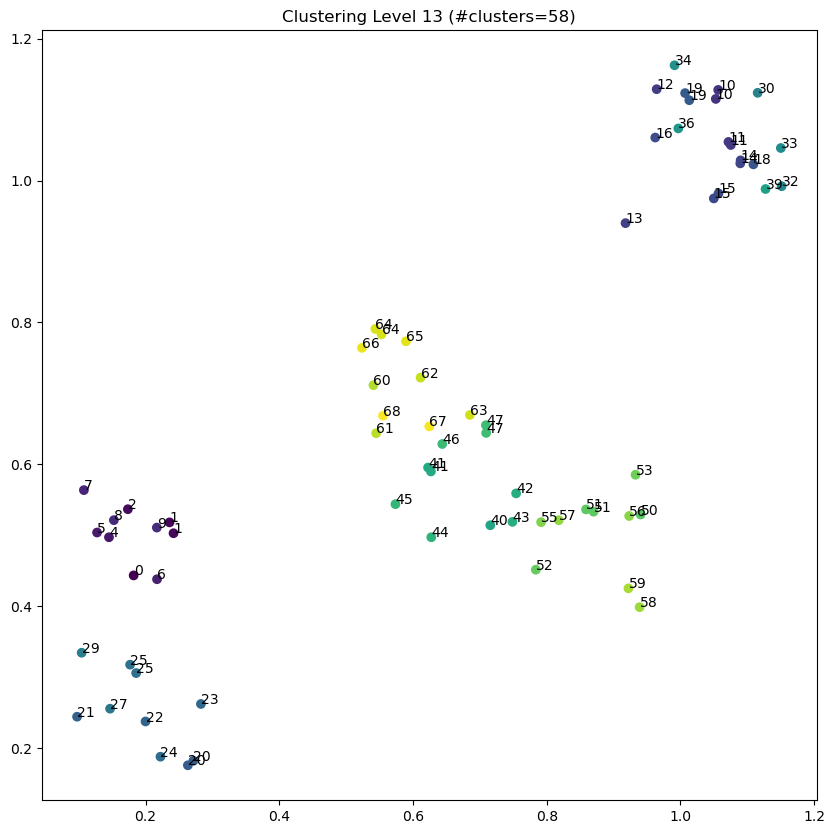

50.0 and 56.0 merged at distance 0.01728462259028197


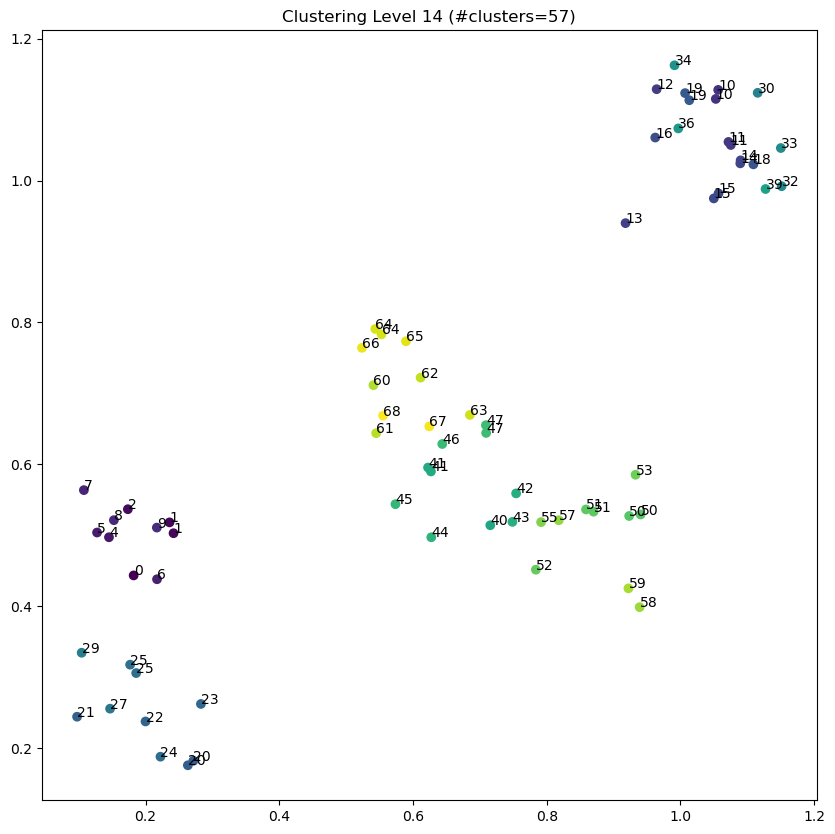

4.0 and 5.0 merged at distance 0.01903730674105812


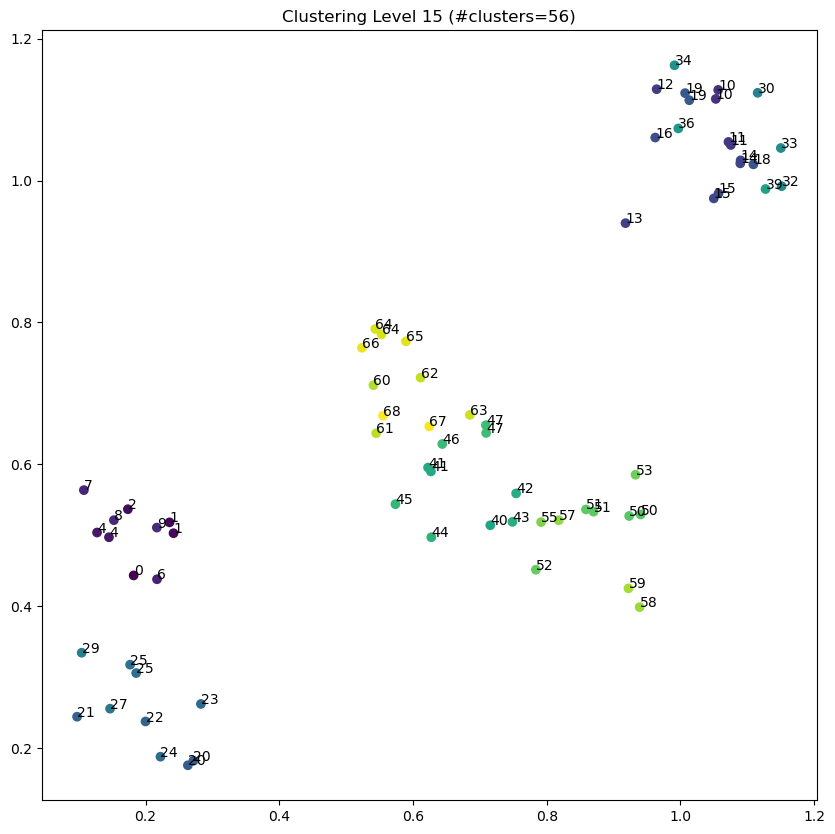

14.0 and 18.0 merged at distance 0.01967134854927133


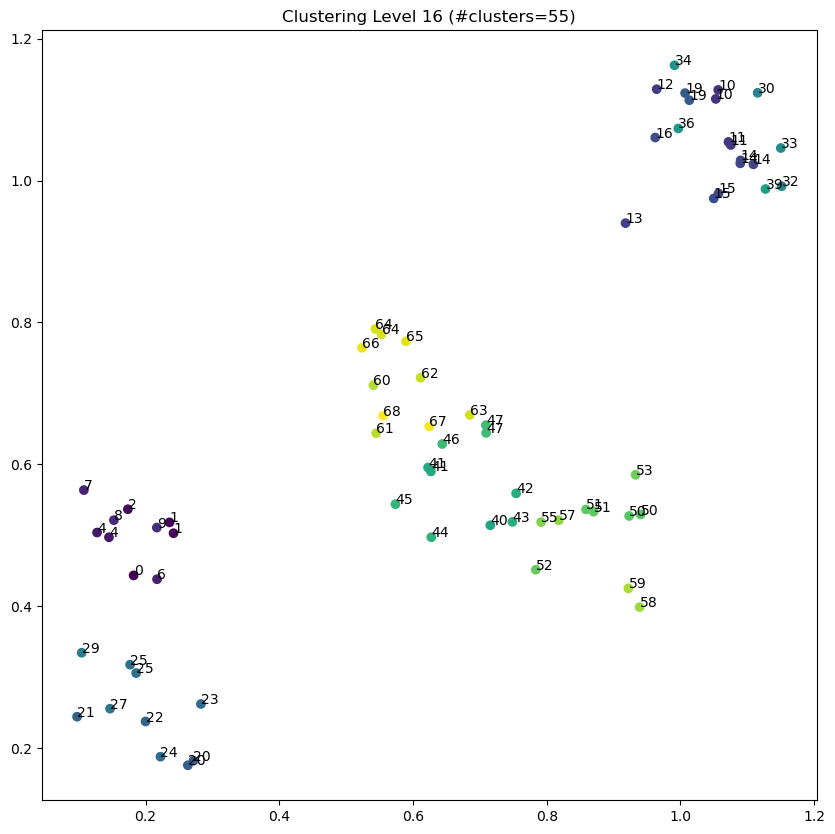

1.0 and 9.0 merged at distance 0.020366257992383514


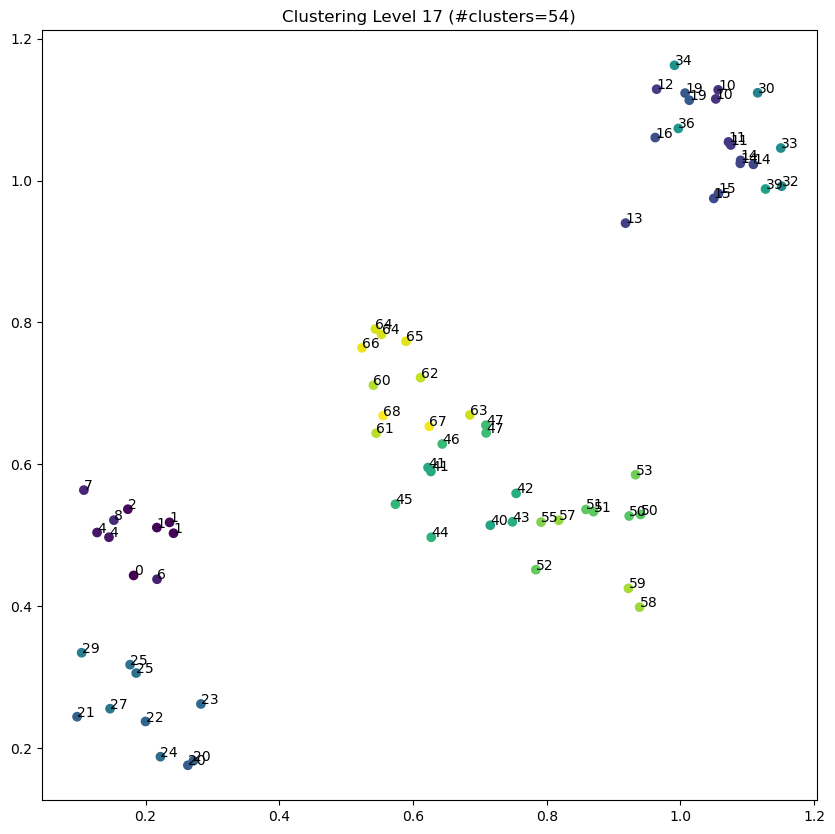

32.0 and 39.0 merged at distance 0.024358054485358004


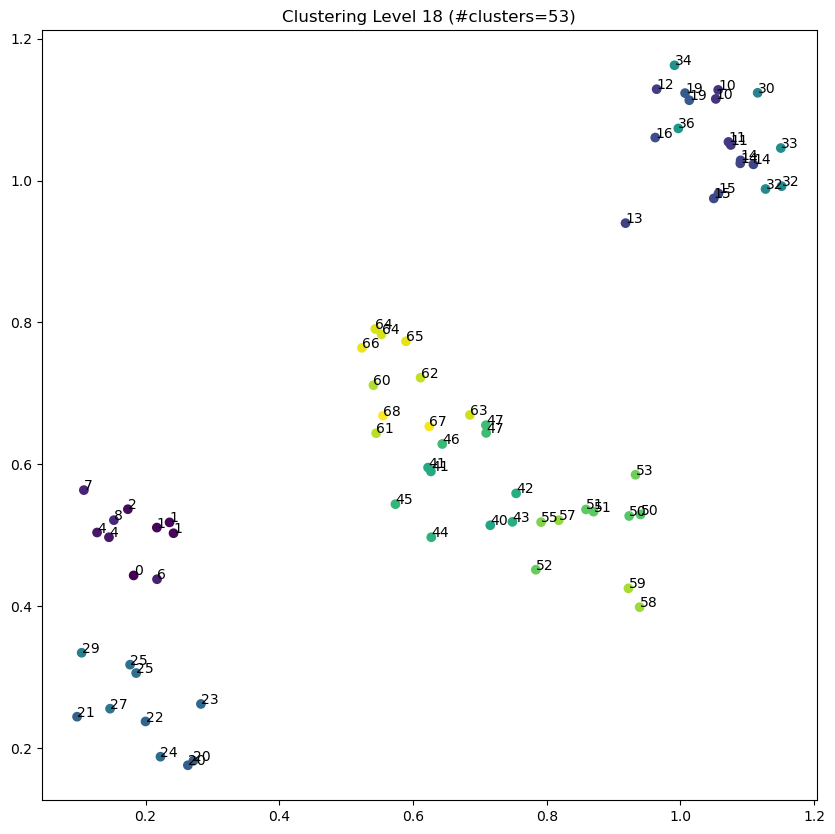

4.0 and 8.0 merged at distance 0.02517442746224226


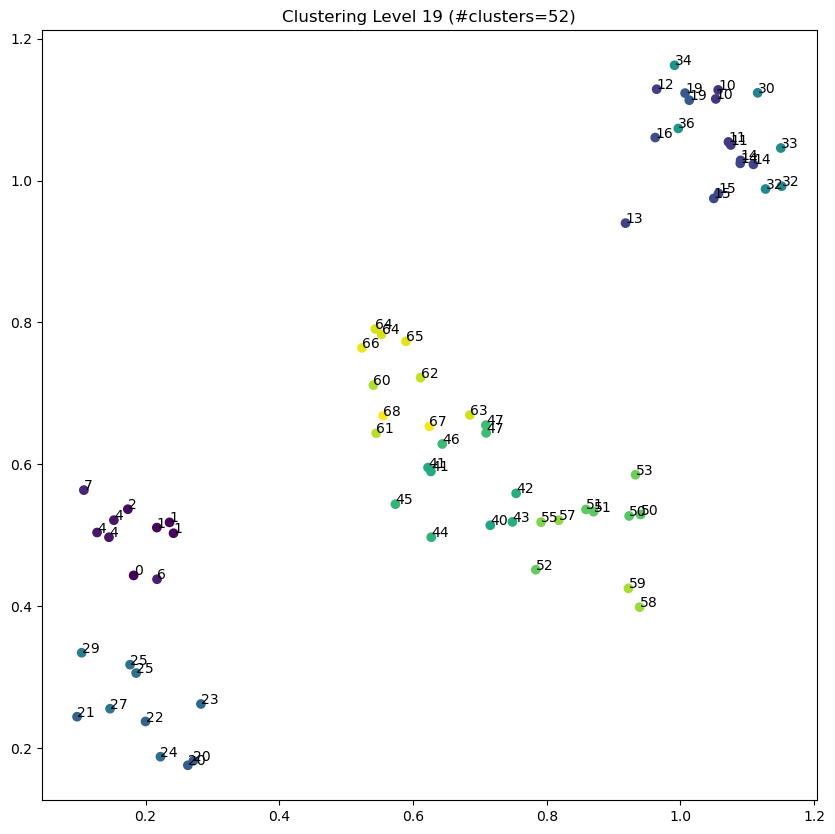

2.0 and 4.0 merged at distance 0.02600755249814834


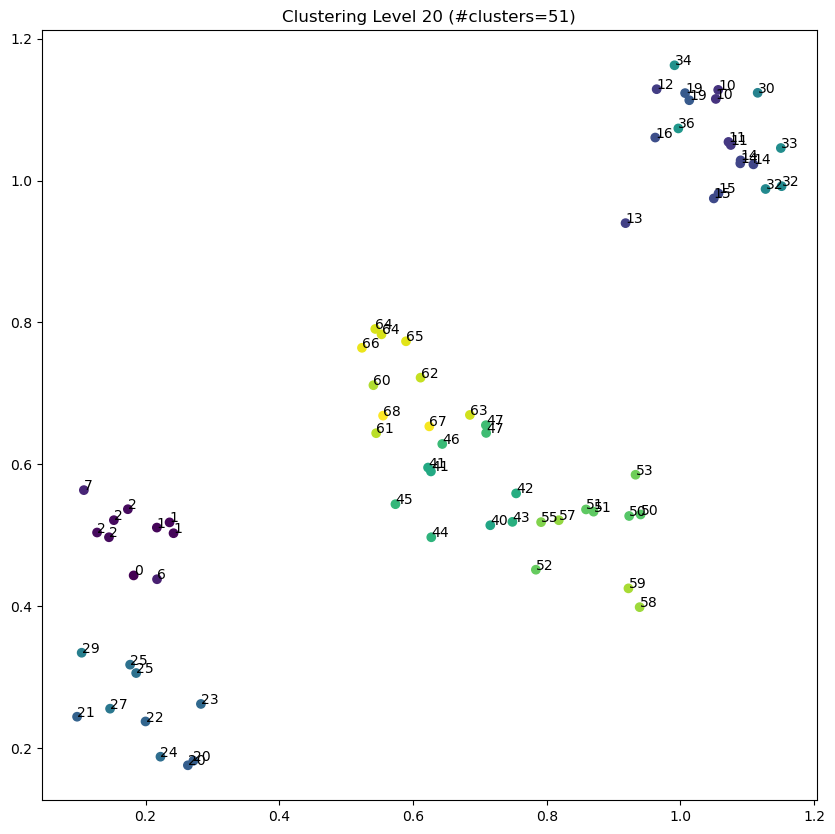

11.0 and 14.0 merged at distance 0.026115774151084167


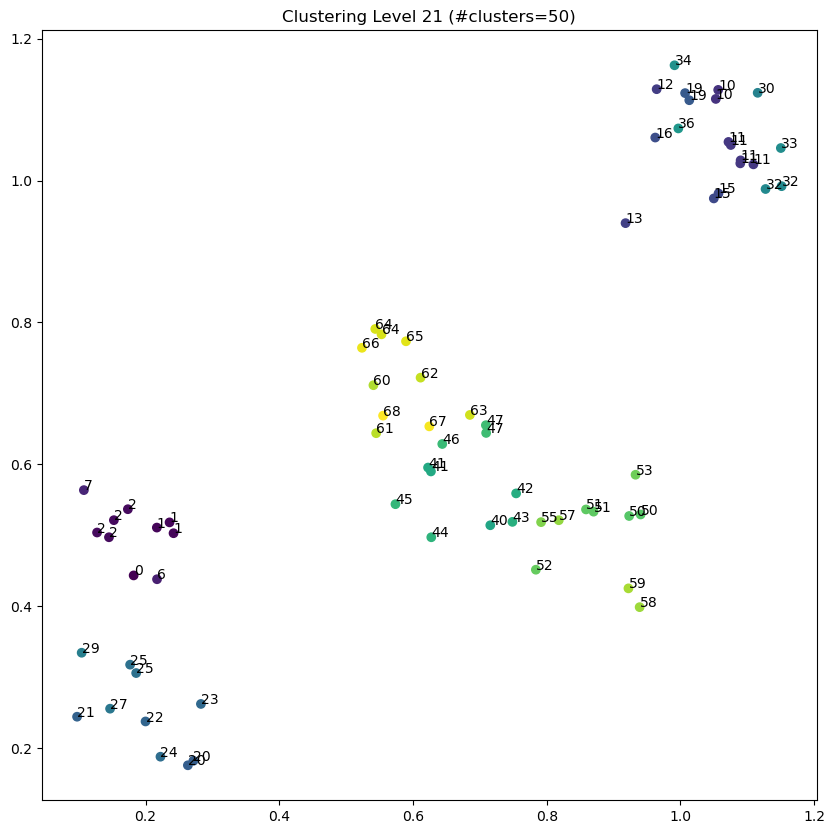

55.0 and 57.0 merged at distance 0.026608583041843943


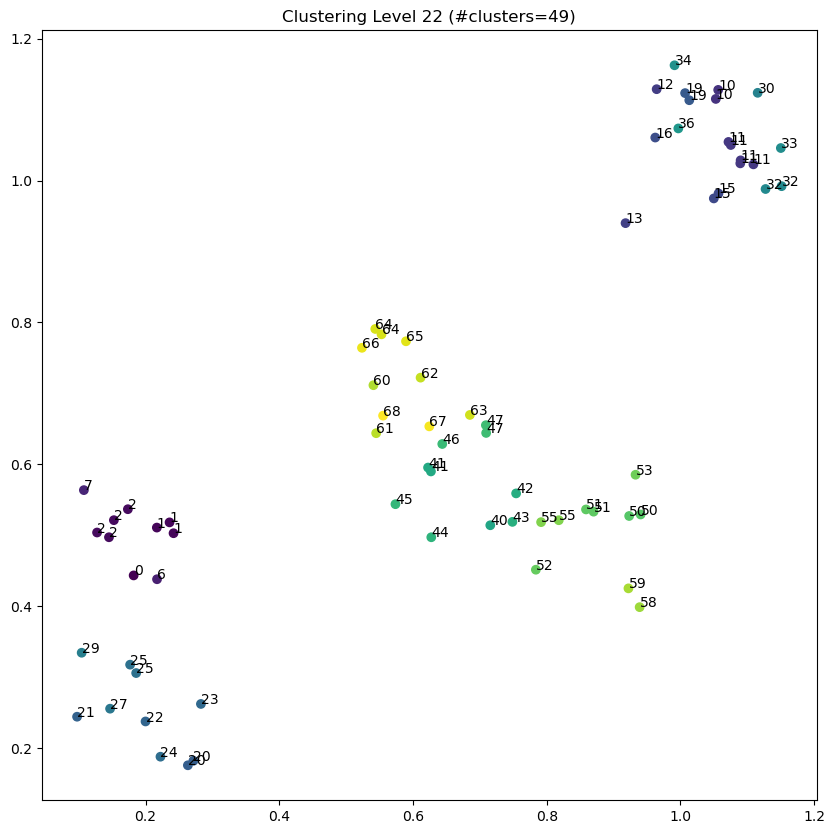

61.0 and 68.0 merged at distance 0.02680331023253282


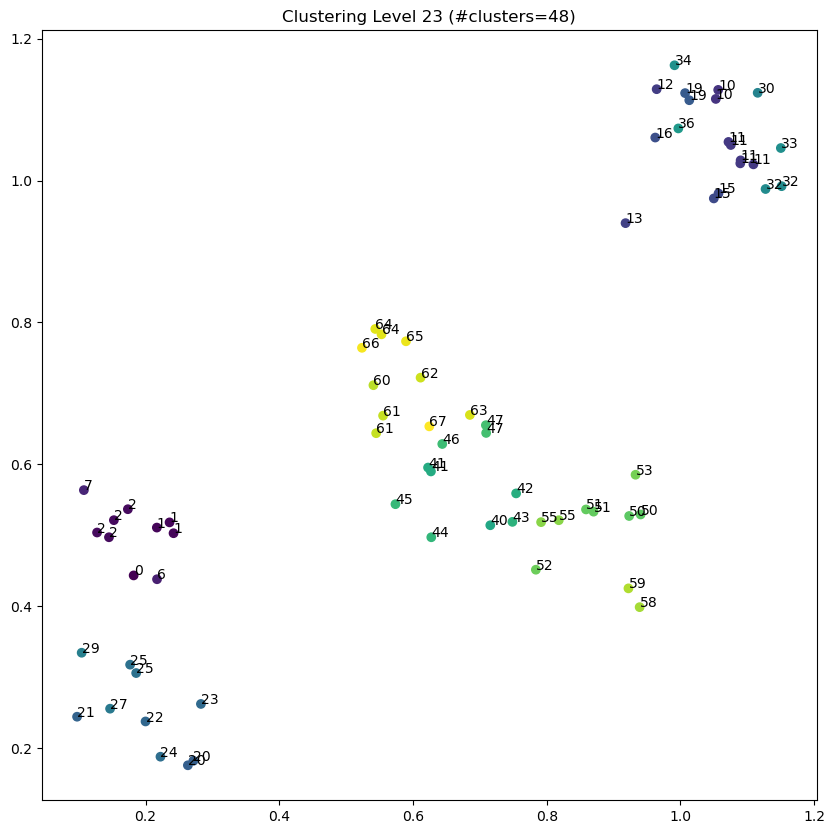

47.0 and 63.0 merged at distance 0.02793795316138615


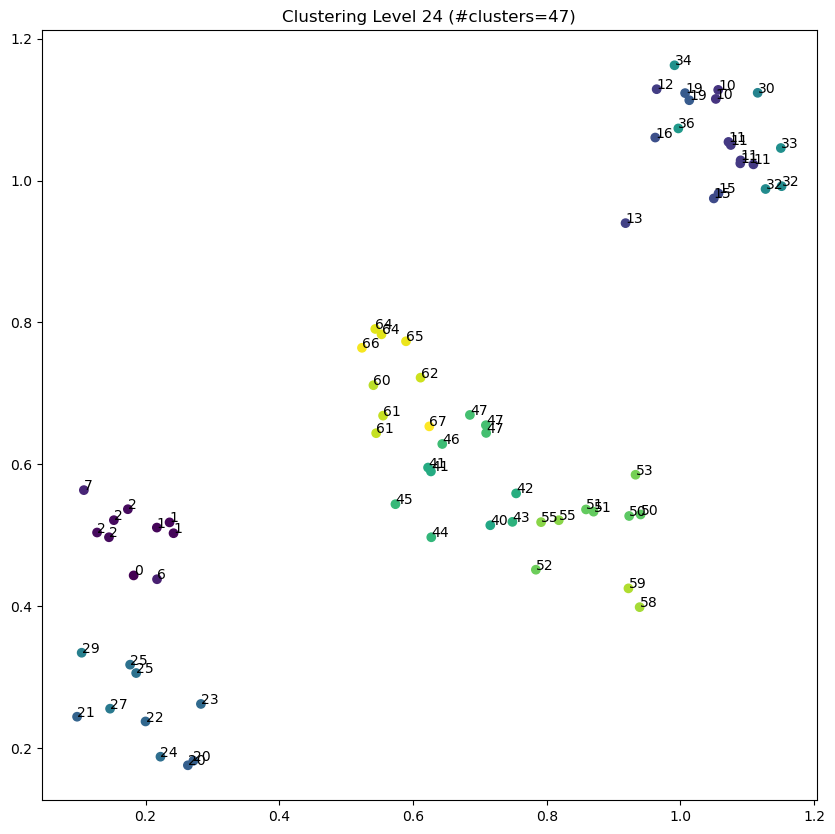

58.0 and 59.0 merged at distance 0.03132788007380651


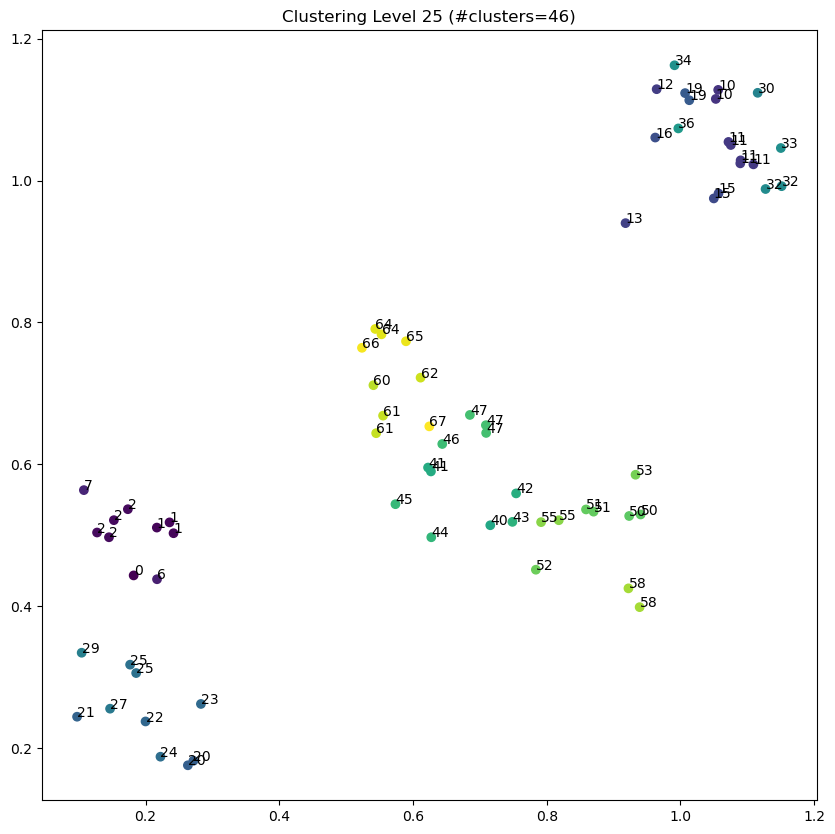

46.0 and 67.0 merged at distance 0.03150831002578277


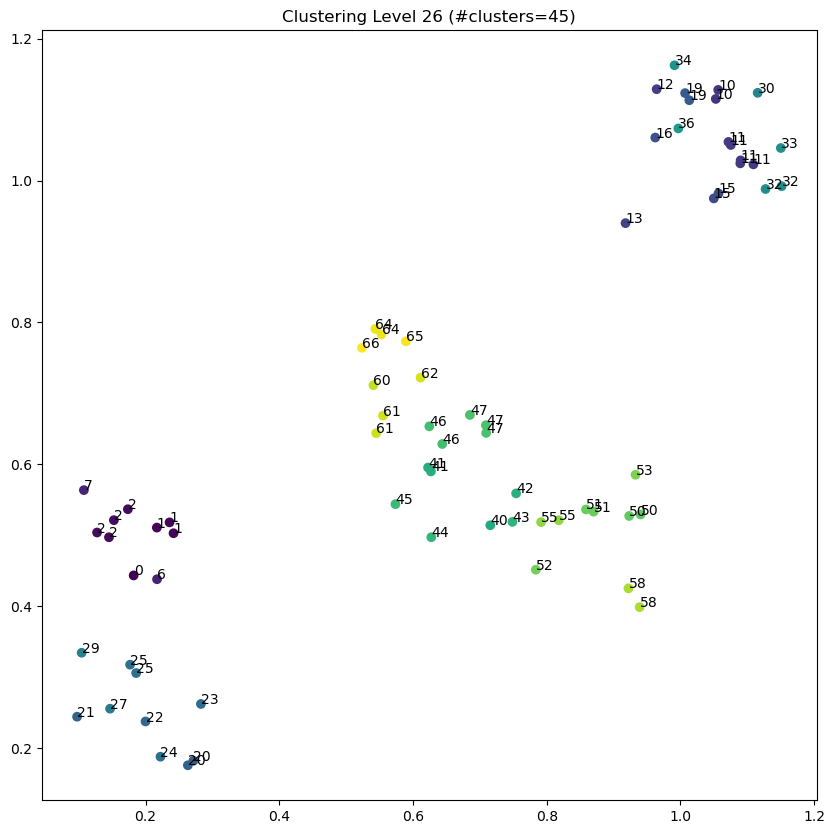

64.0 and 66.0 merged at distance 0.03322066616471404


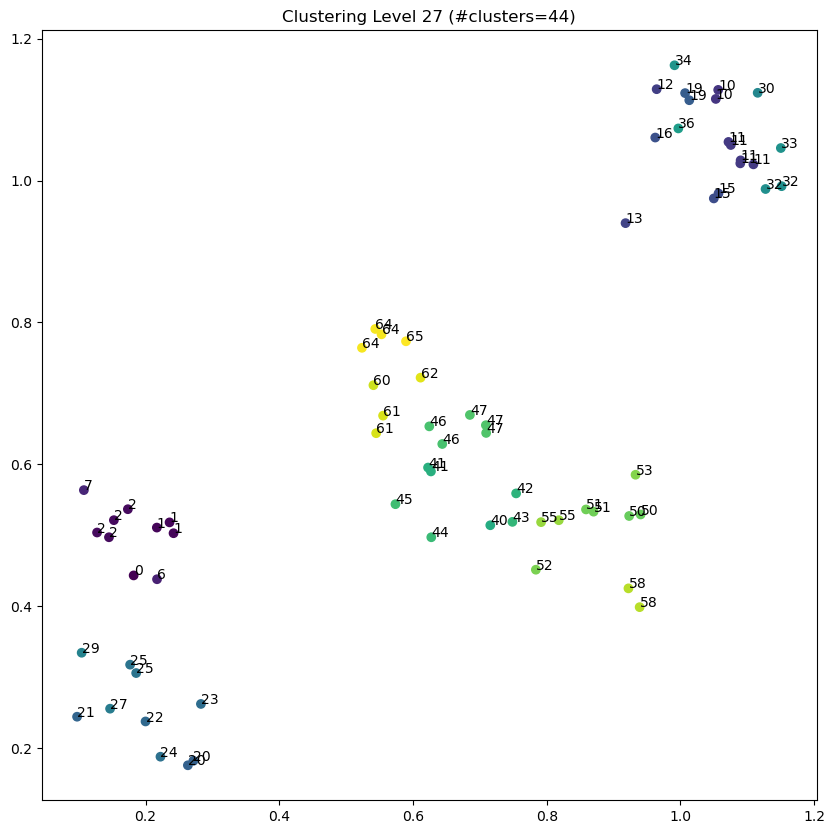

40.0 and 43.0 merged at distance 0.03342380322576321


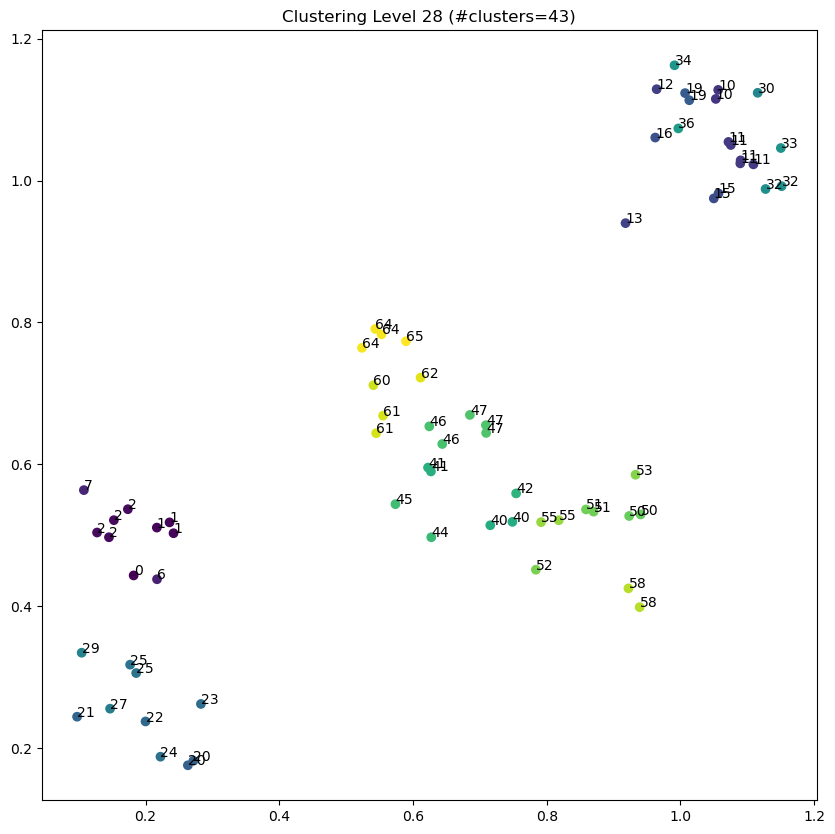

0.0 and 6.0 merged at distance 0.035386322866806916


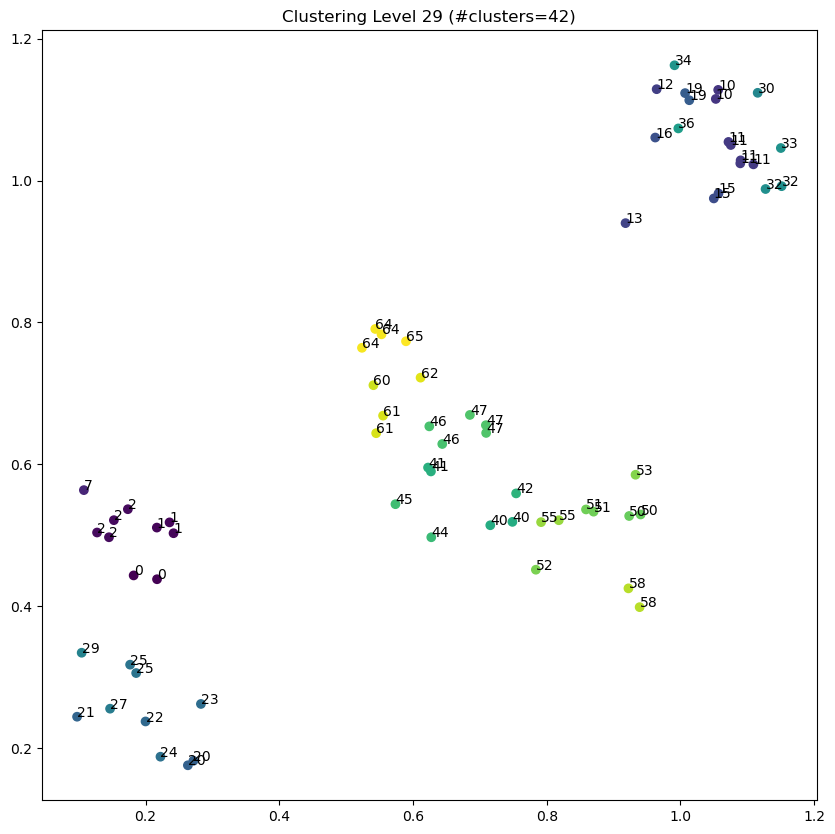

16.0 and 36.0 merged at distance 0.03682503678187284


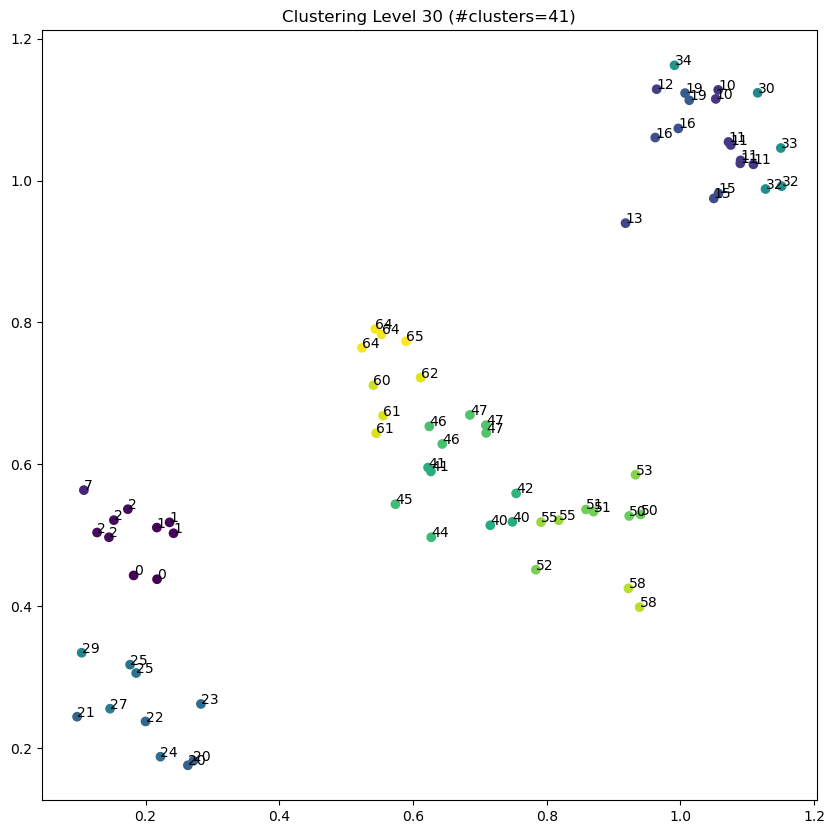

64.0 and 65.0 merged at distance 0.03786261017796467


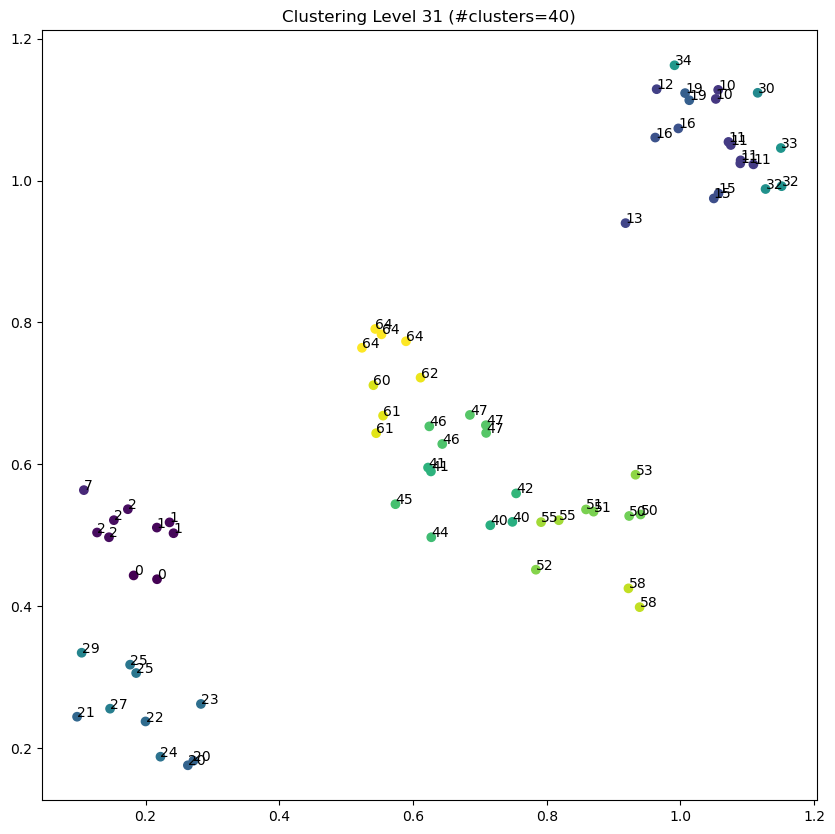

11.0 and 32.0 merged at distance 0.03920704440515361


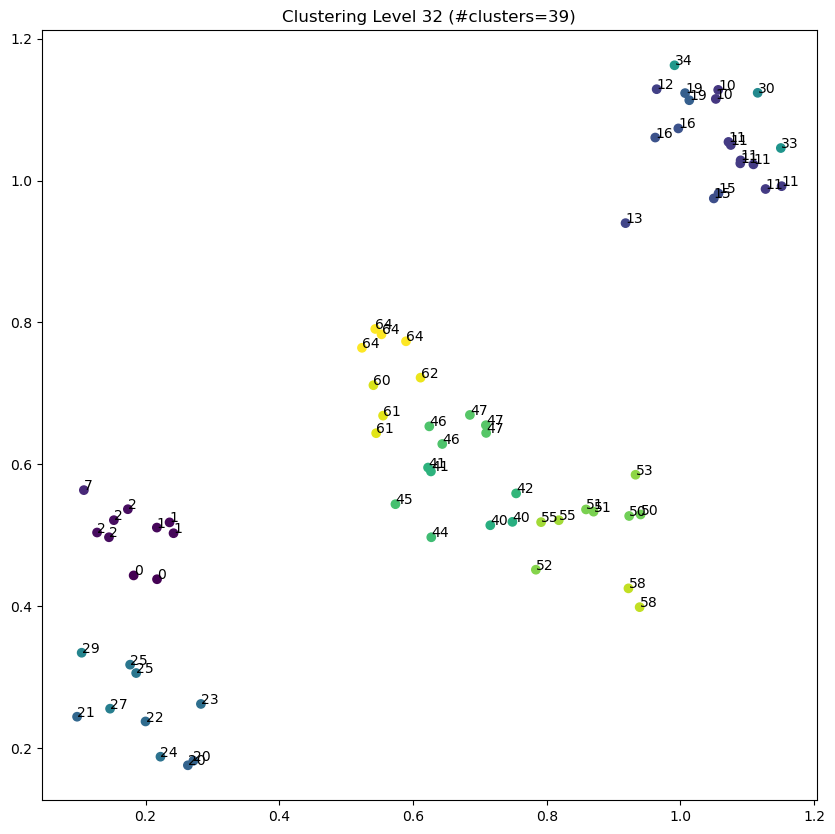

41.0 and 46.0 merged at distance 0.039423197130717215


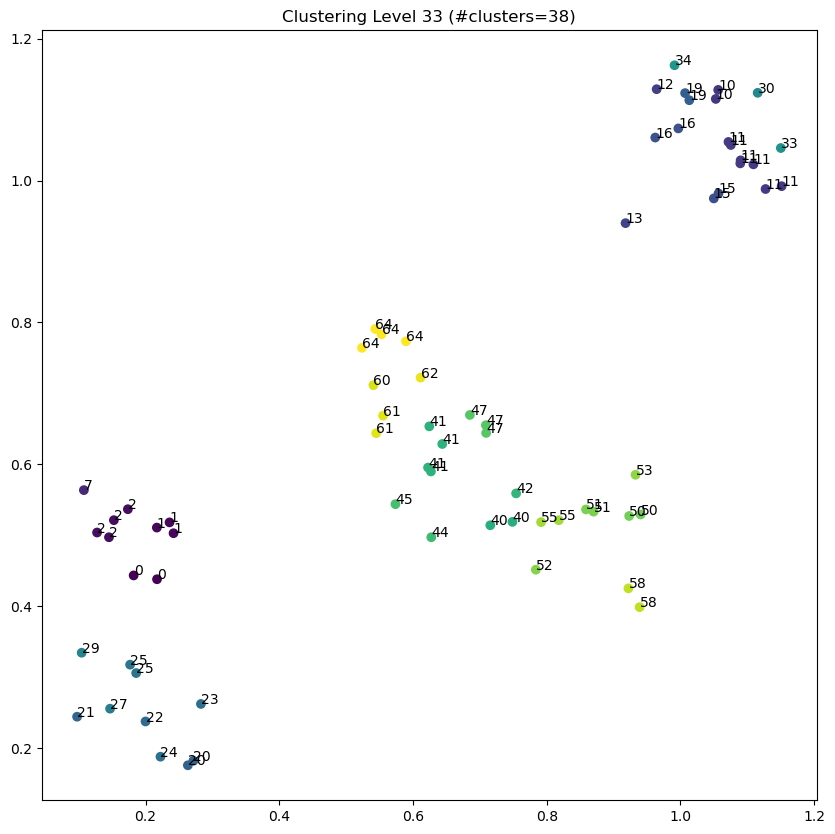

10.0 and 19.0 merged at distance 0.03971756028172658


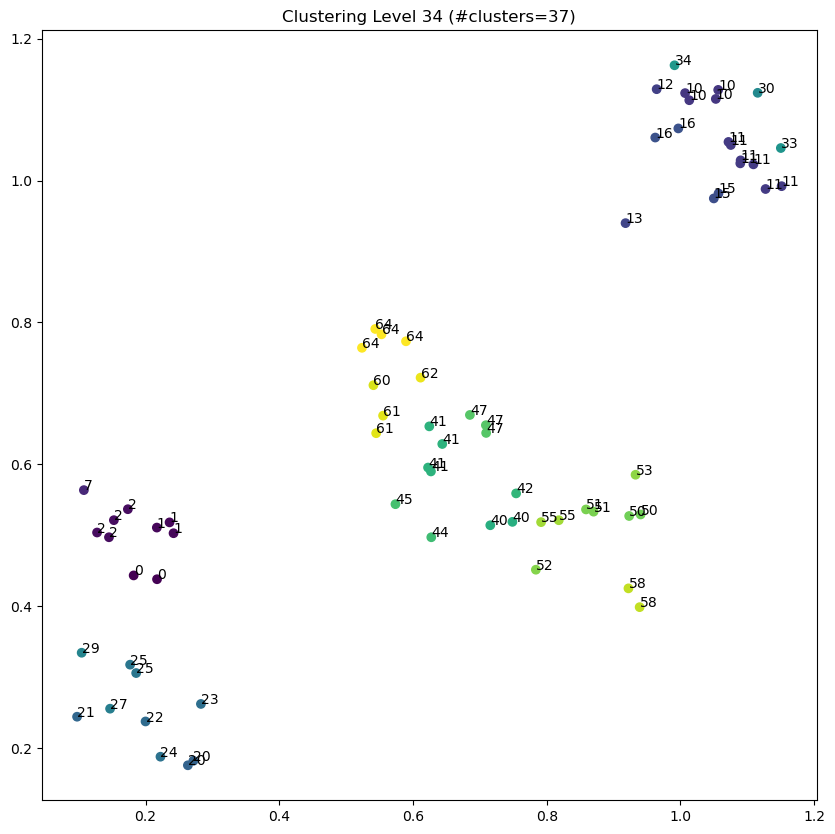

40.0 and 42.0 merged at distance 0.04051519028630883


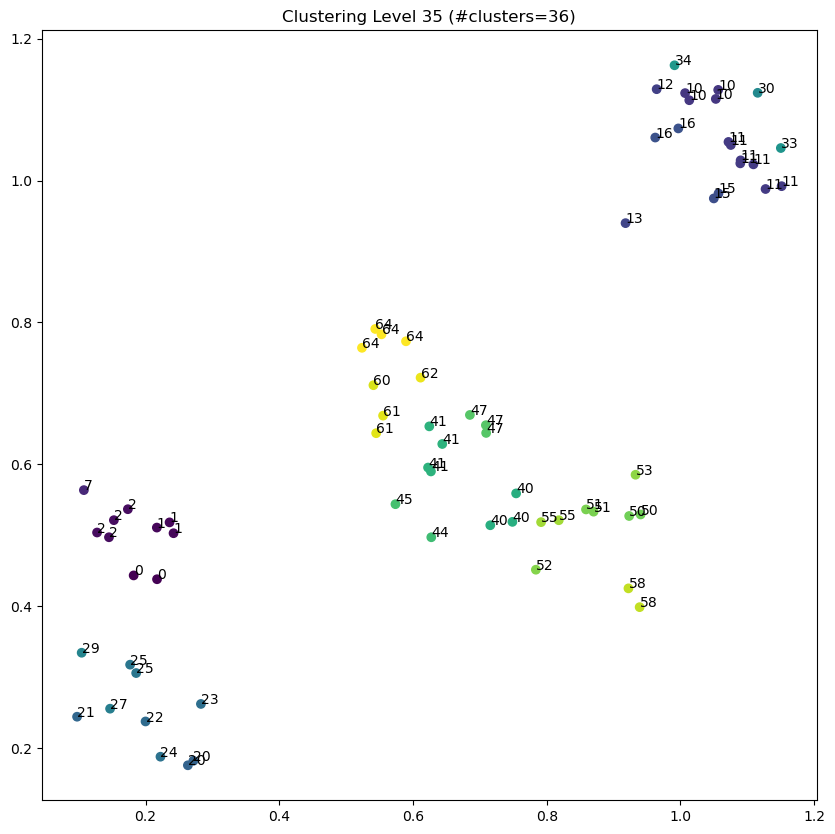

10.0 and 34.0 merged at distance 0.042279012246786755


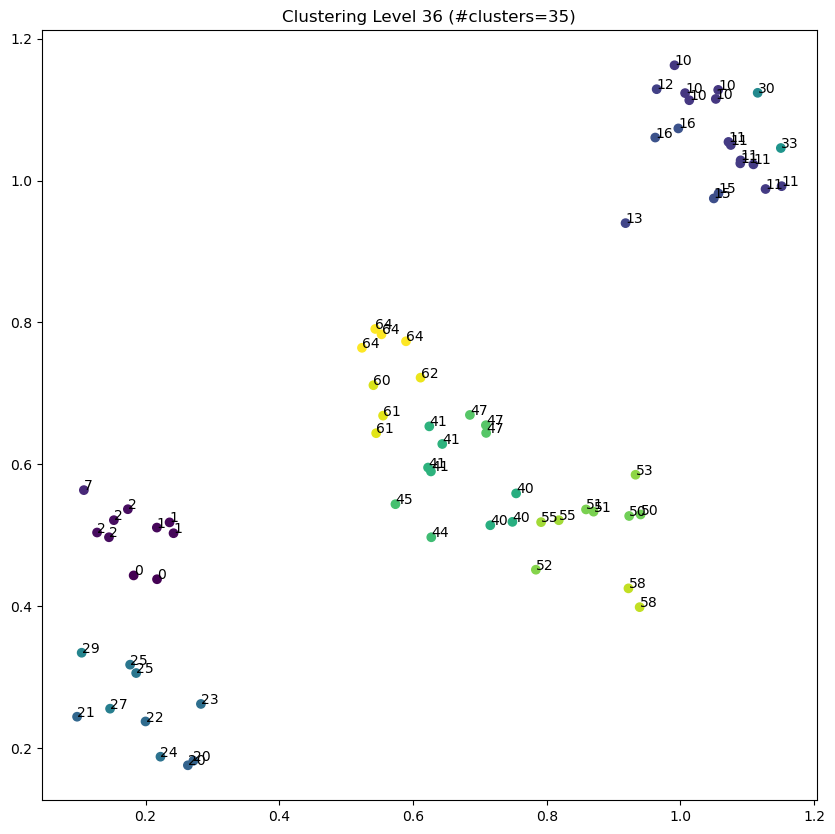

20.0 and 24.0 merged at distance 0.04276044181437816


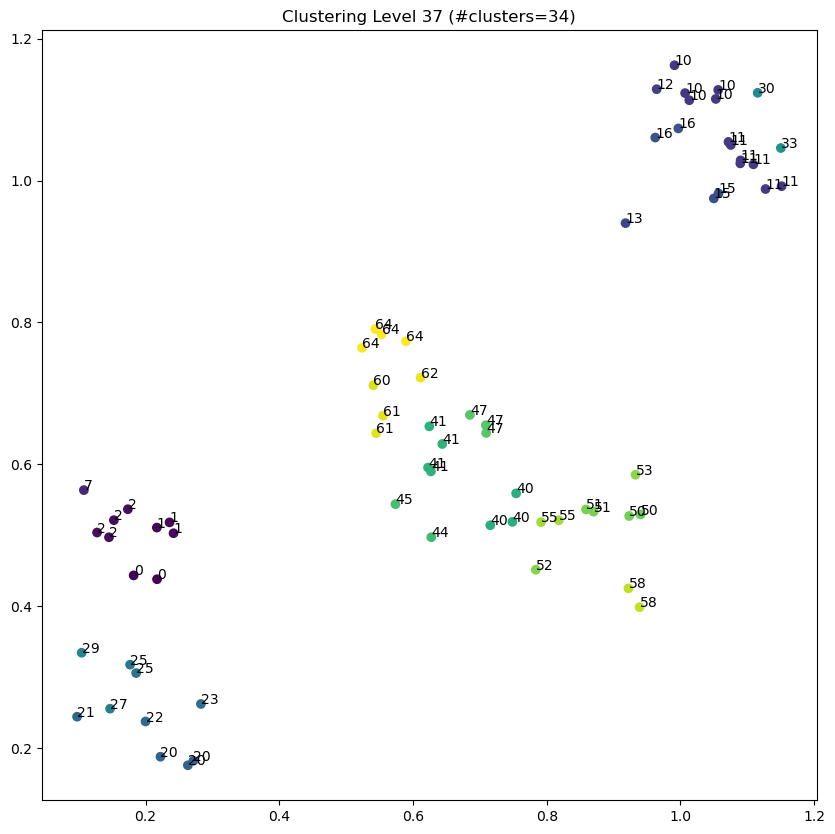

10.0 and 12.0 merged at distance 0.042890386219451244


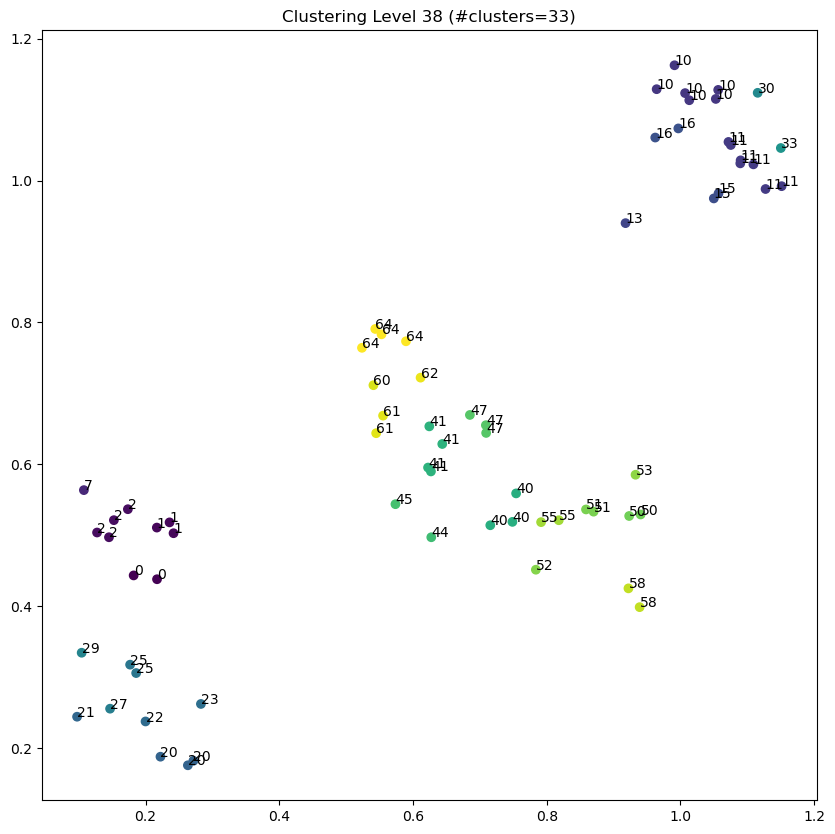

40.0 and 55.0 merged at distance 0.04290111210037328


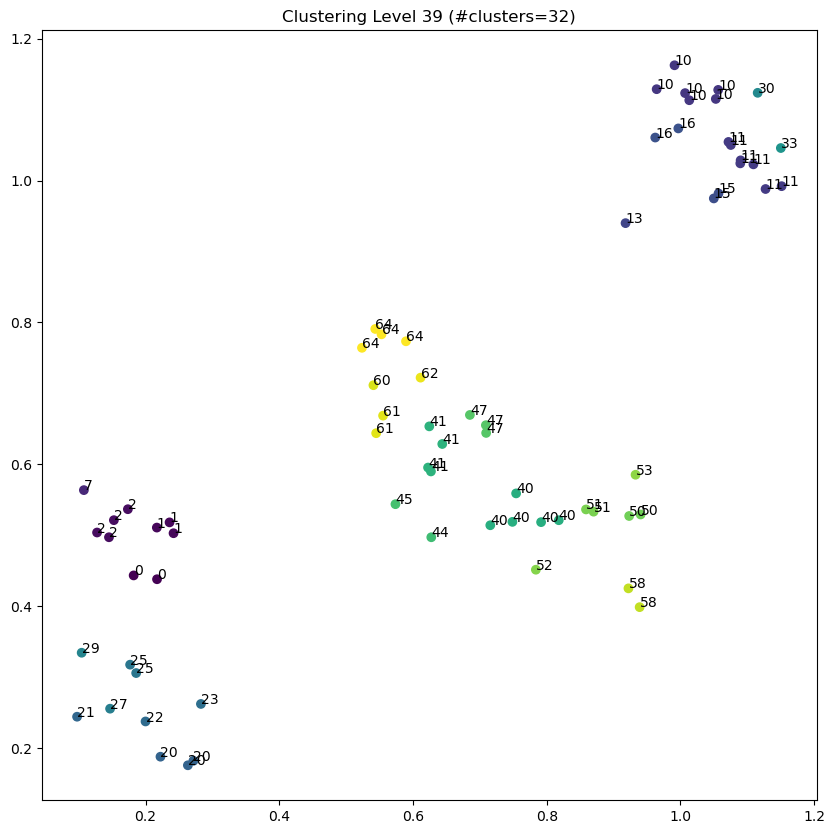

10.0 and 16.0 merged at distance 0.04300372033102222


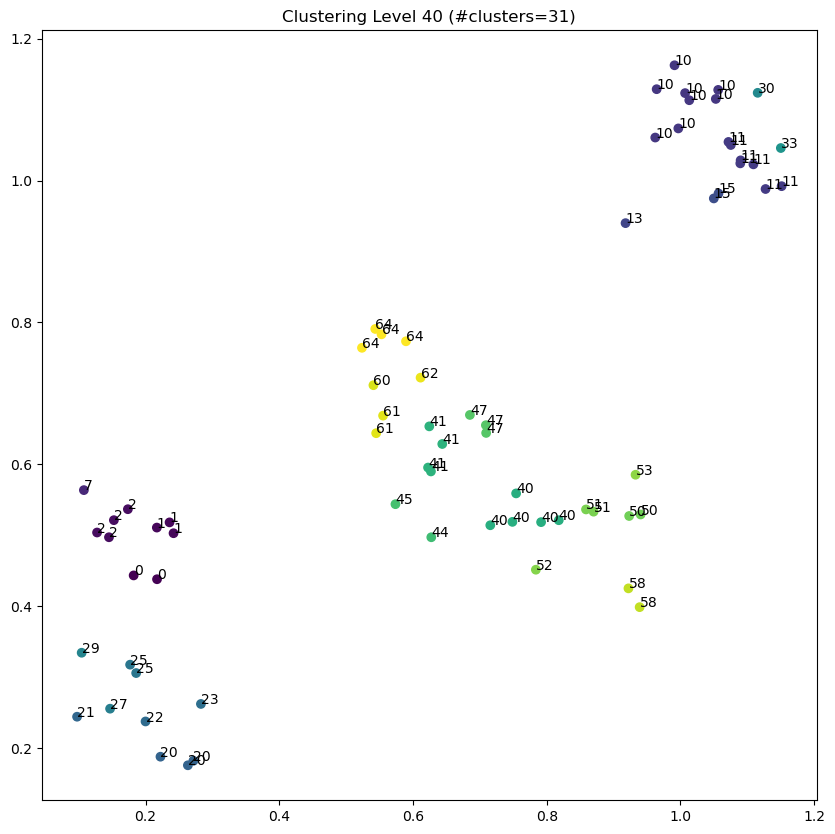

40.0 and 51.0 merged at distance 0.04345843962547263


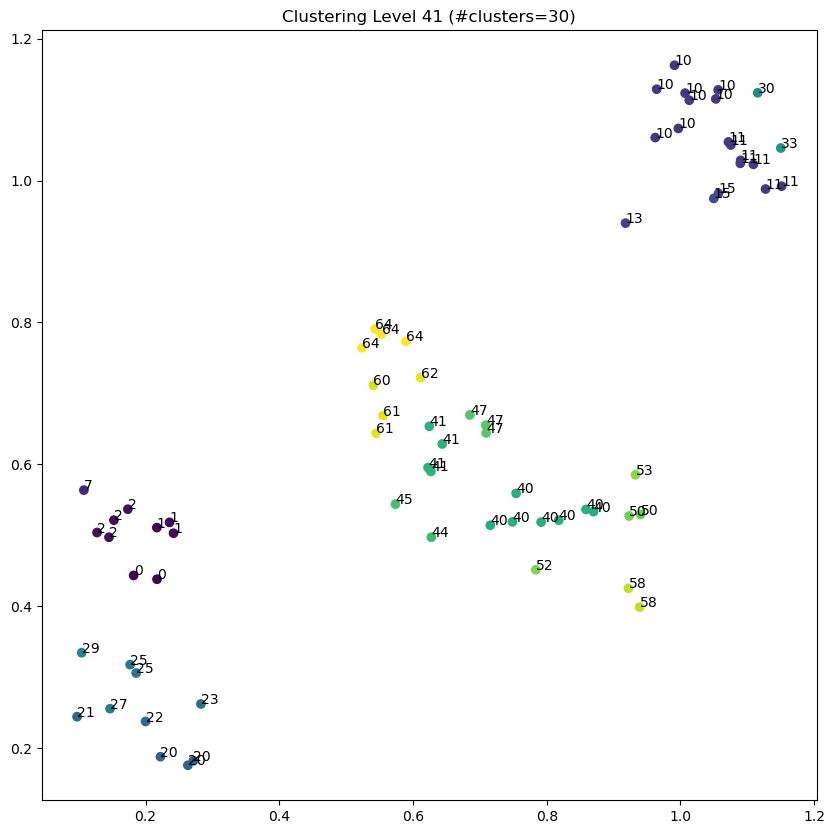

60.0 and 61.0 merged at distance 0.045268754151708154


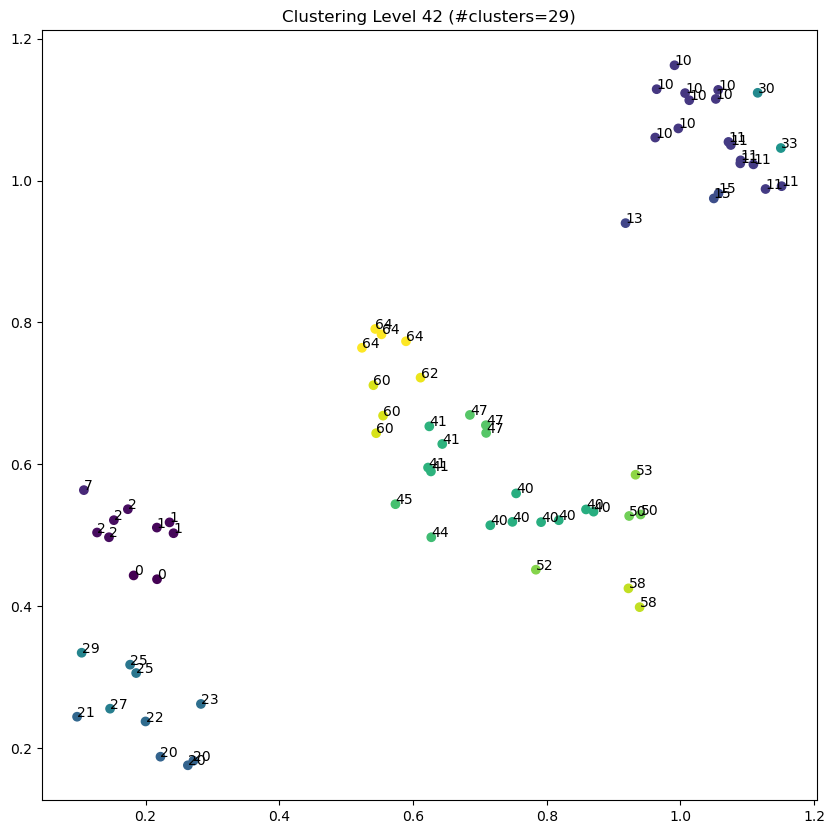

11.0 and 33.0 merged at distance 0.047040133501720656


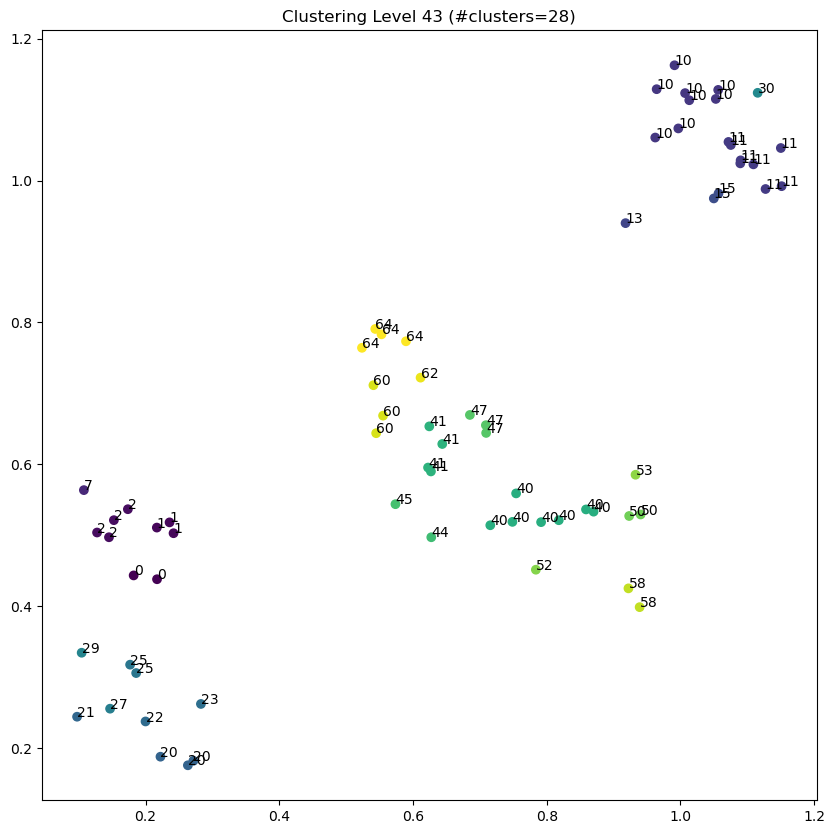

1.0 and 2.0 merged at distance 0.05047687357460317


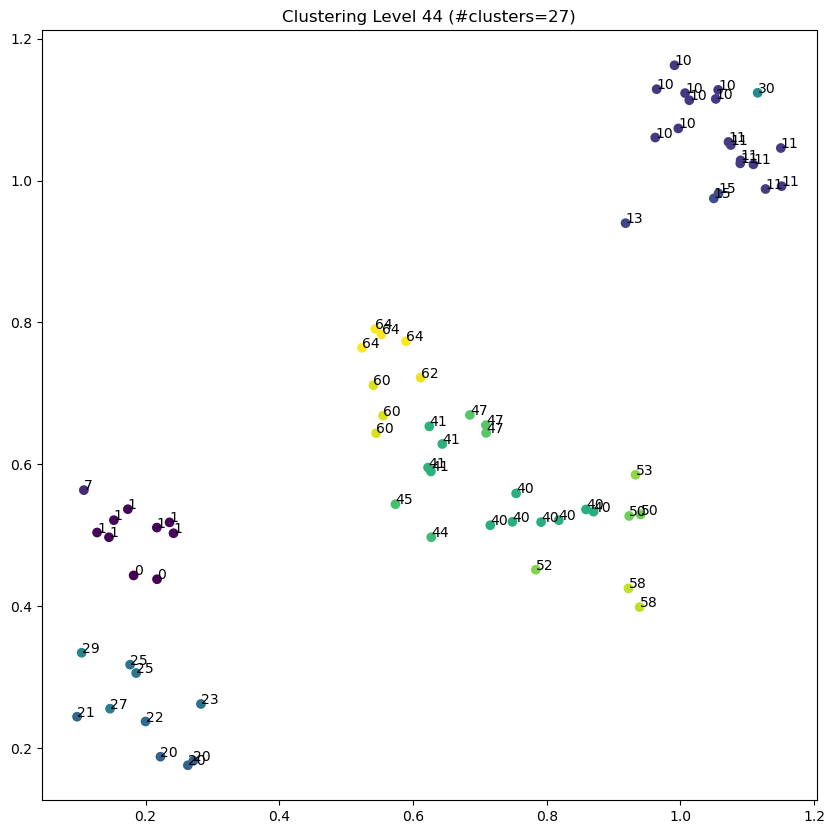

21.0 and 27.0 merged at distance 0.050652001798143116


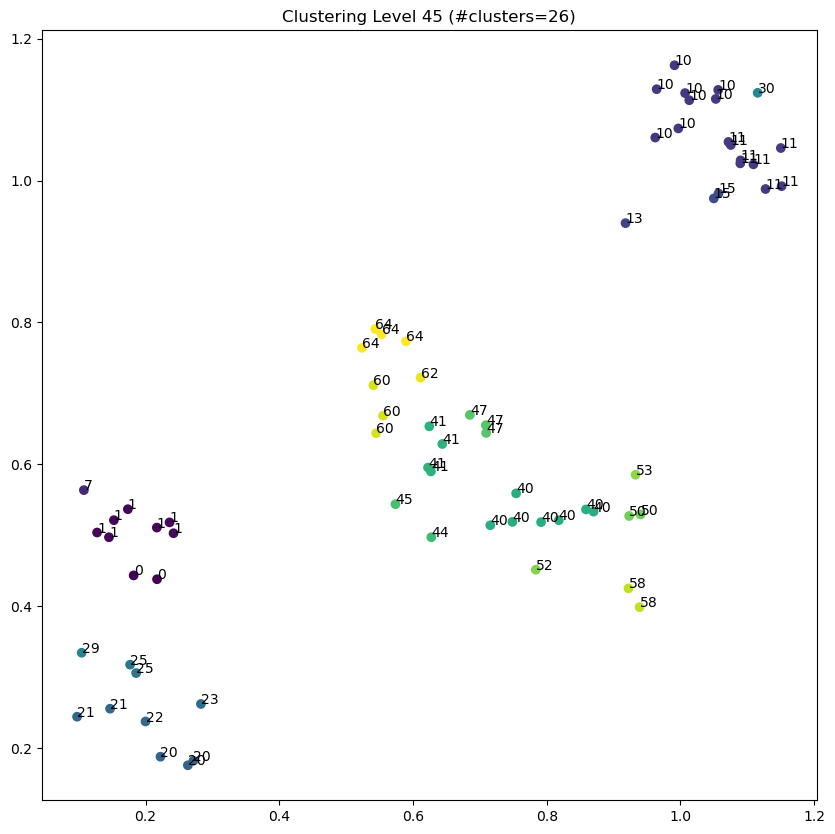

11.0 and 15.0 merged at distance 0.05346114234312892


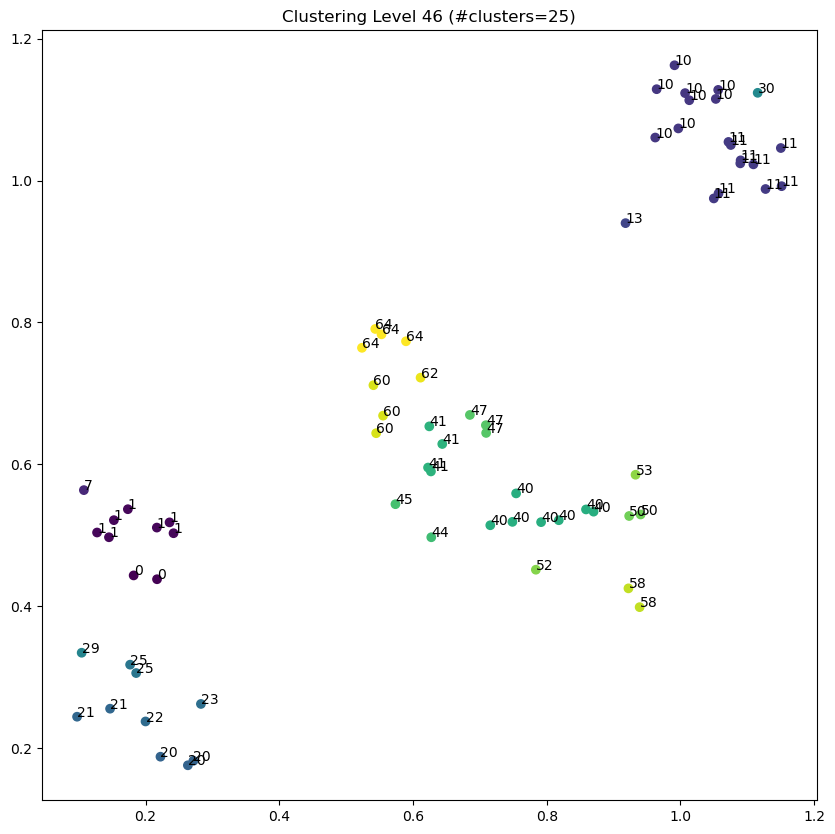

40.0 and 50.0 merged at distance 0.053566242123310244


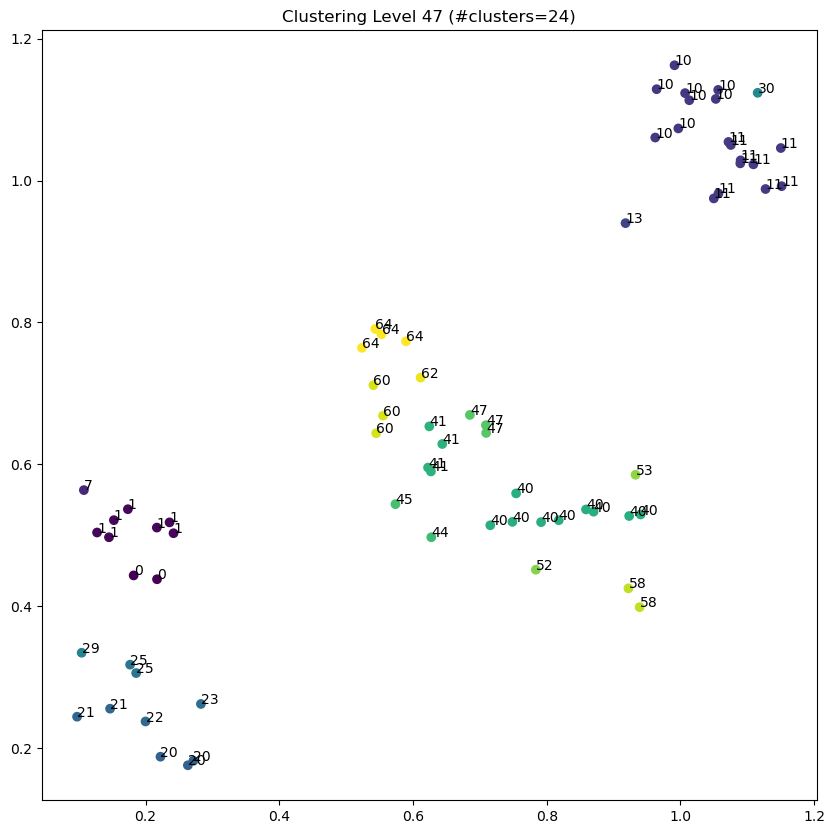

20.0 and 22.0 merged at distance 0.05445925107112465


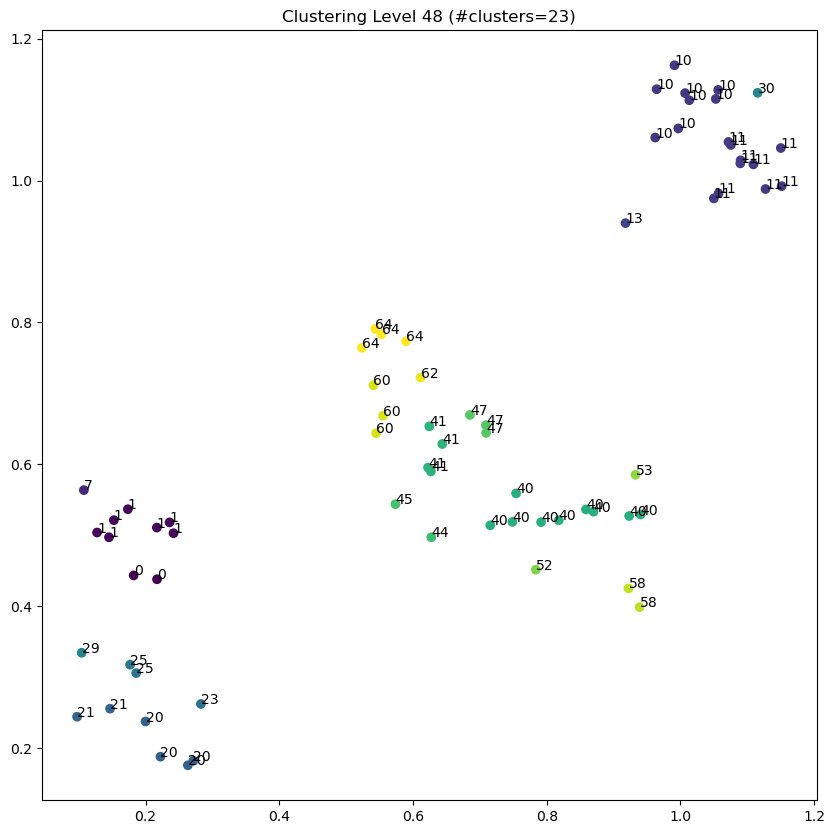

60.0 and 64.0 merged at distance 0.055410777163644113


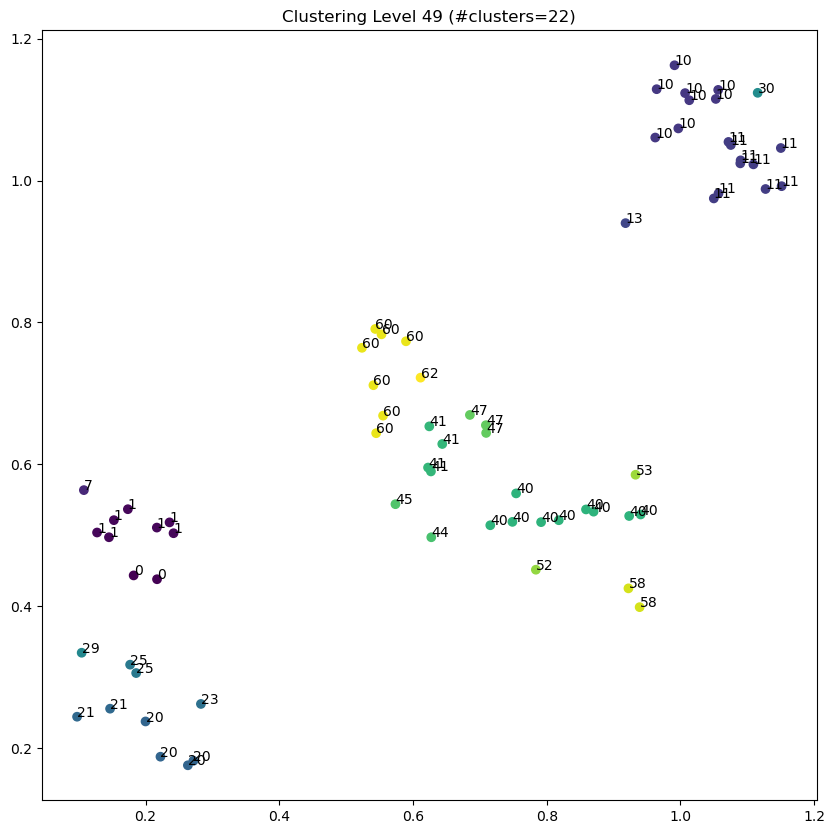

60.0 and 62.0 merged at distance 0.05569528170732298


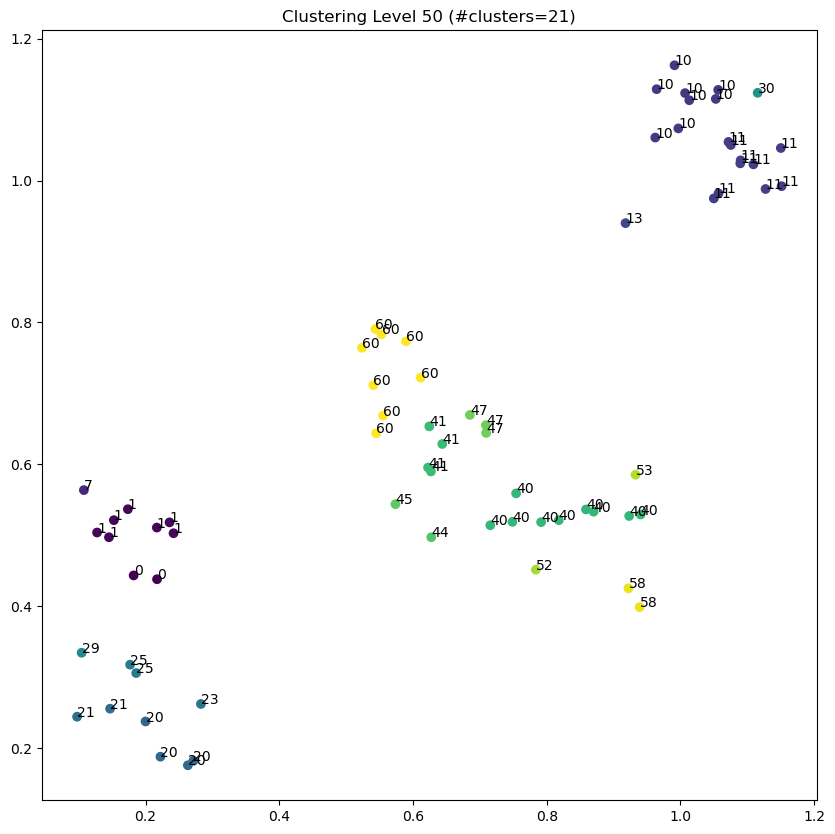

20.0 and 21.0 merged at distance 0.0560001540459818


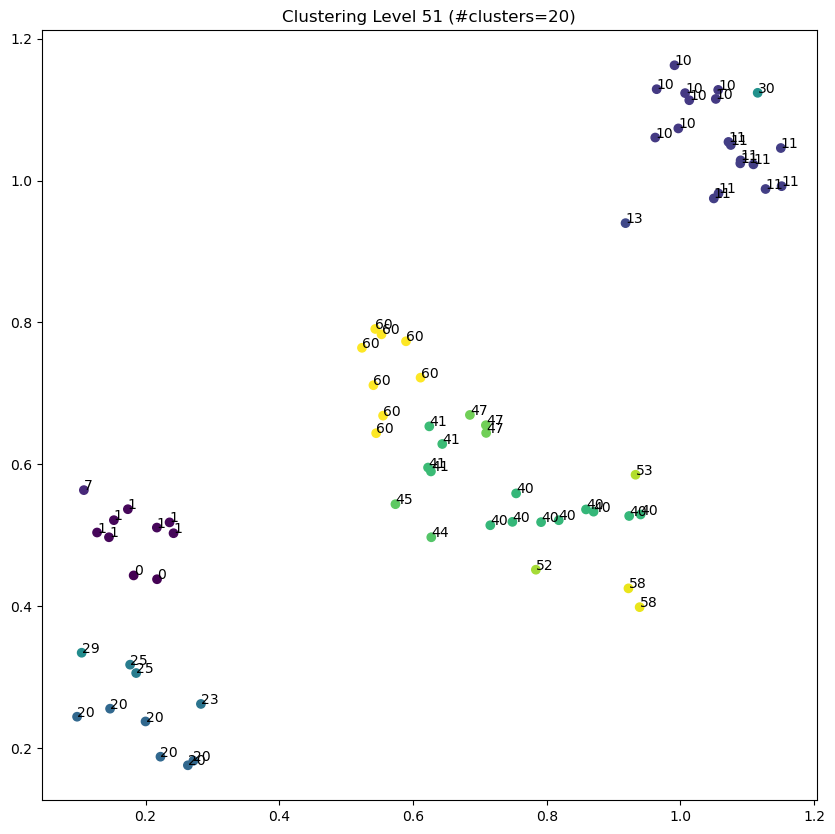

40.0 and 53.0 merged at distance 0.056513605056126


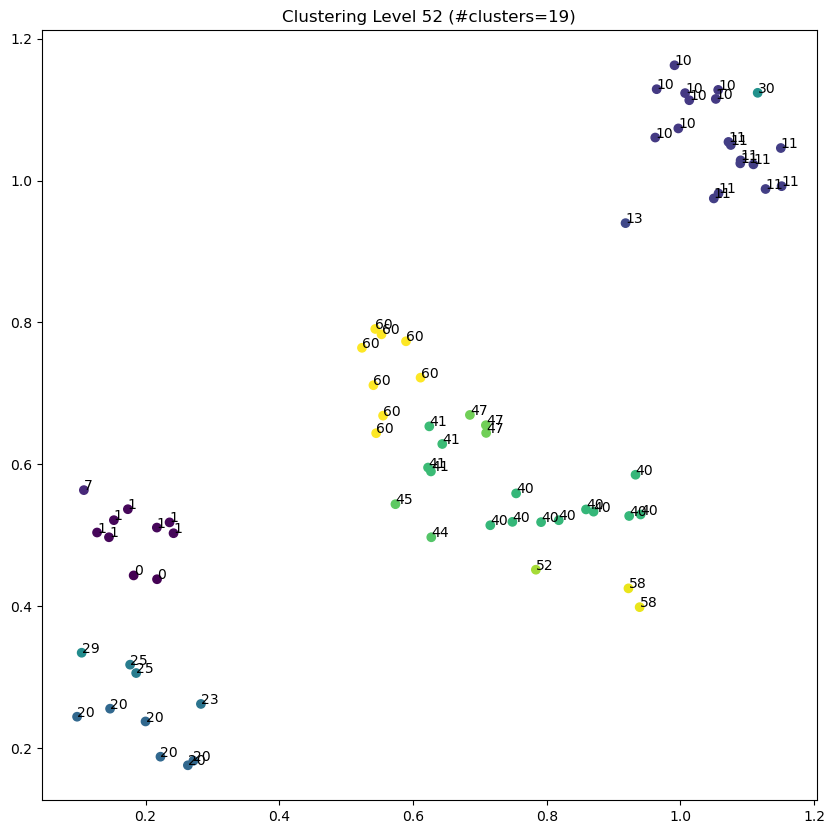

41.0 and 47.0 merged at distance 0.058174496745892305


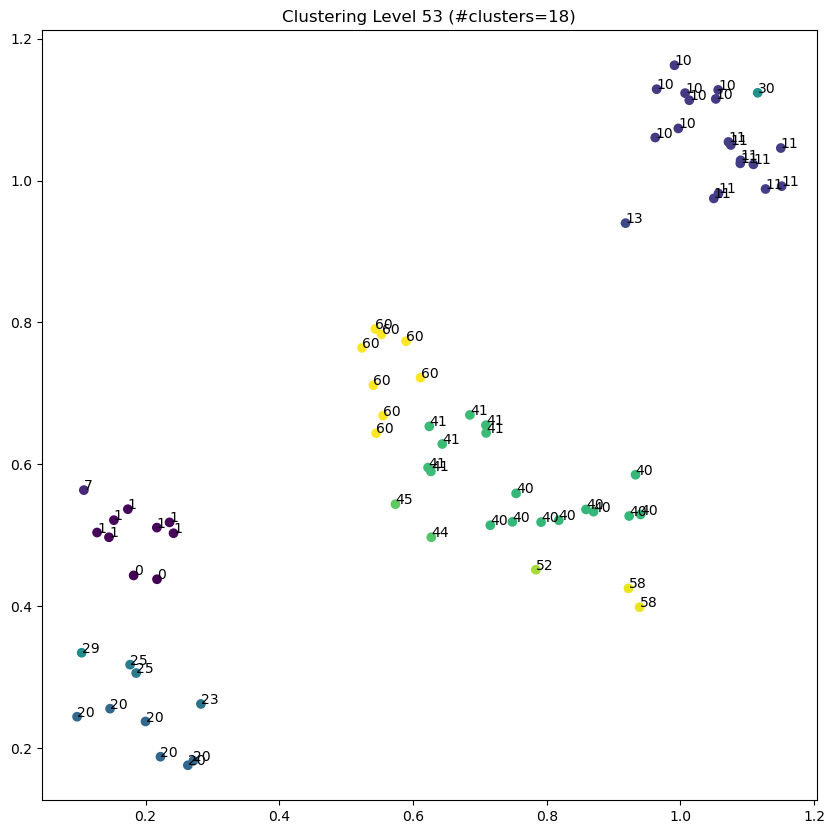

10.0 and 30.0 merged at distance 0.05922345932198647


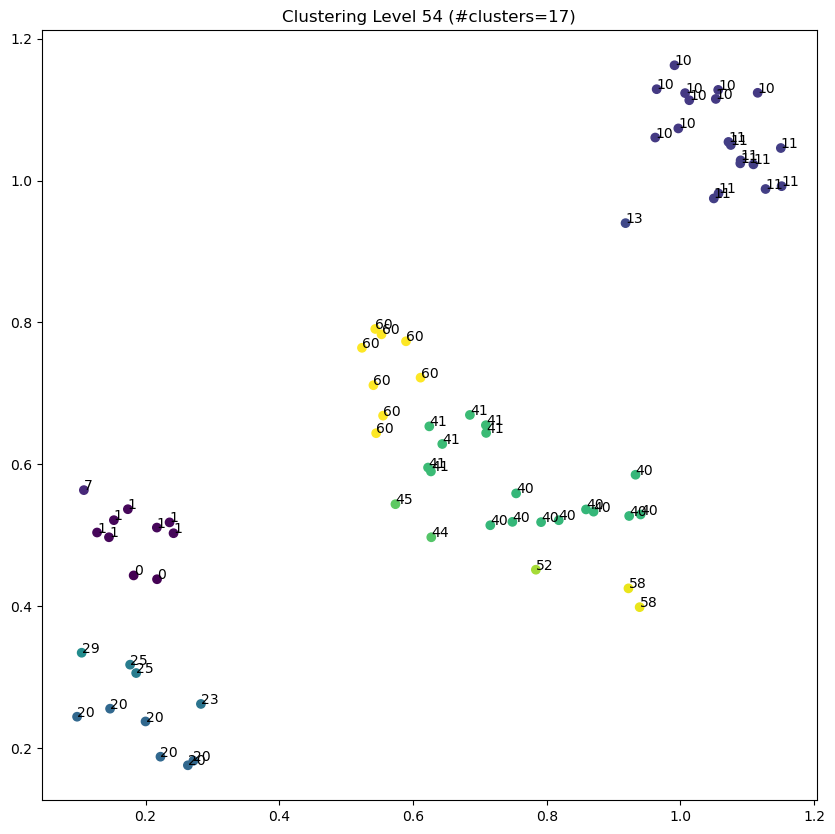

1.0 and 7.0 merged at distance 0.0617083927080096


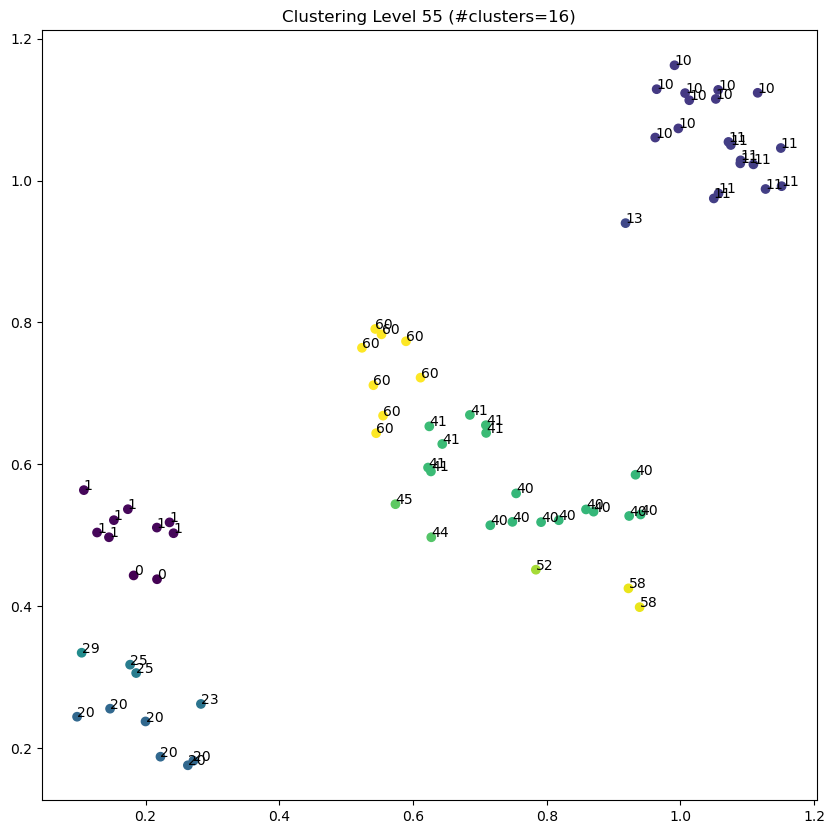

10.0 and 11.0 merged at distance 0.06349806415843609


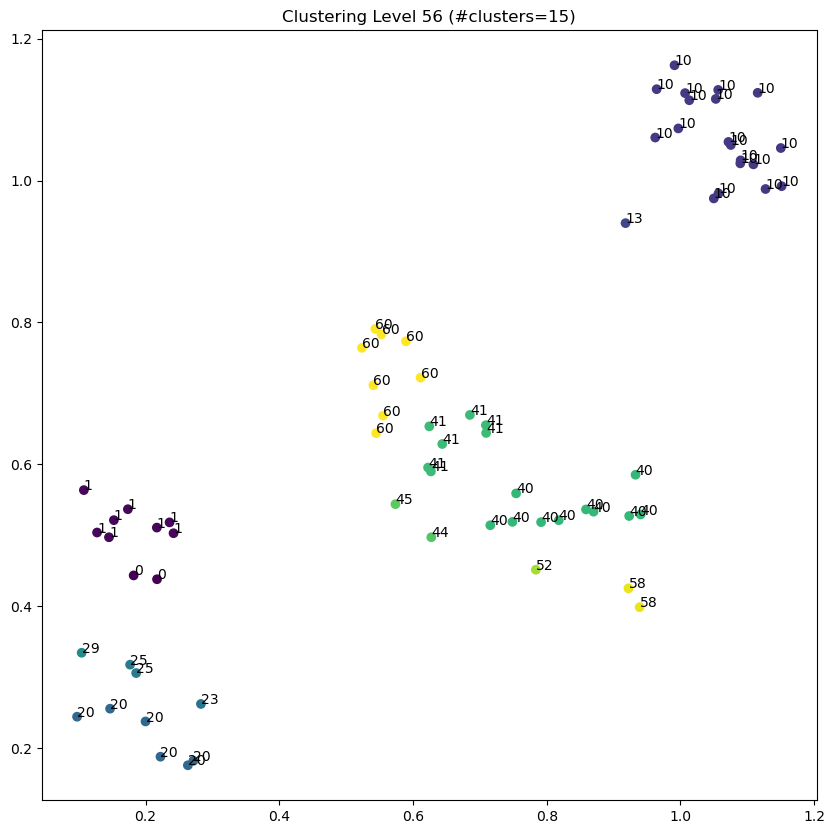

20.0 and 25.0 merged at distance 0.06359128713288359


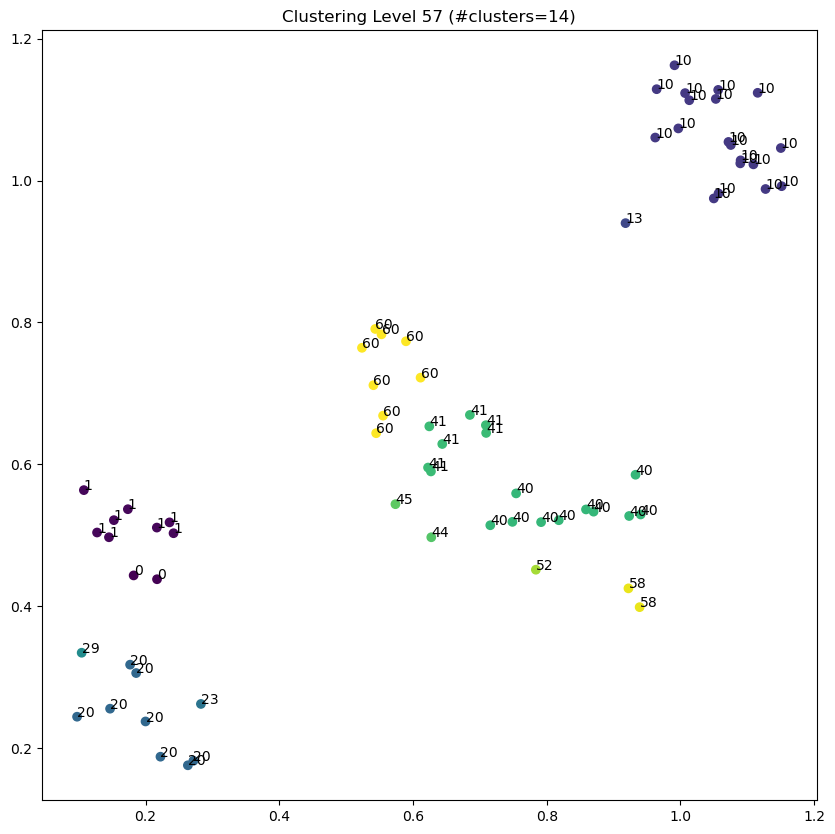

0.0 and 1.0 merged at distance 0.06523697080416038


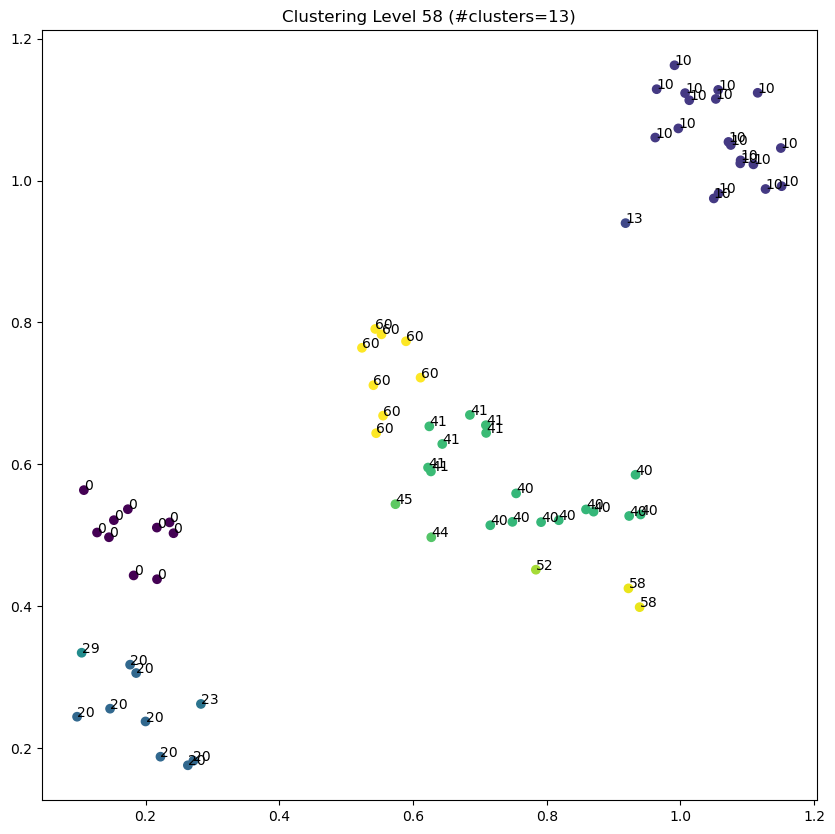

40.0 and 52.0 merged at distance 0.06750533561478199


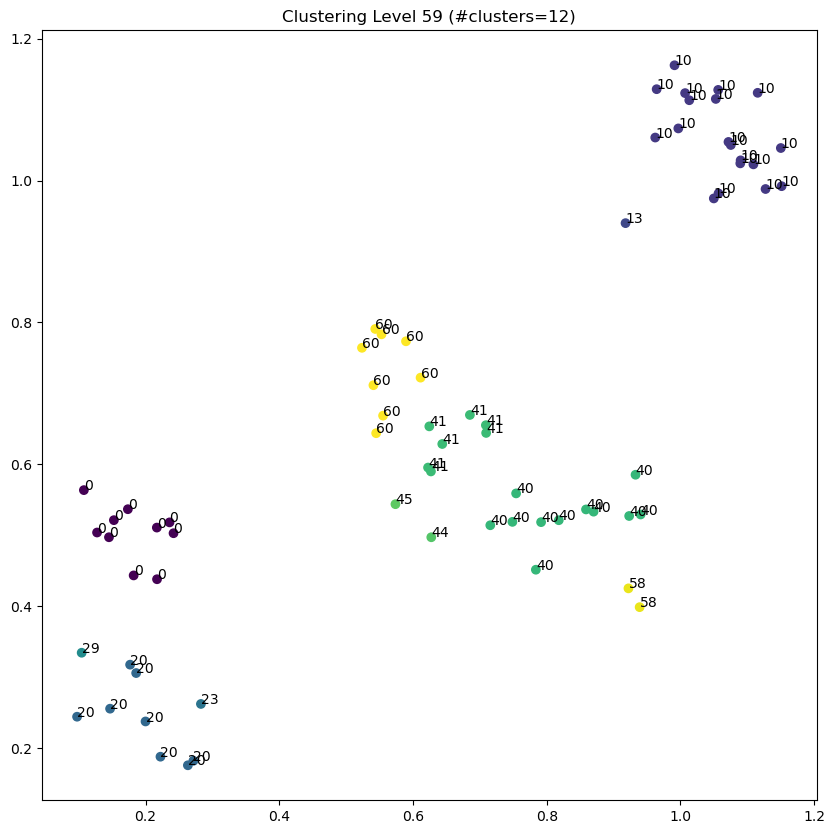

41.0 and 60.0 merged at distance 0.06991004819266634


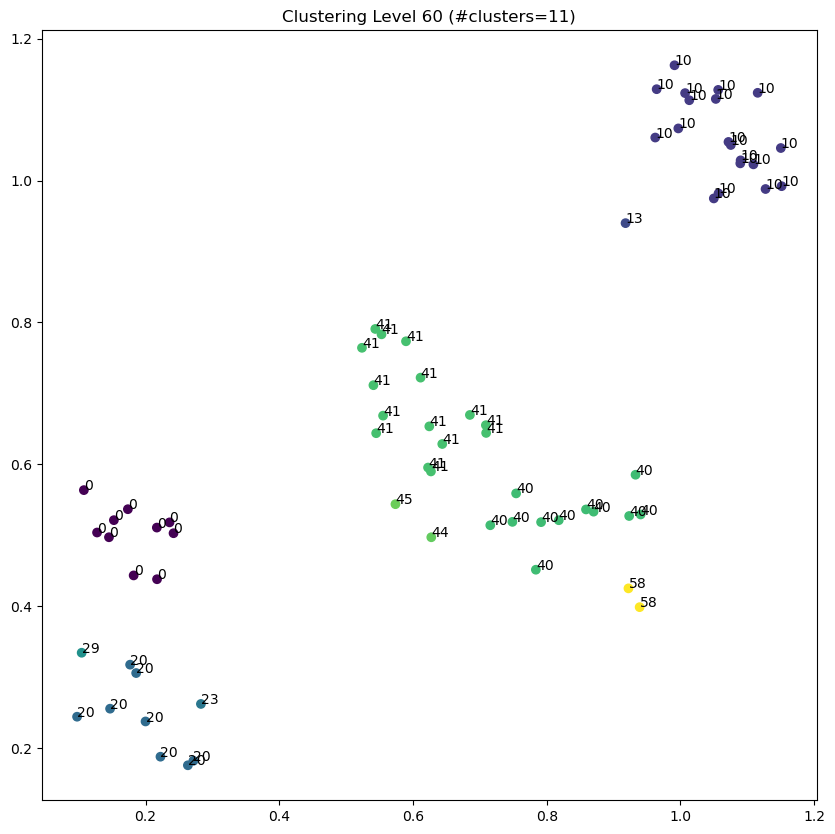

41.0 and 45.0 merged at distance 0.07034225200945987


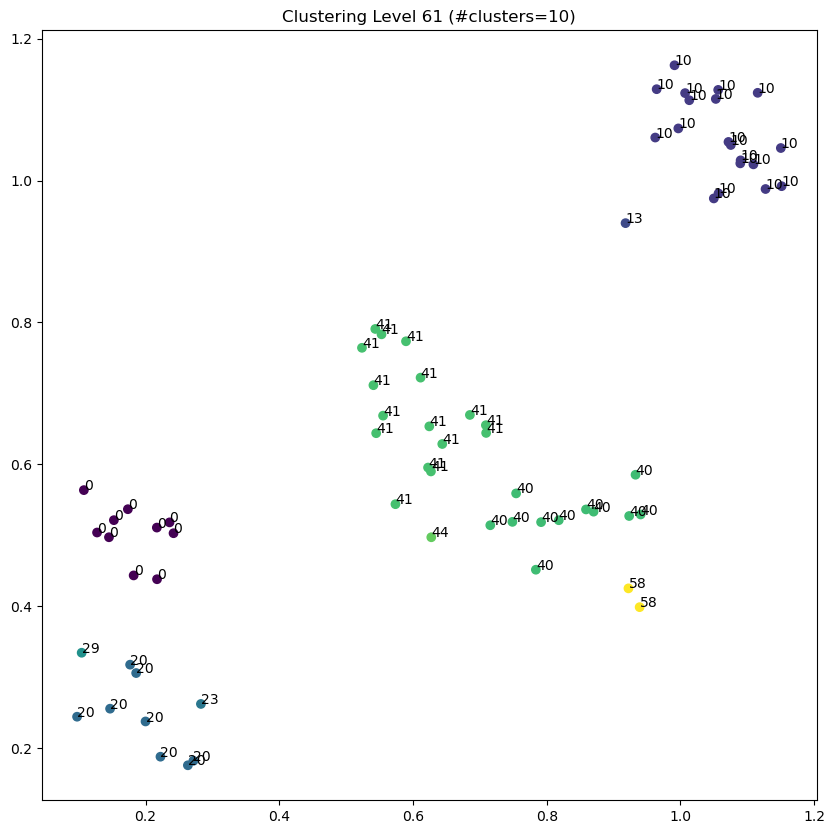

41.0 and 44.0 merged at distance 0.07103669962655589


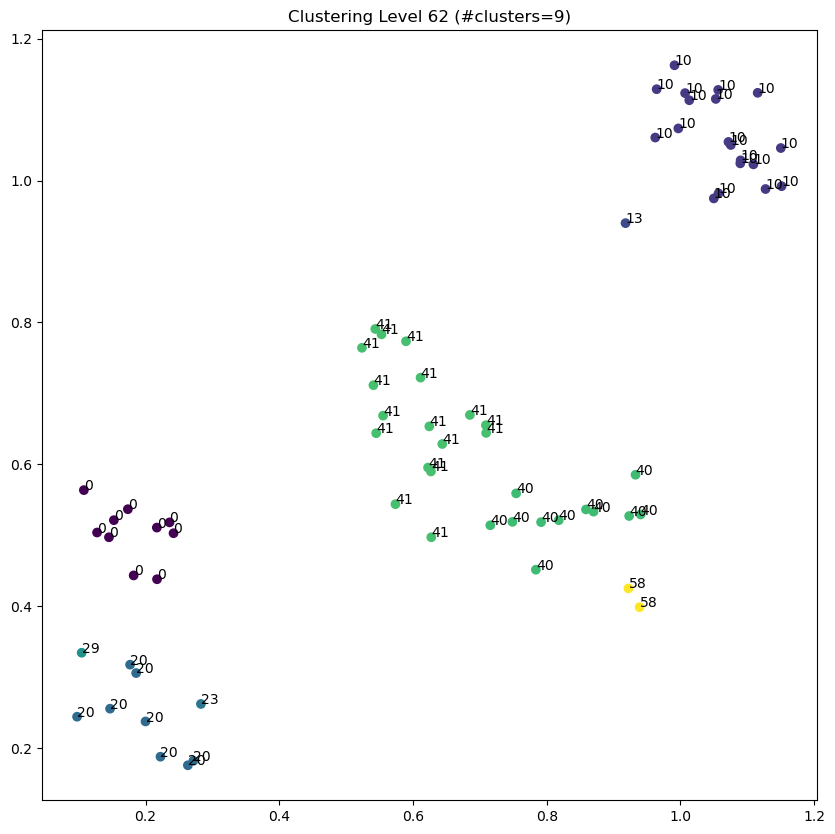

20.0 and 29.0 merged at distance 0.07438690107621461


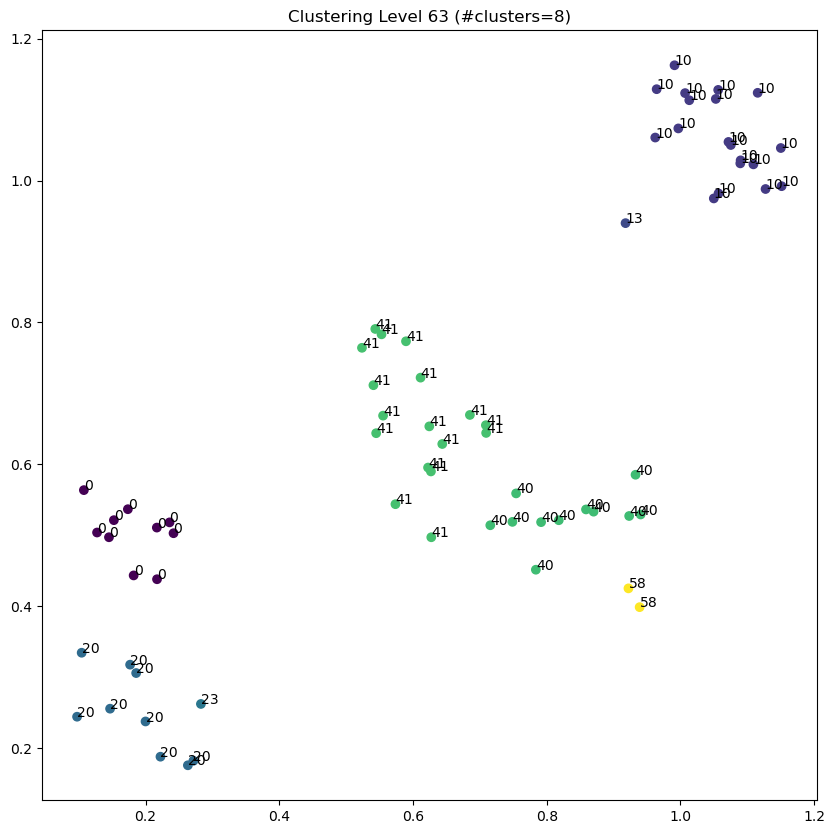

20.0 and 23.0 merged at distance 0.0808638820652653


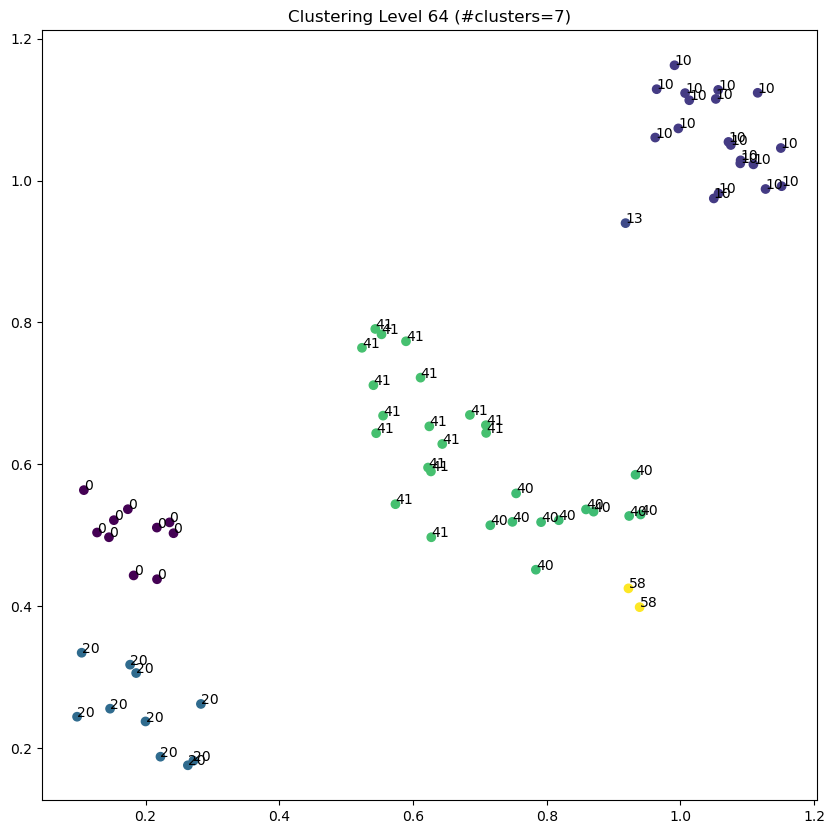

40.0 and 41.0 merged at distance 0.08987808148272791


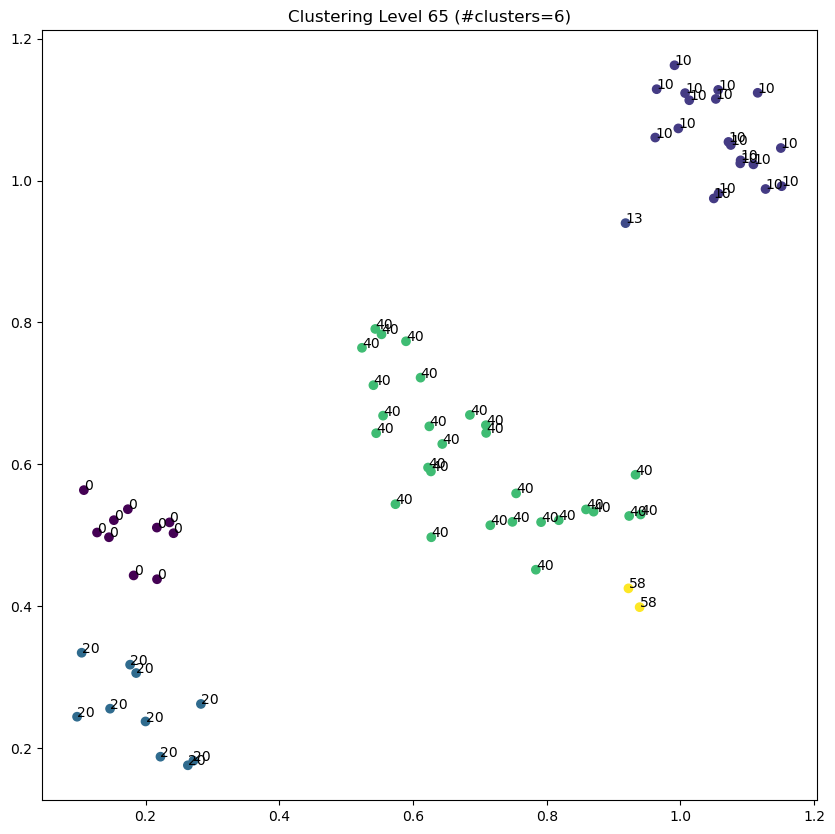

40.0 and 58.0 merged at distance 0.10201146947783007


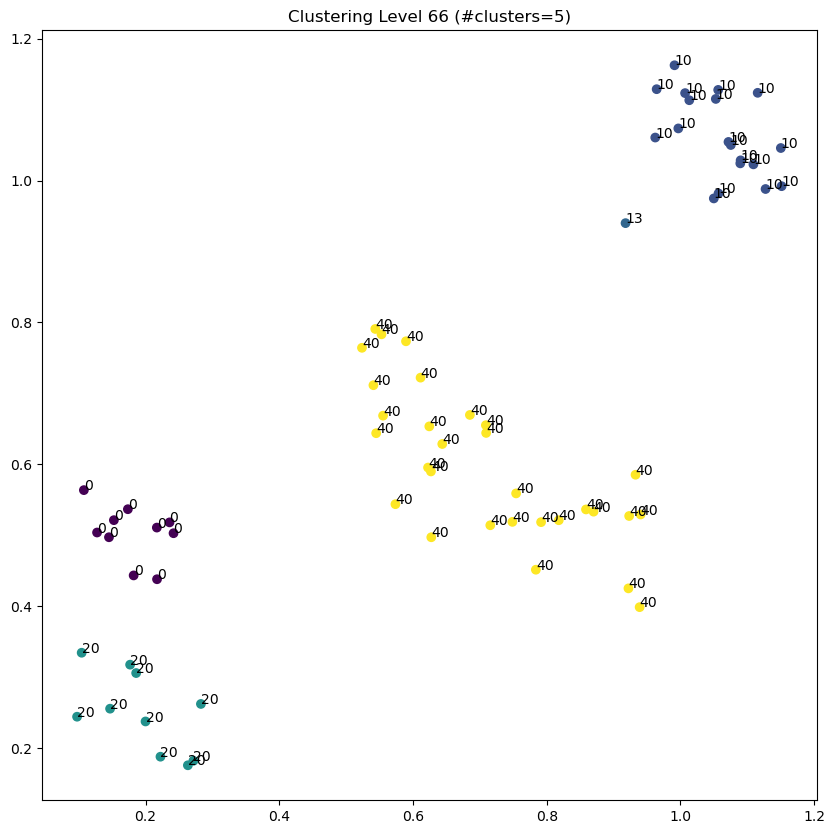

0.0 and 20.0 merged at distance 0.12589209292391768


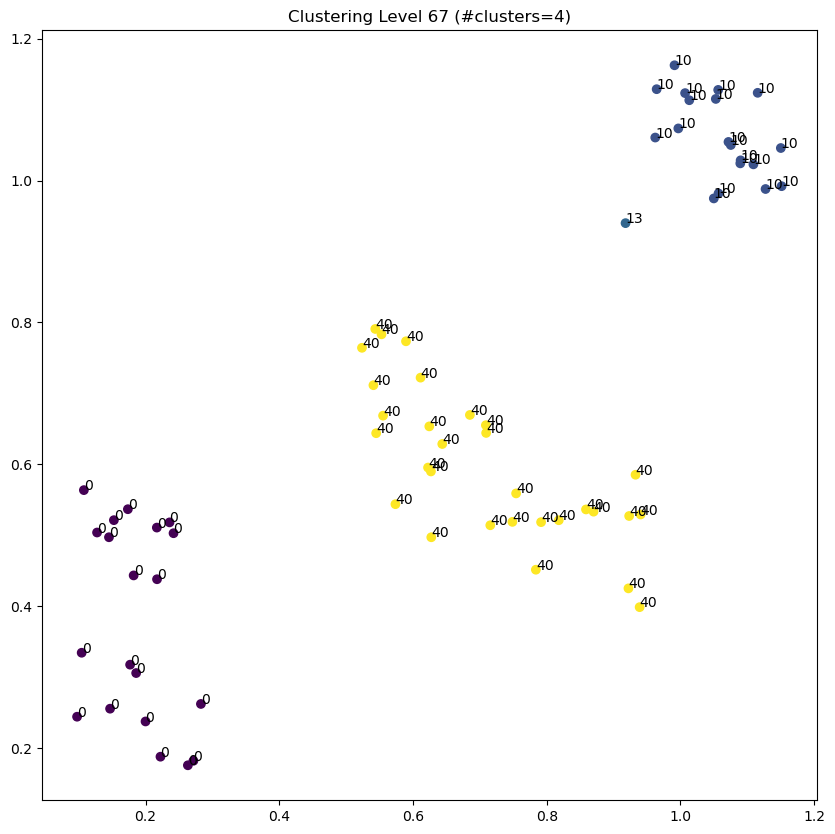

10.0 and 13.0 merged at distance 0.1285546205163503


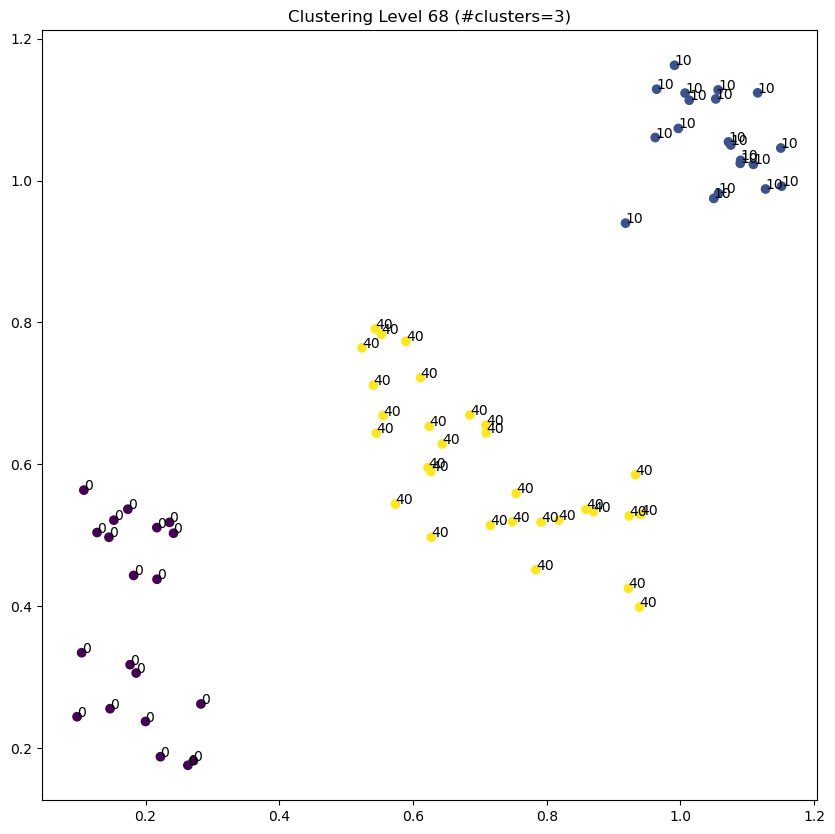

0.0 and 40.0 merged at distance 0.33363582673993364


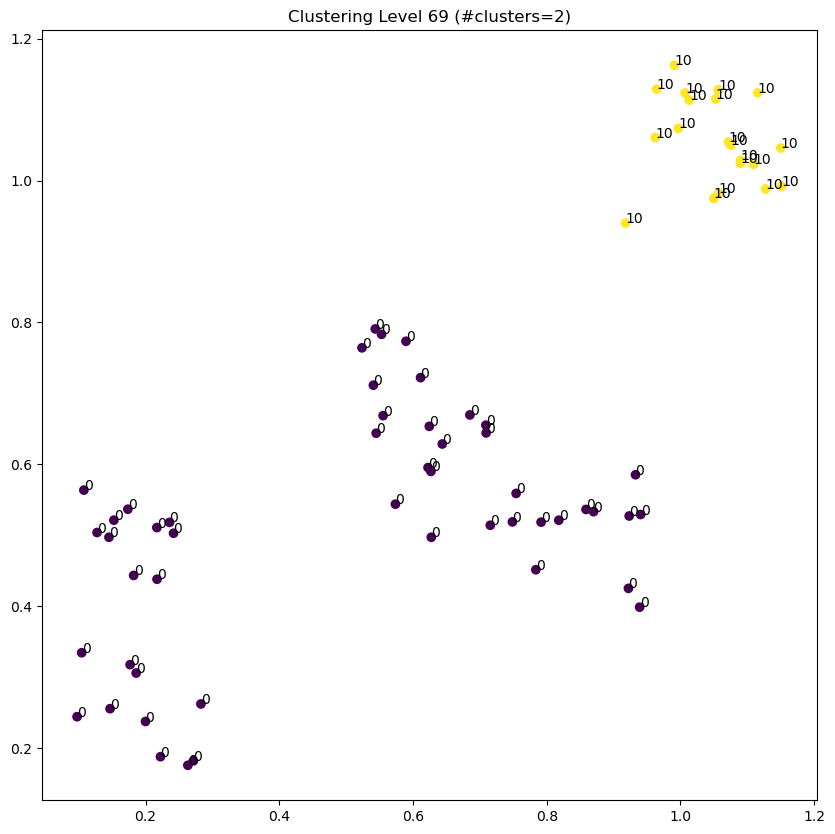

0.0 and 10.0 merged at distance 0.3531819841017049


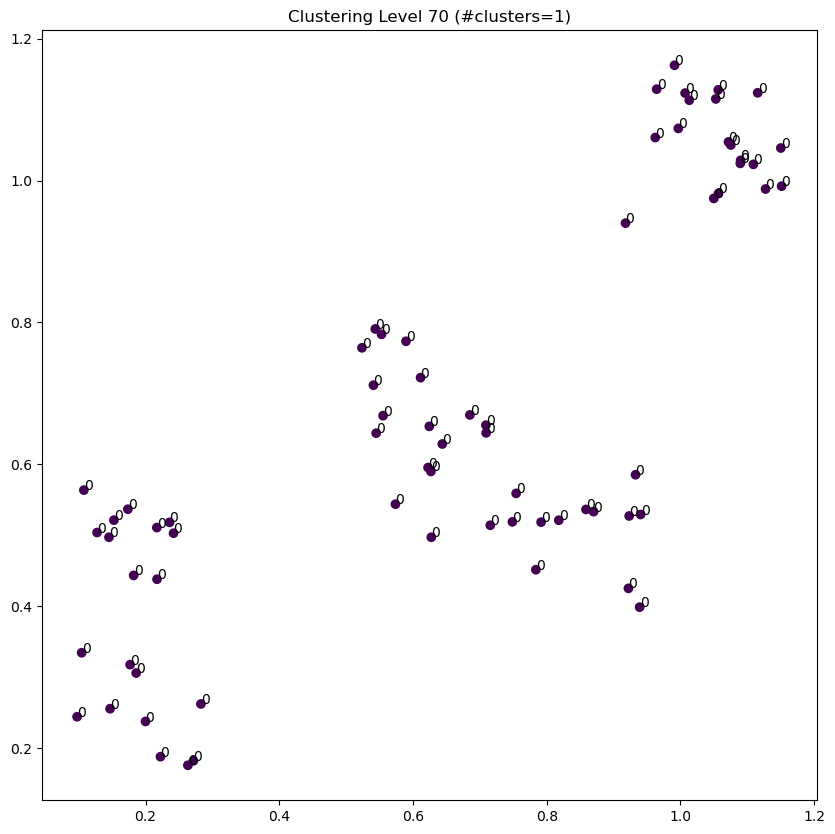

In [58]:
sl = AgglomerativeClustering(linkage_type="single_linkage")
sl.fit(points)
sl.show_clusterings()

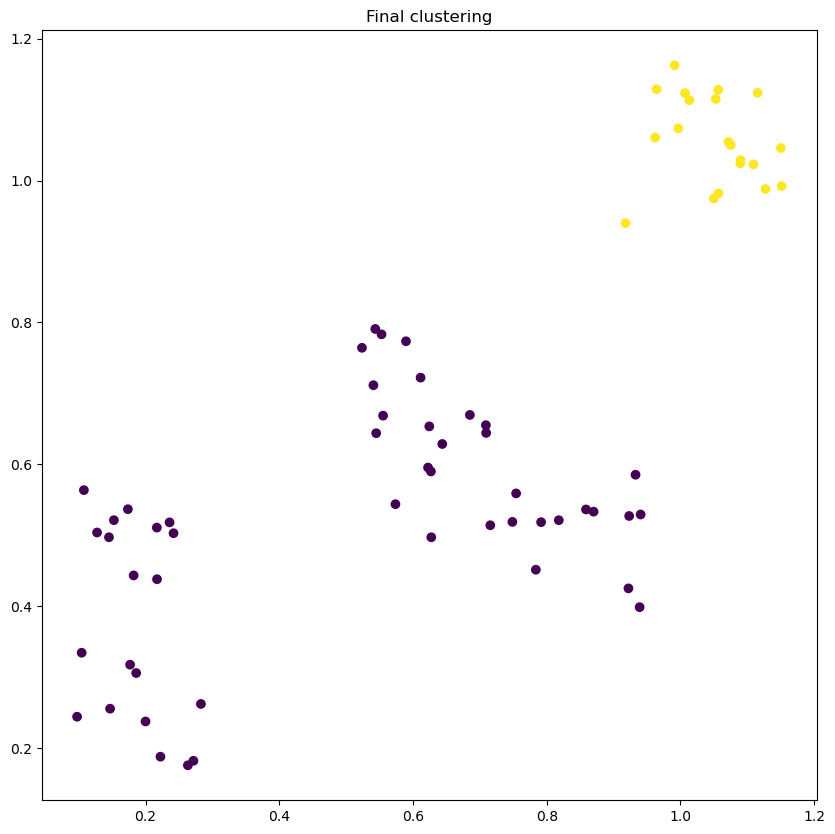

In [59]:
sl.show_clustering()

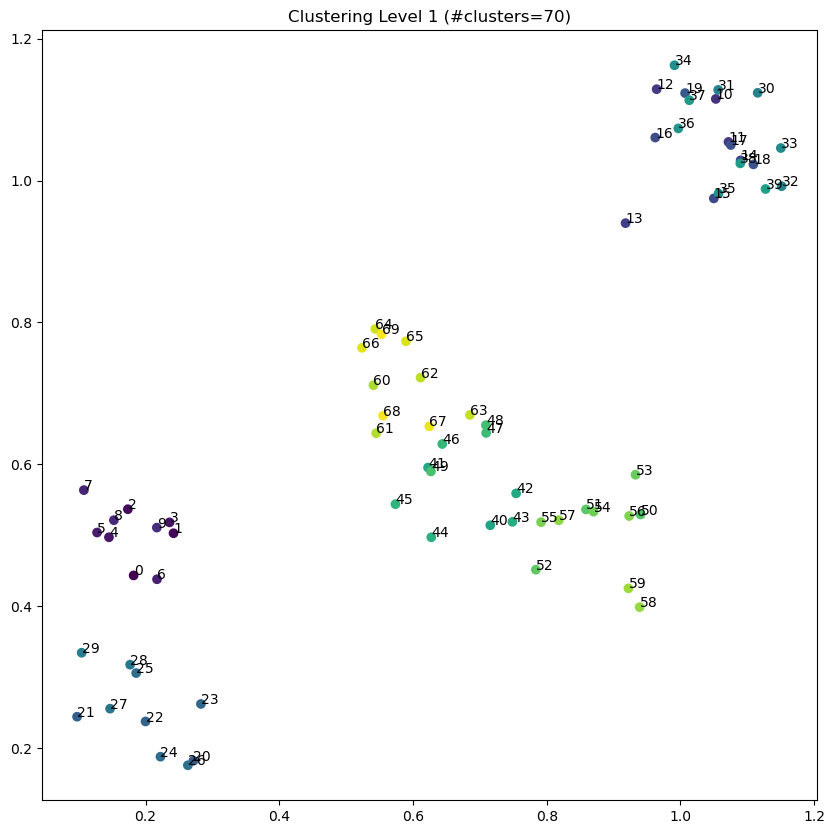

14.0 and 38.0 merged at distance 0.004286921552180861


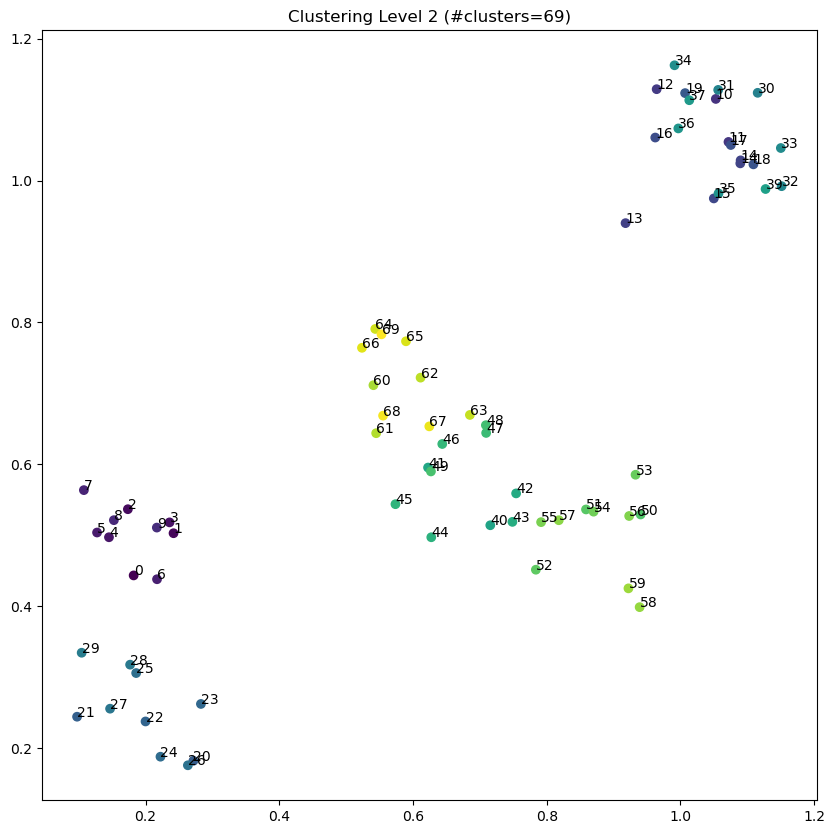

11.0 and 17.0 merged at distance 0.005572714603954559


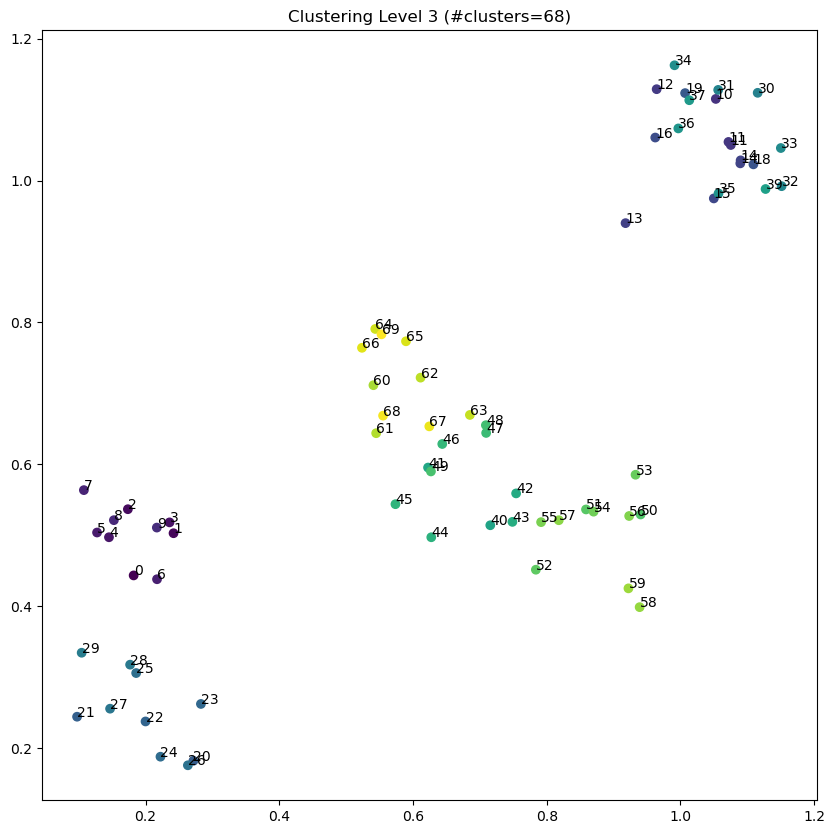

41.0 and 49.0 merged at distance 0.0069642097521790845


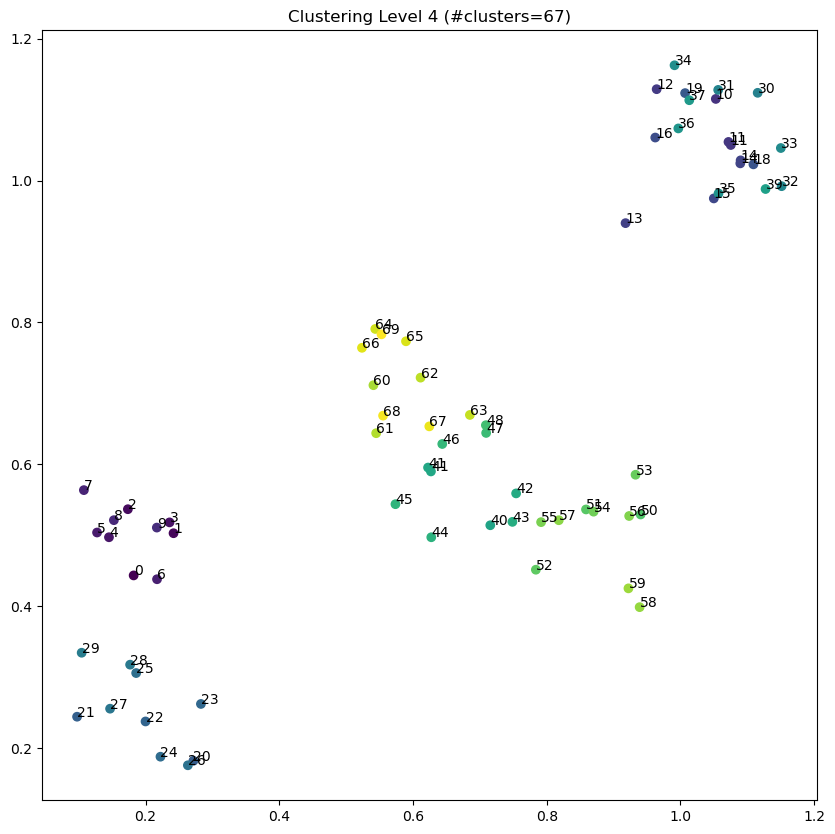

15.0 and 35.0 merged at distance 0.009937188605087249


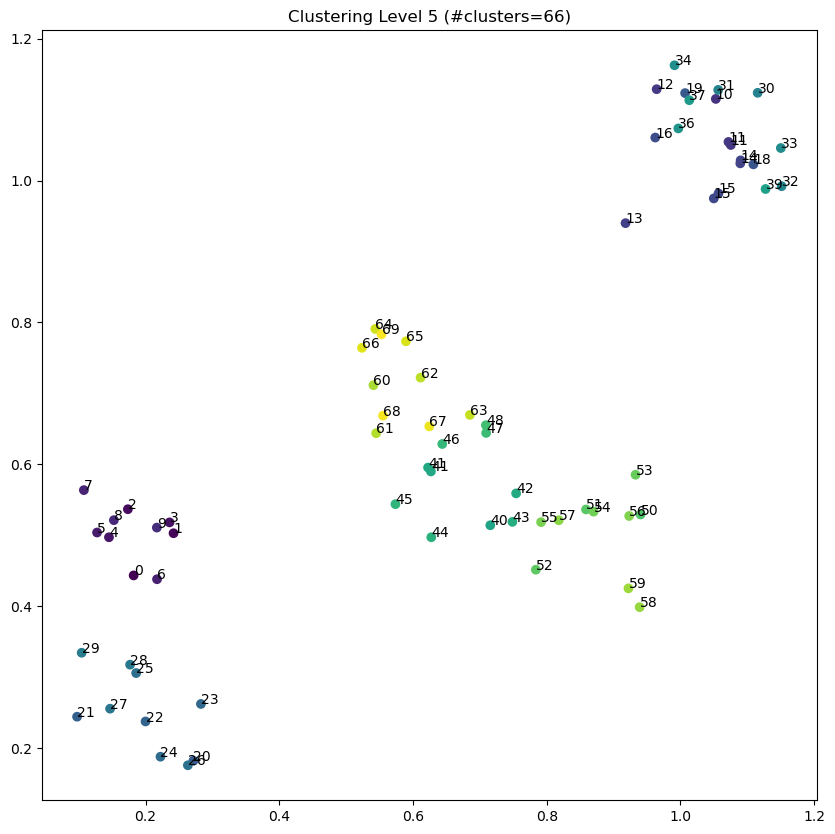

20.0 and 26.0 merged at distance 0.010445026704371562


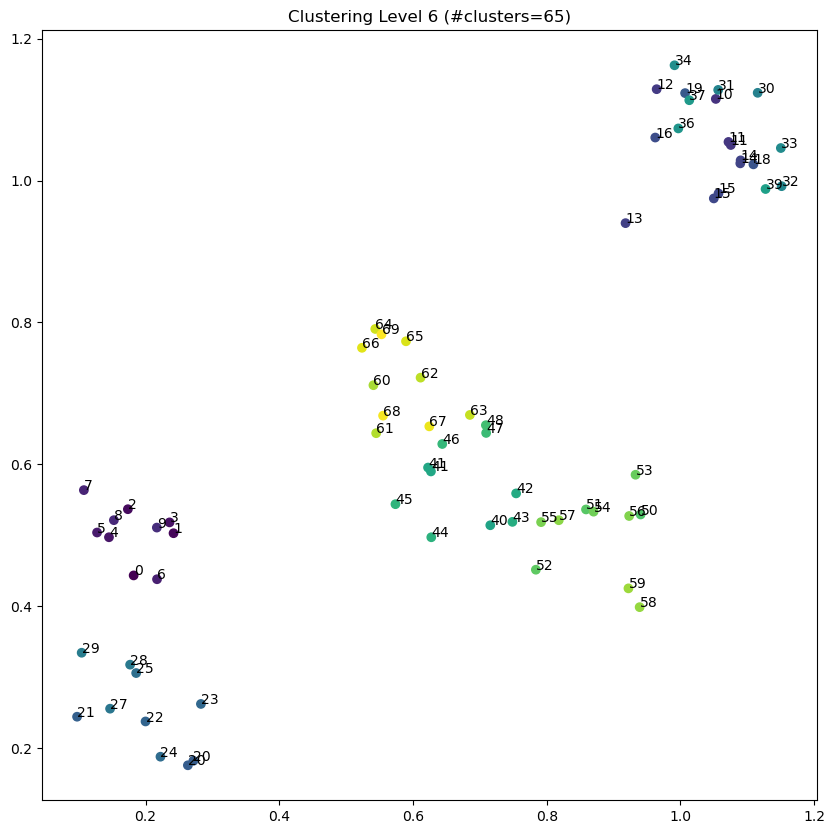

47.0 and 48.0 merged at distance 0.010904194884022366


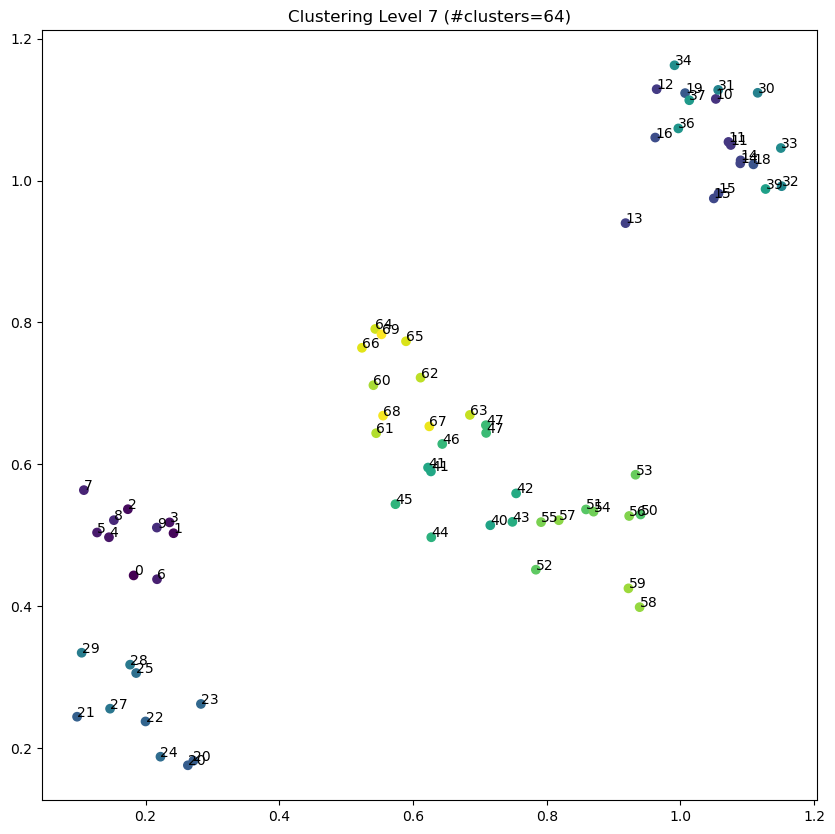

51.0 and 54.0 merged at distance 0.01175268130615428


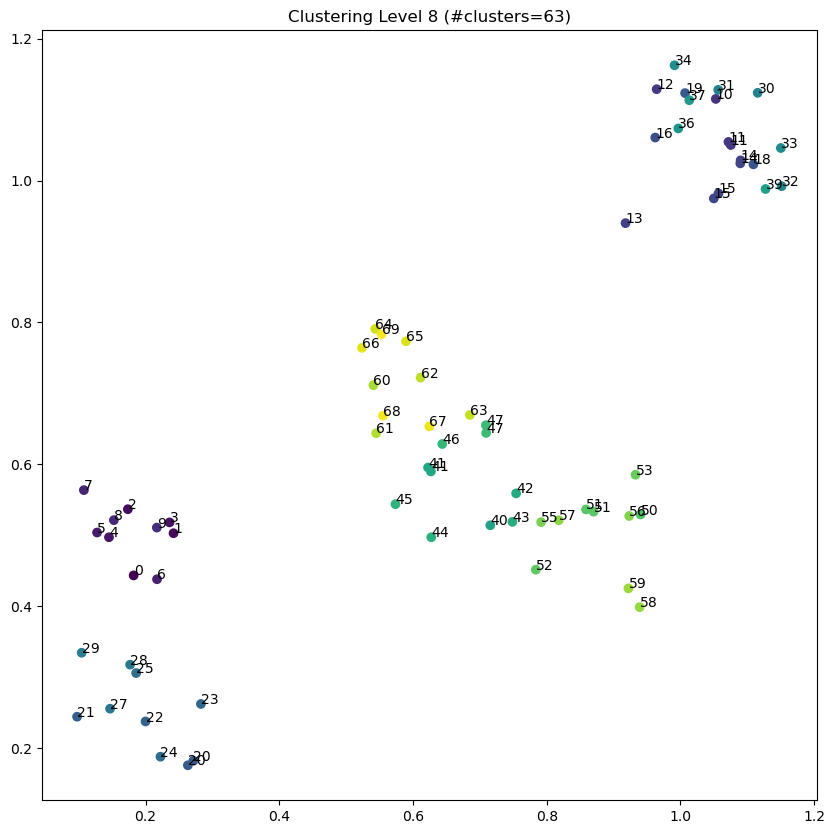

19.0 and 37.0 merged at distance 0.011826605314008327


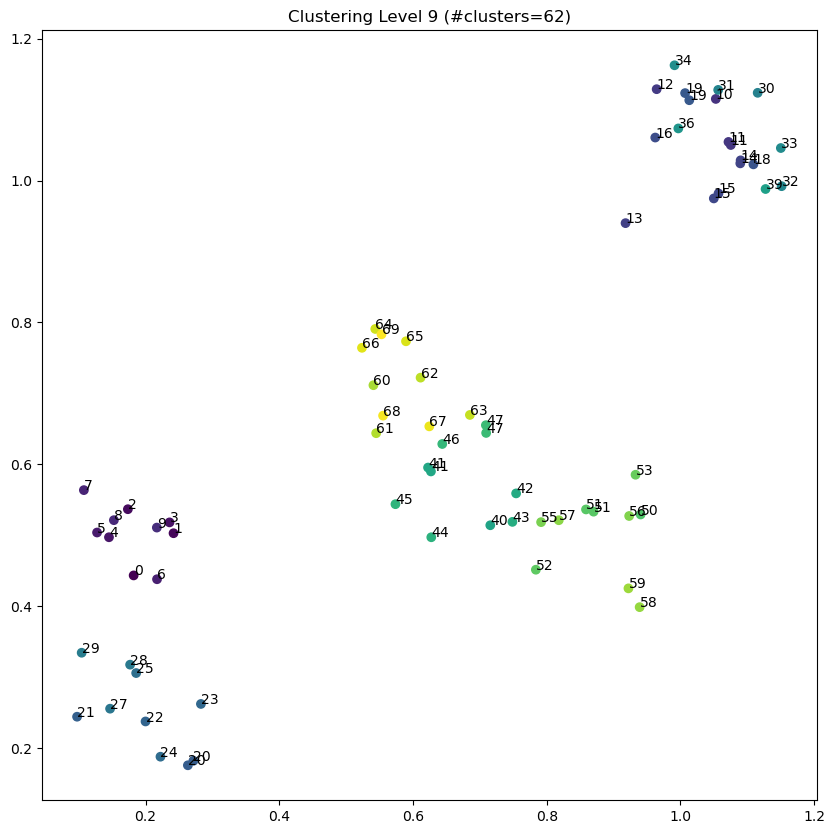

64.0 and 69.0 merged at distance 0.012046153905048682


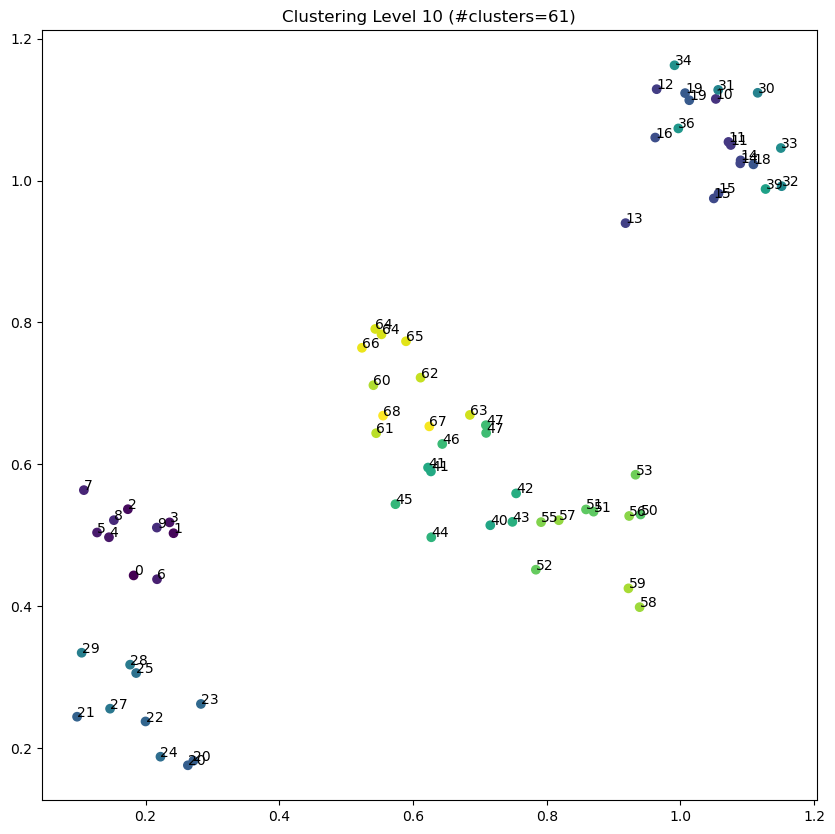

10.0 and 31.0 merged at distance 0.013224264225377503


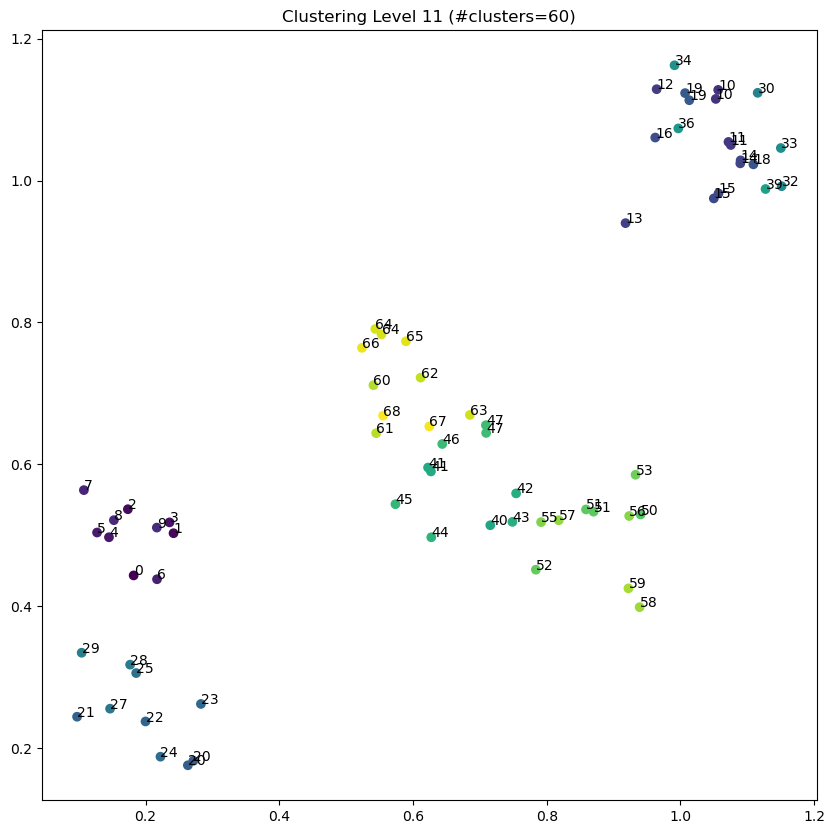

25.0 and 28.0 merged at distance 0.01487651696679805


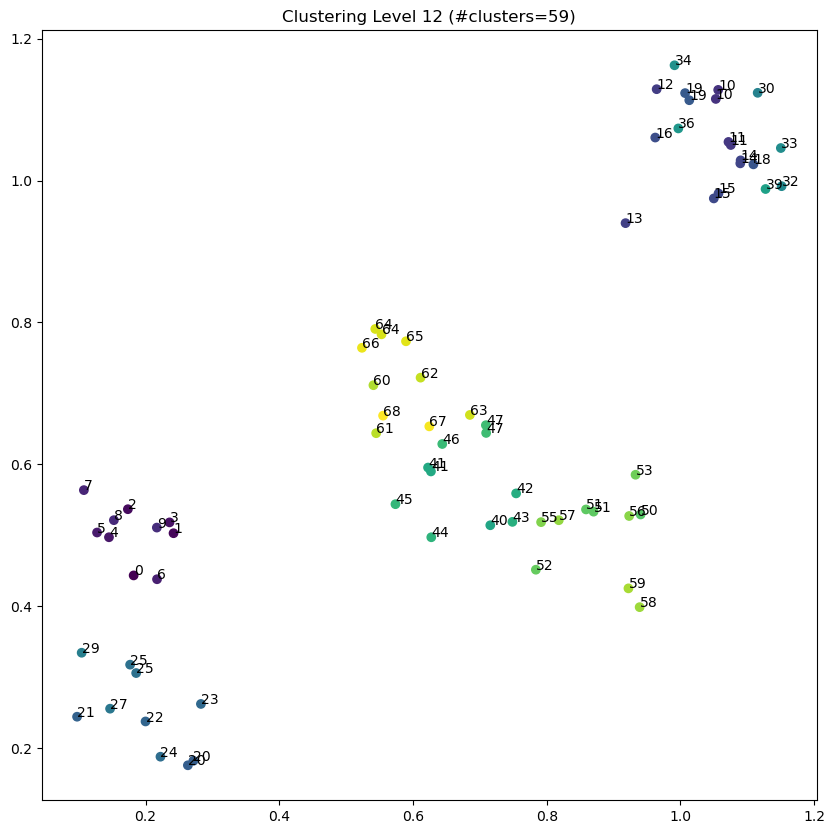

1.0 and 3.0 merged at distance 0.0163925866105426


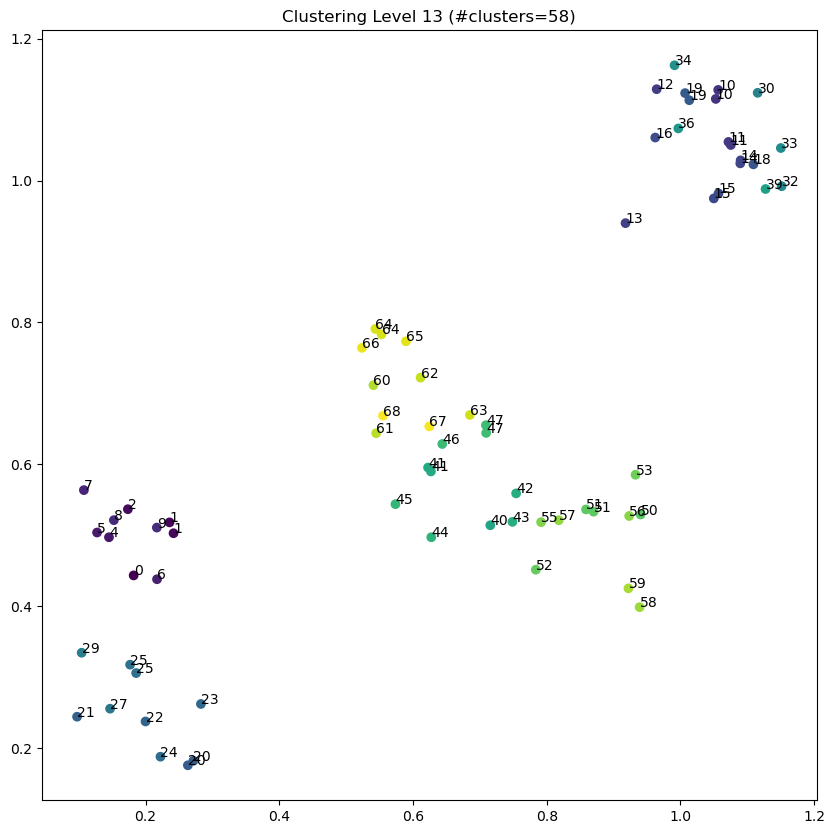

50.0 and 56.0 merged at distance 0.01728462259028197


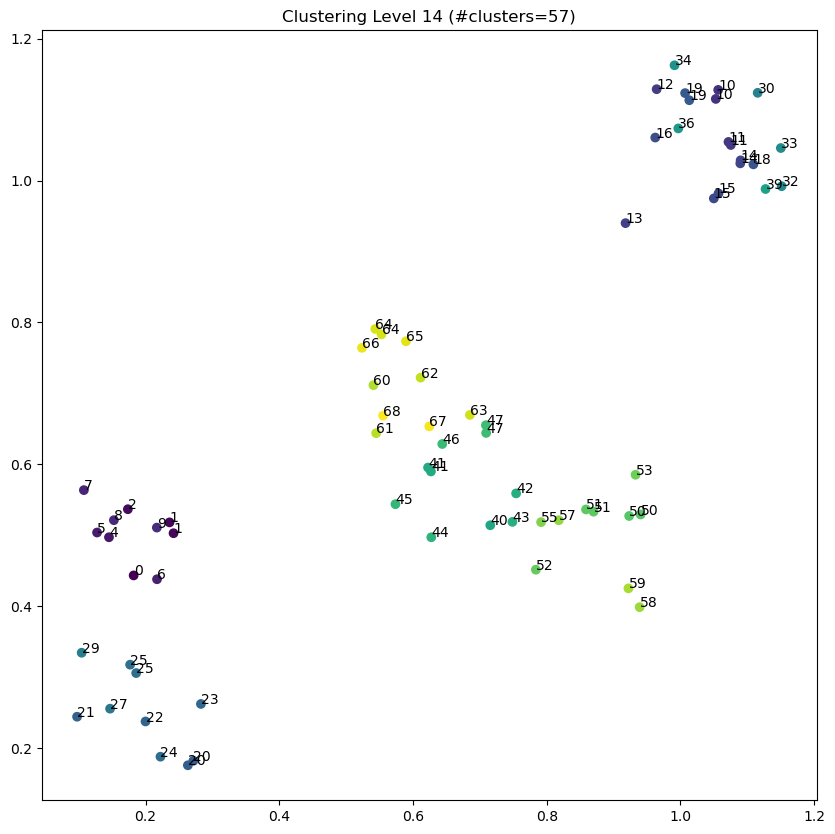

4.0 and 5.0 merged at distance 0.01903730674105812


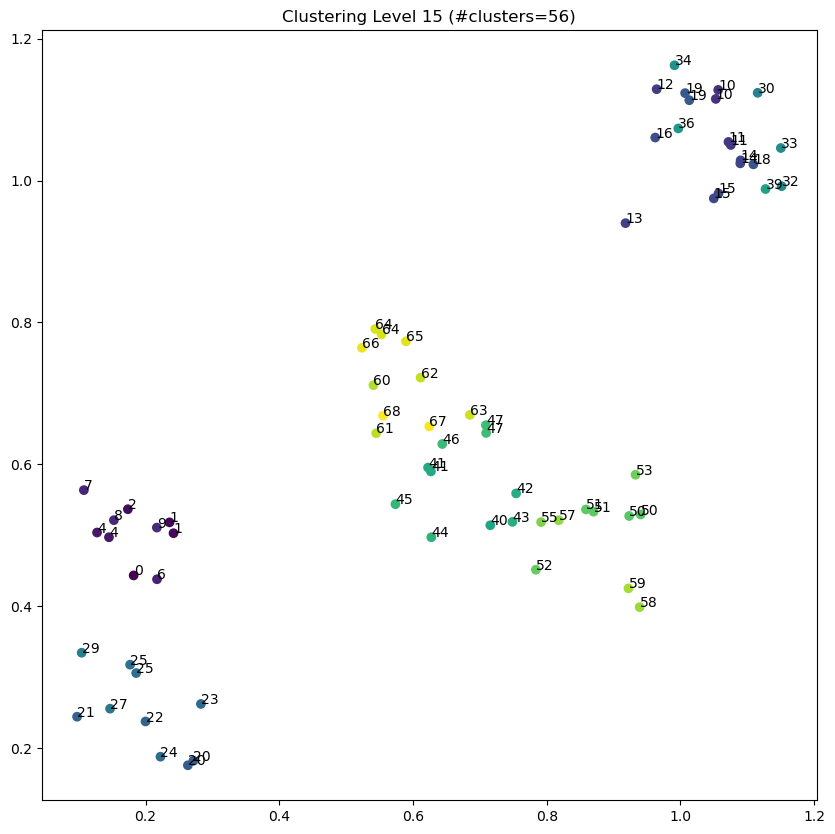

14.0 and 18.0 merged at distance 0.01995262596112992


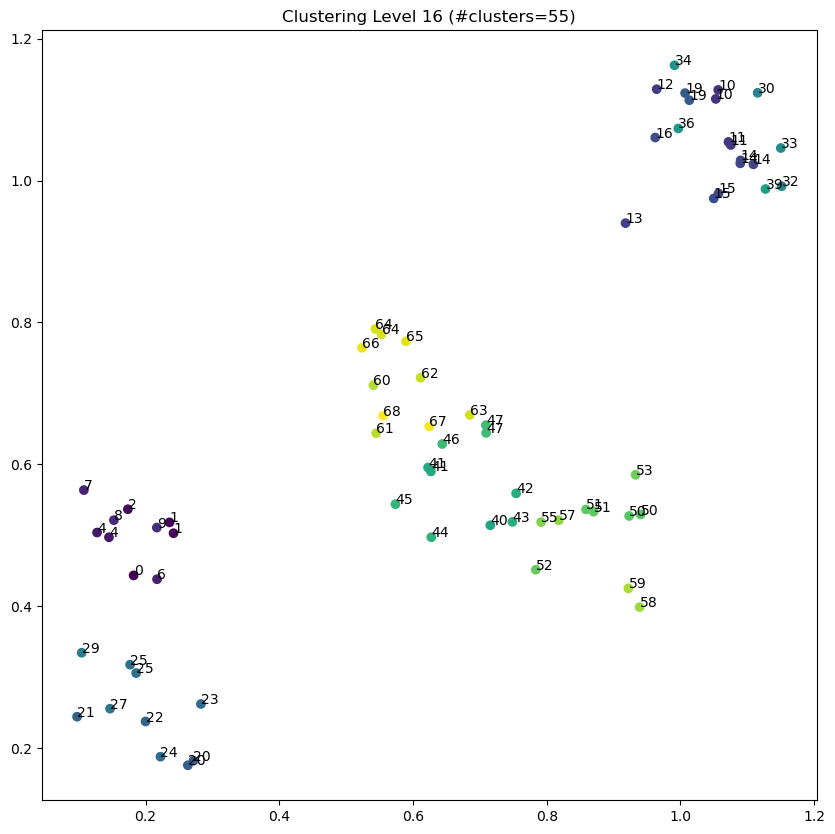

32.0 and 39.0 merged at distance 0.024358054485358004


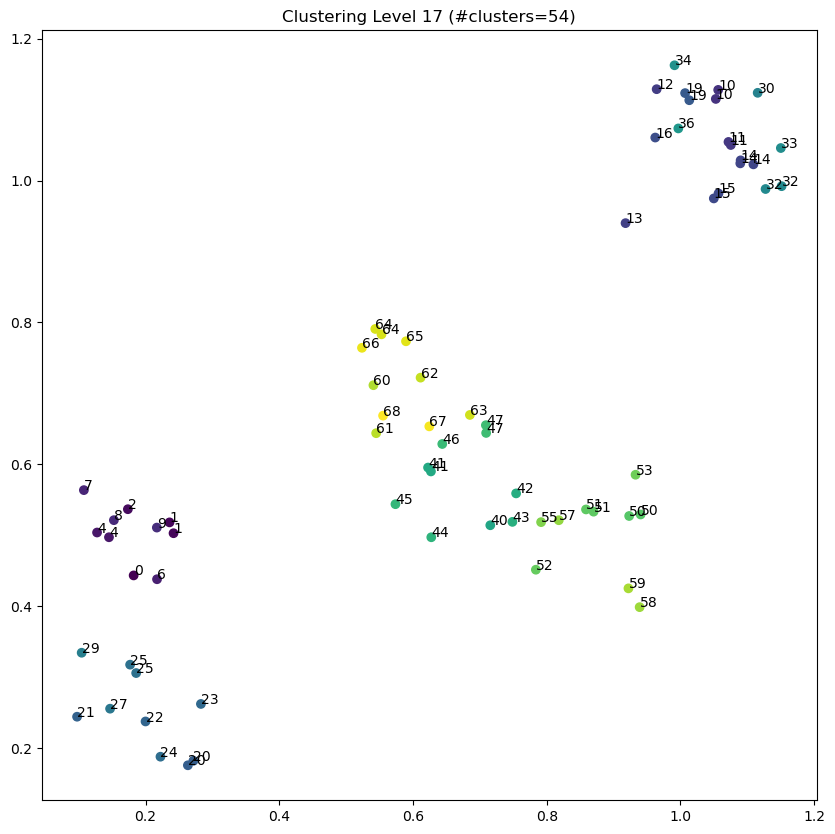

2.0 and 8.0 merged at distance 0.02600755249814834


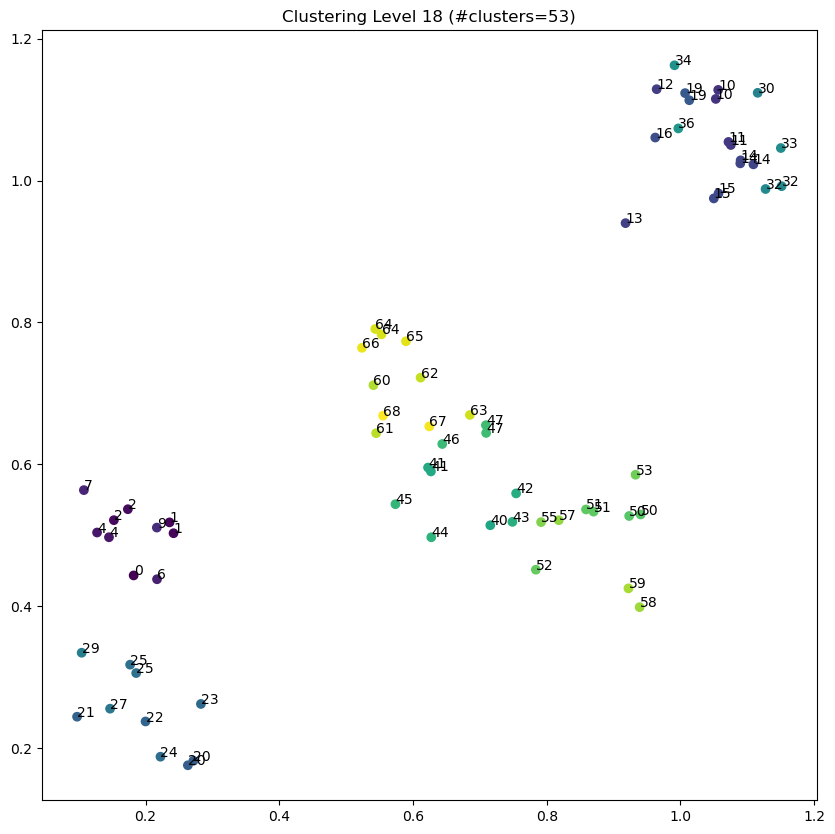

1.0 and 9.0 merged at distance 0.026187659425152842


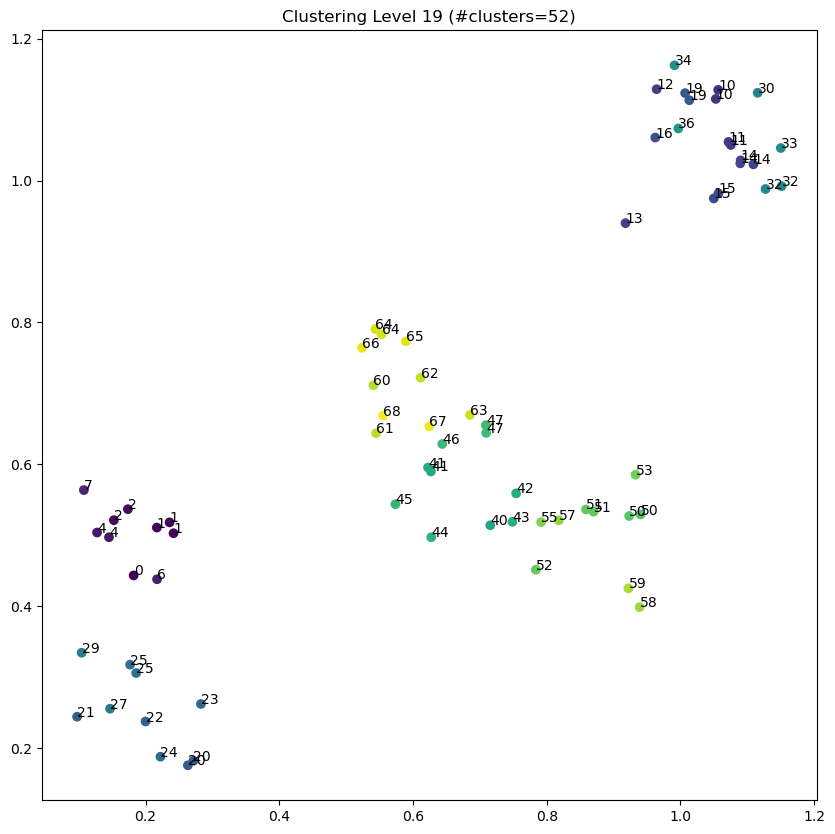

55.0 and 57.0 merged at distance 0.026608583041843943


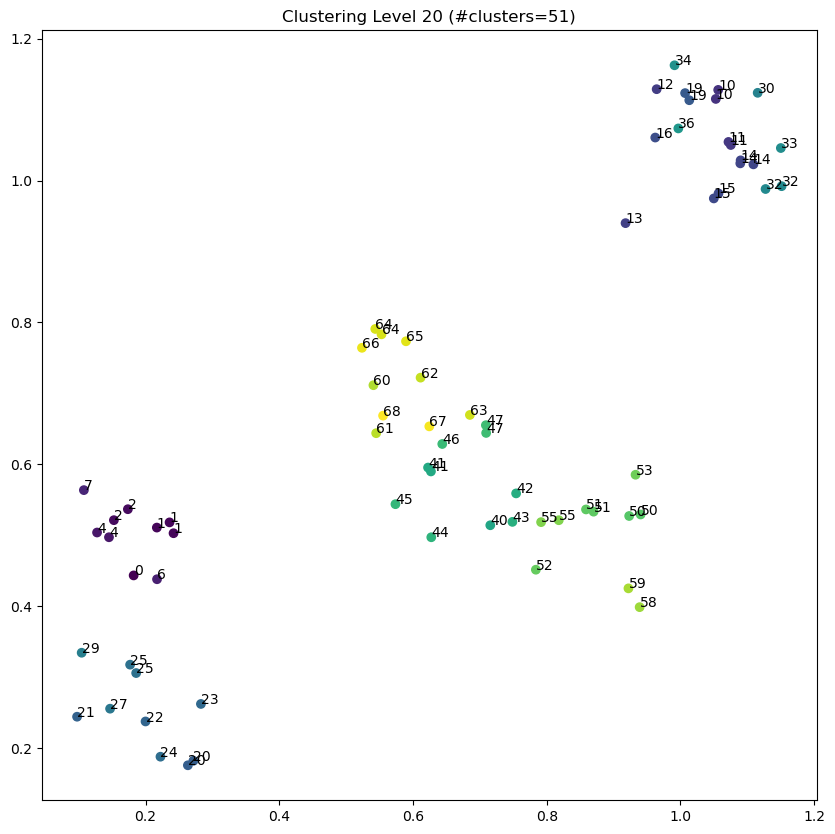

61.0 and 68.0 merged at distance 0.02680331023253282


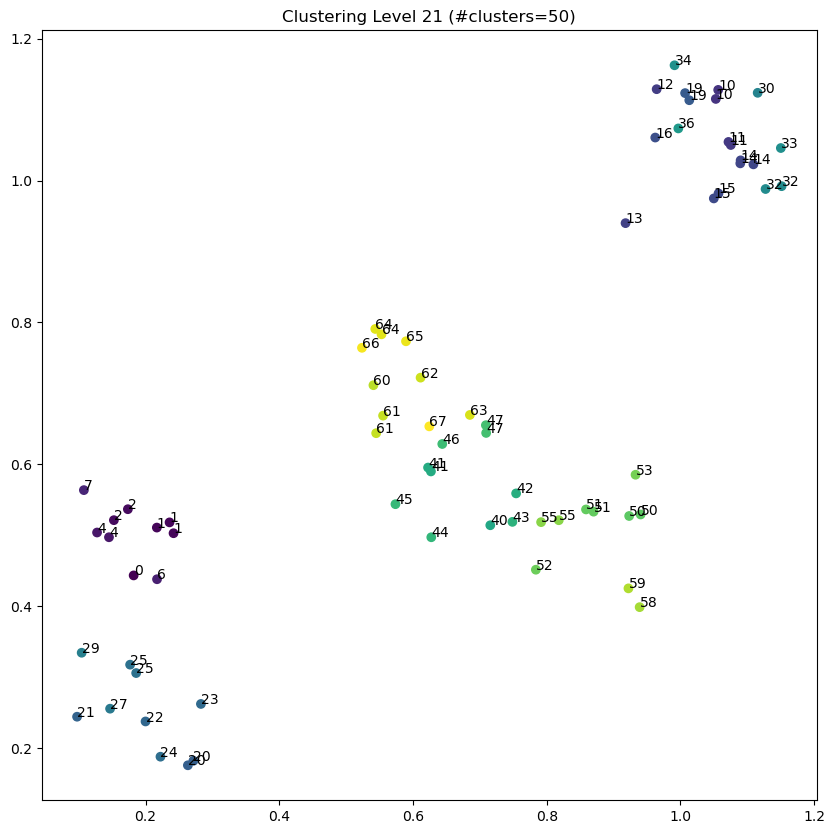

58.0 and 59.0 merged at distance 0.03132788007380651


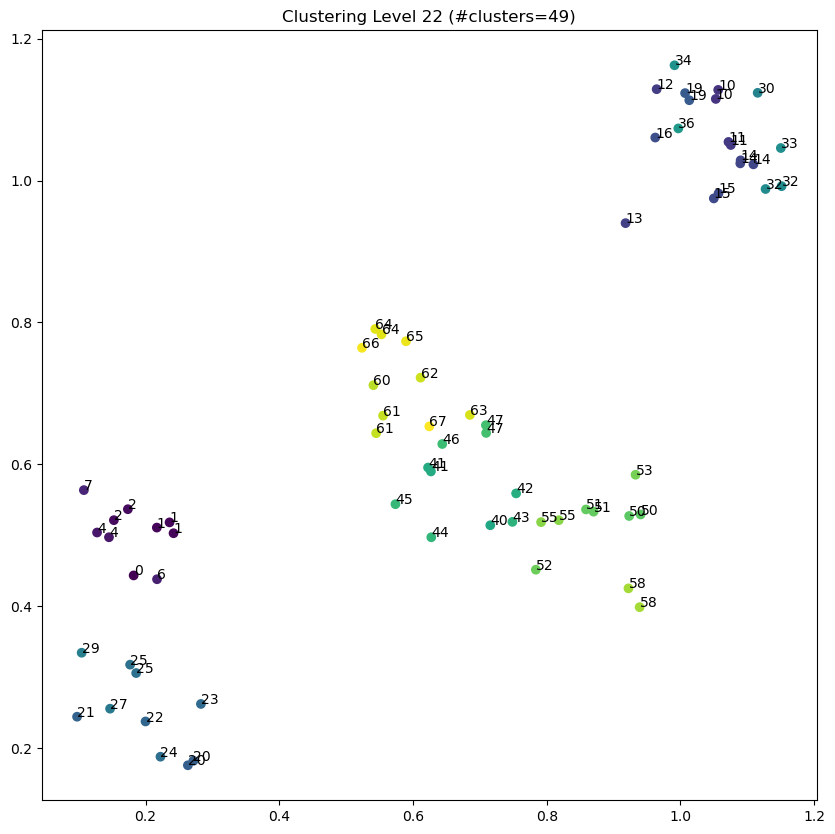

46.0 and 67.0 merged at distance 0.03150831002578277


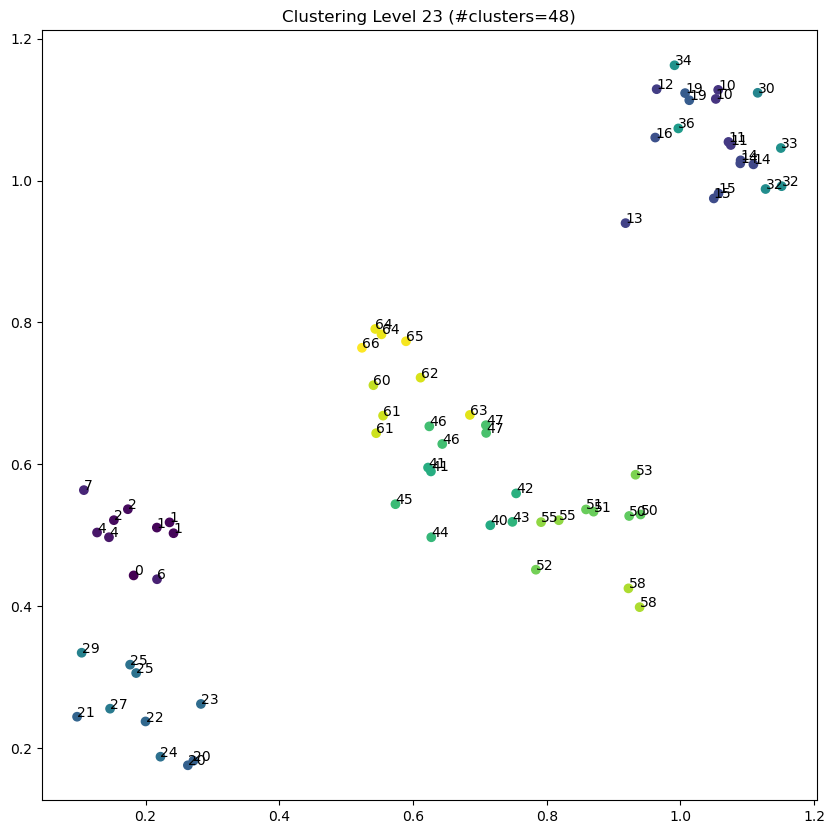

40.0 and 43.0 merged at distance 0.03342380322576321


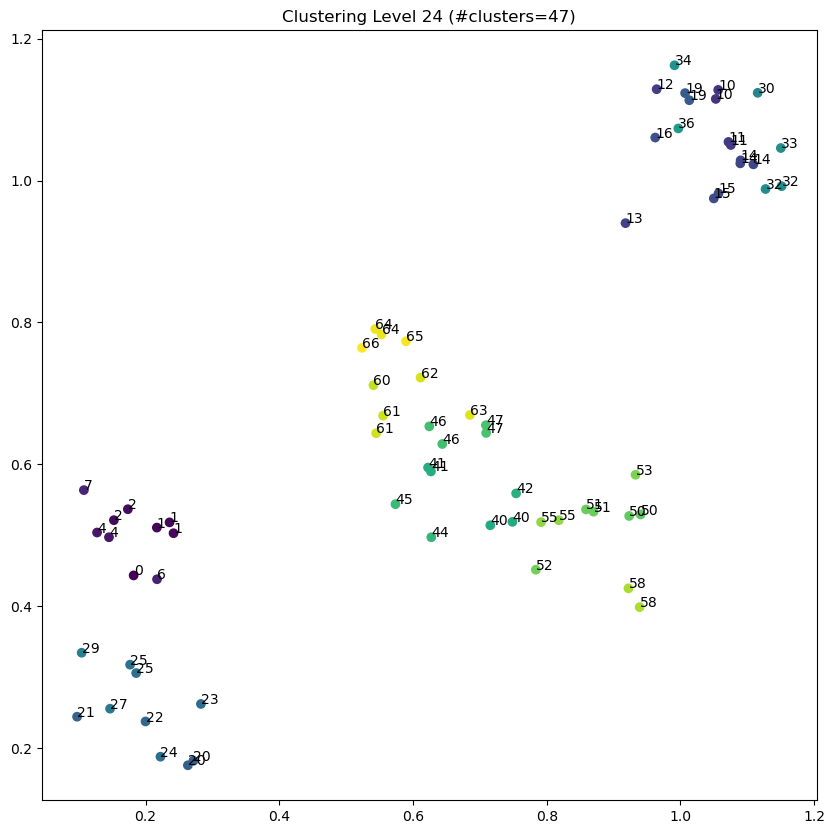

64.0 and 66.0 merged at distance 0.03488980108347763


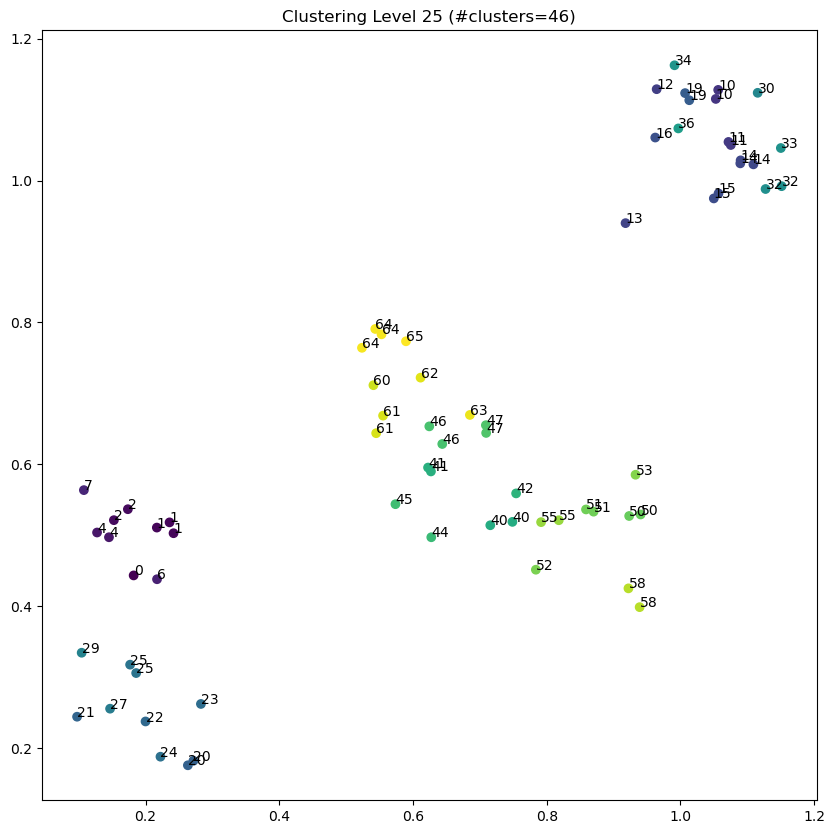

47.0 and 63.0 merged at distance 0.03511925572554327


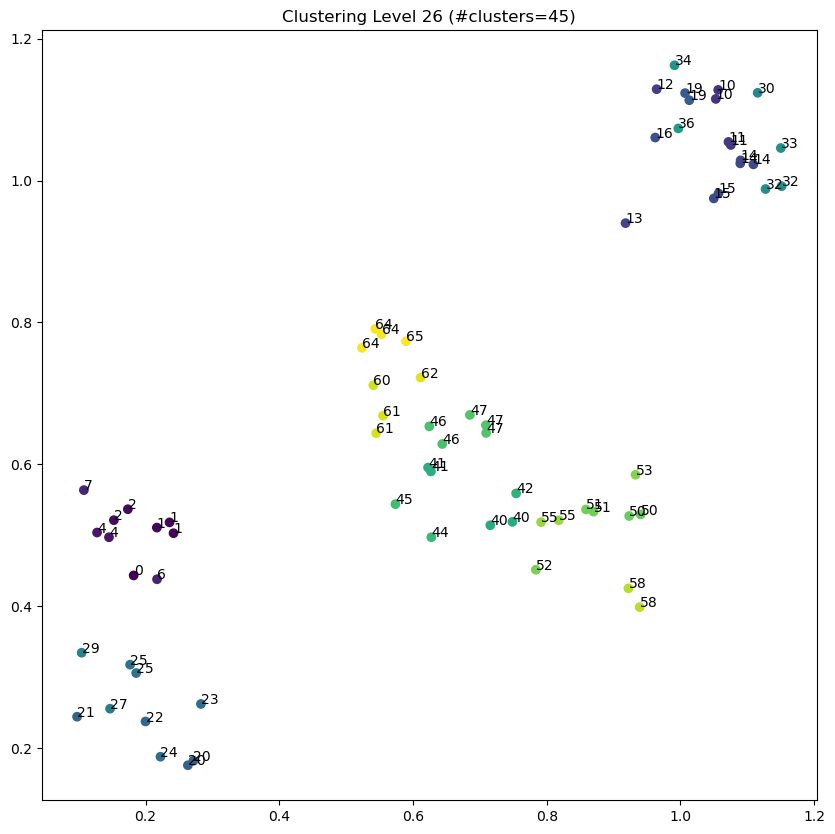

0.0 and 6.0 merged at distance 0.035386322866806916


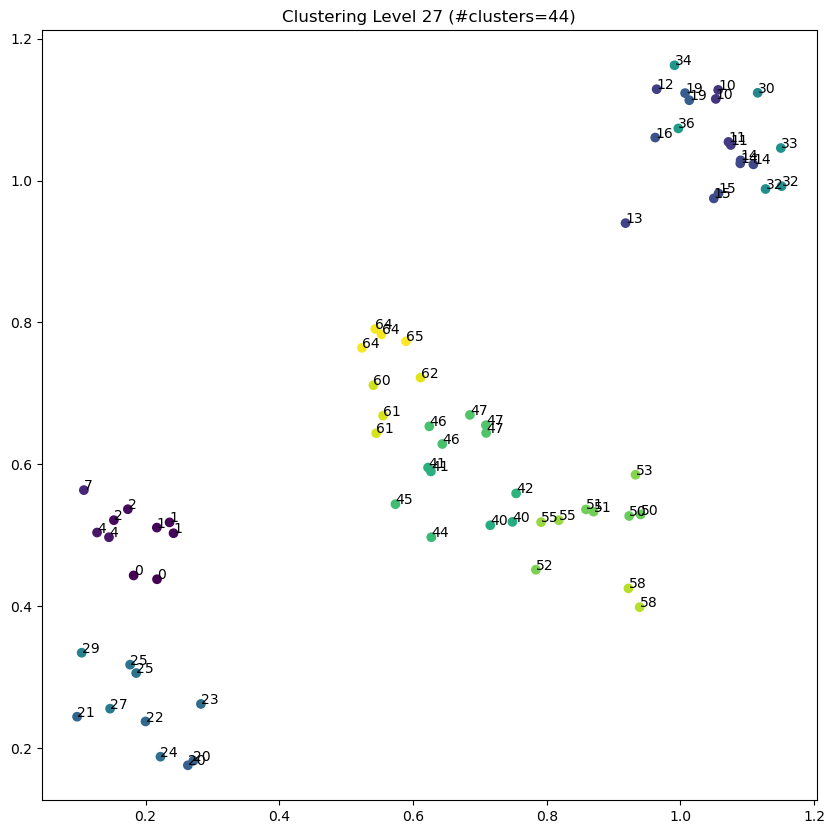

16.0 and 36.0 merged at distance 0.03682503678187284


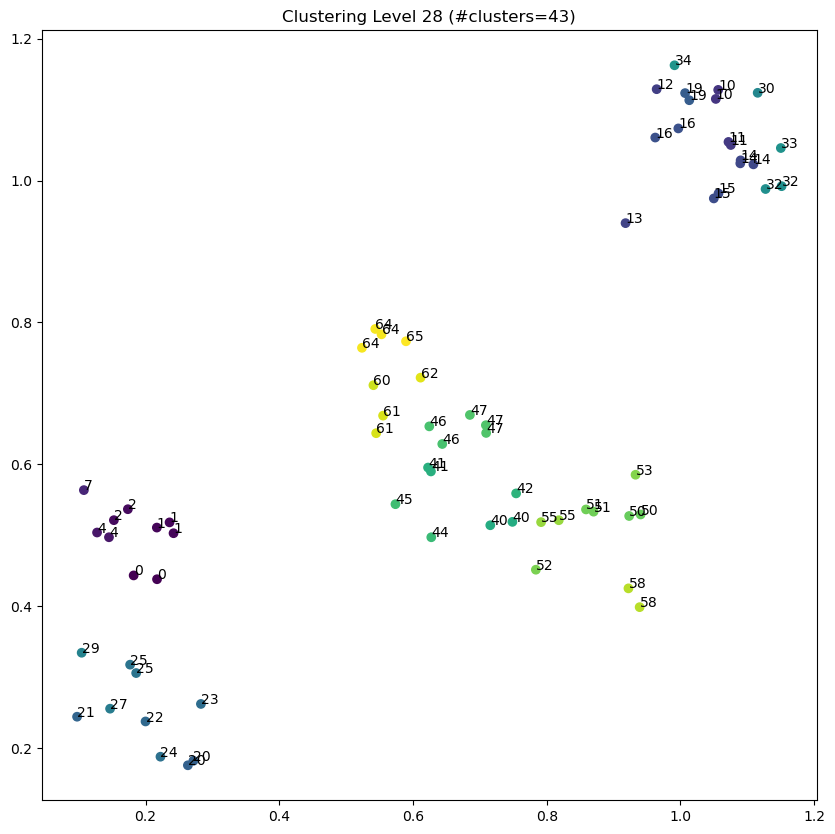

12.0 and 34.0 merged at distance 0.04301563975295778


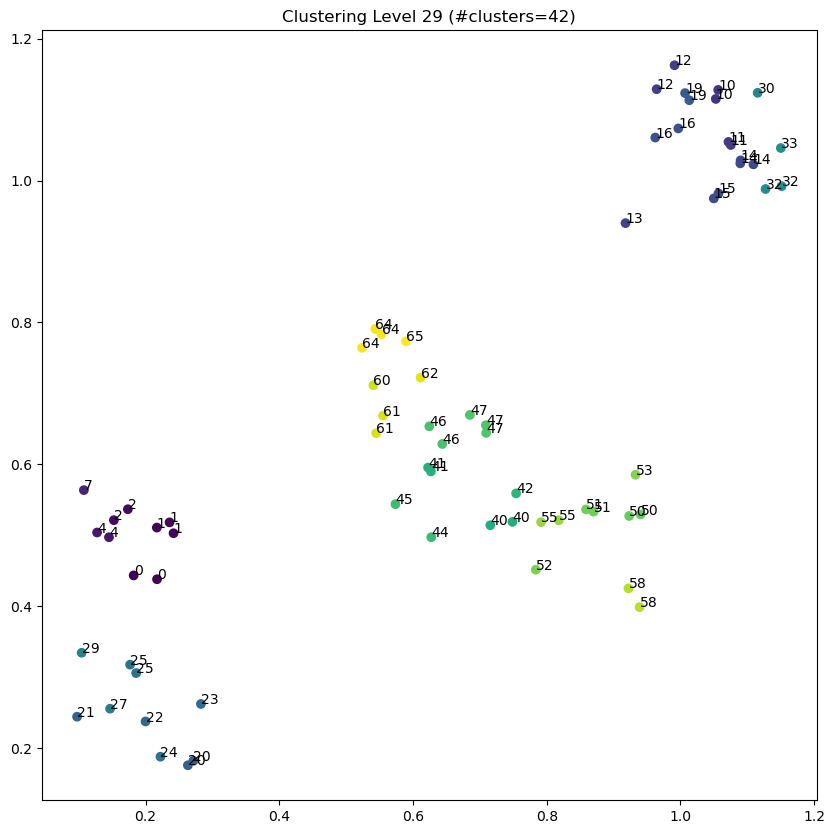

11.0 and 14.0 merged at distance 0.0488865534043868


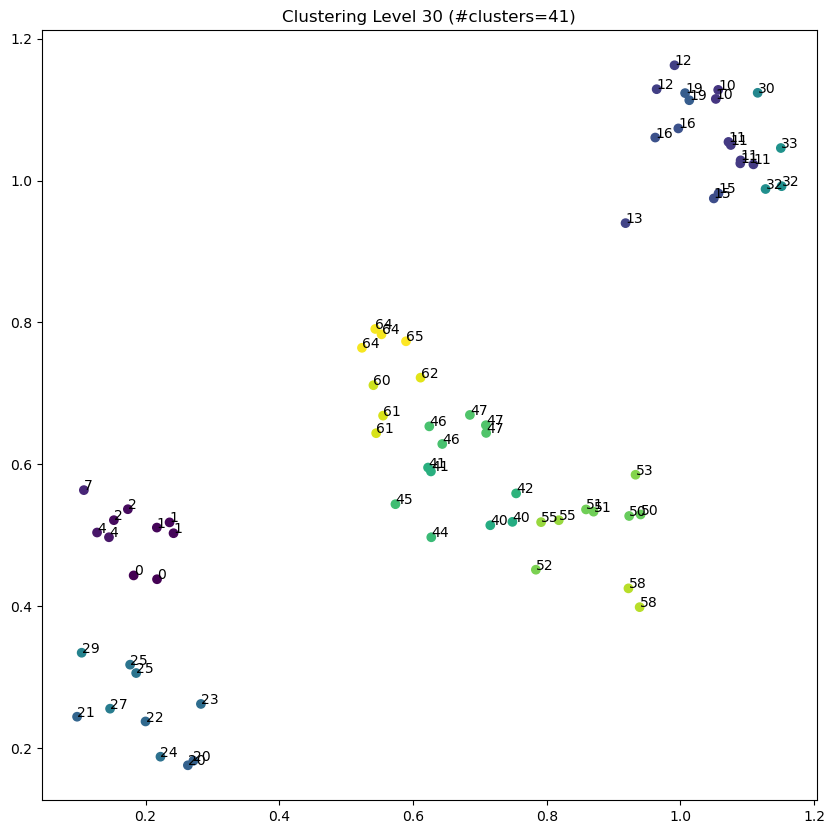

20.0 and 24.0 merged at distance 0.04964771548707457


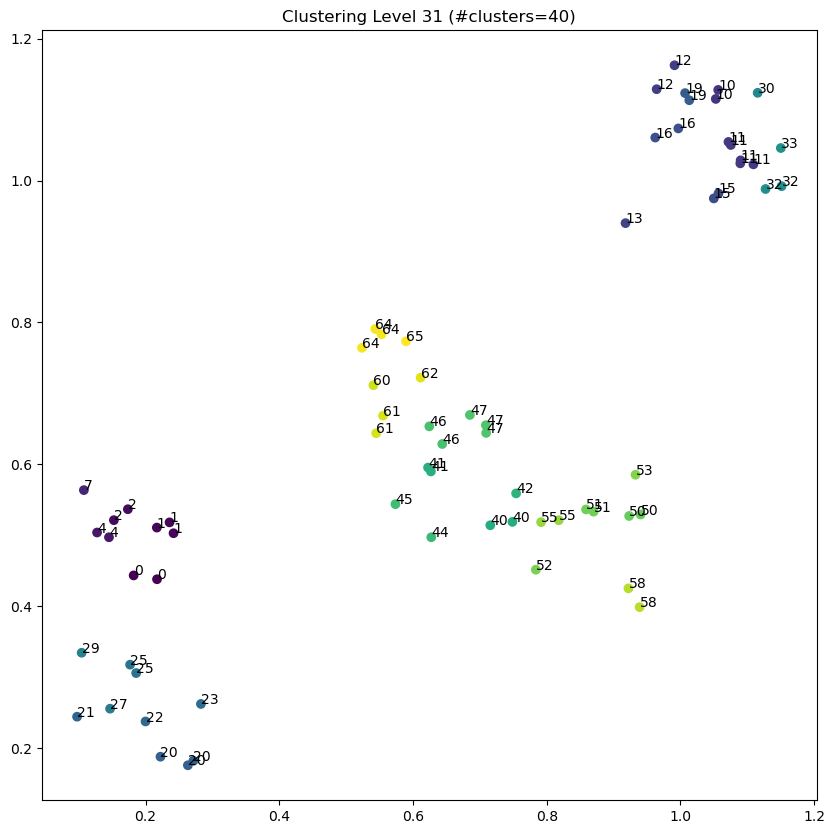

10.0 and 19.0 merged at distance 0.04969957068167389


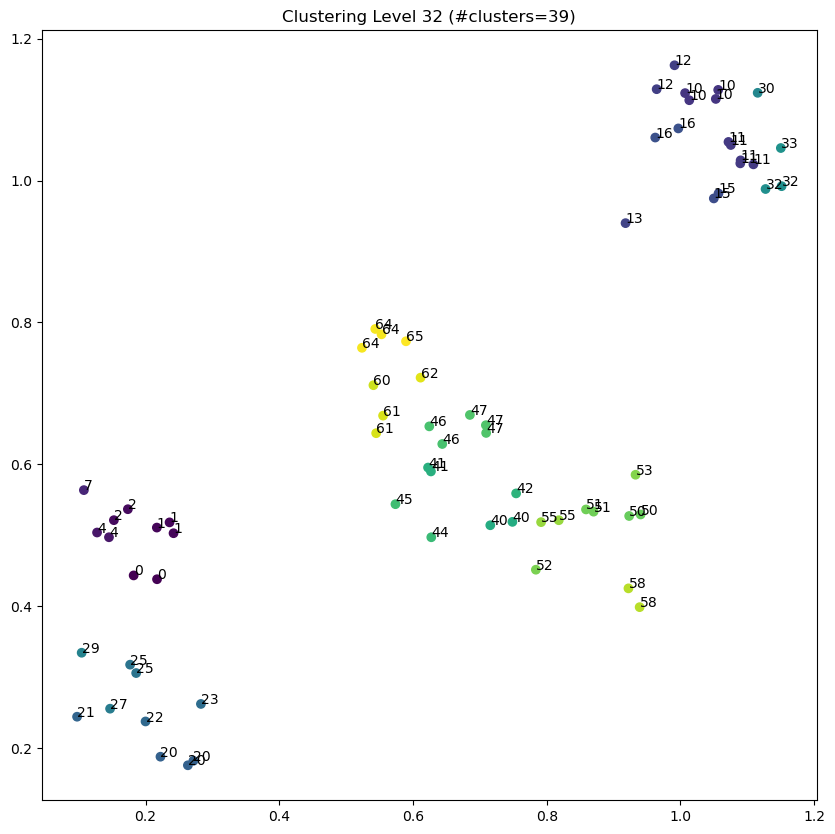

21.0 and 27.0 merged at distance 0.050652001798143116


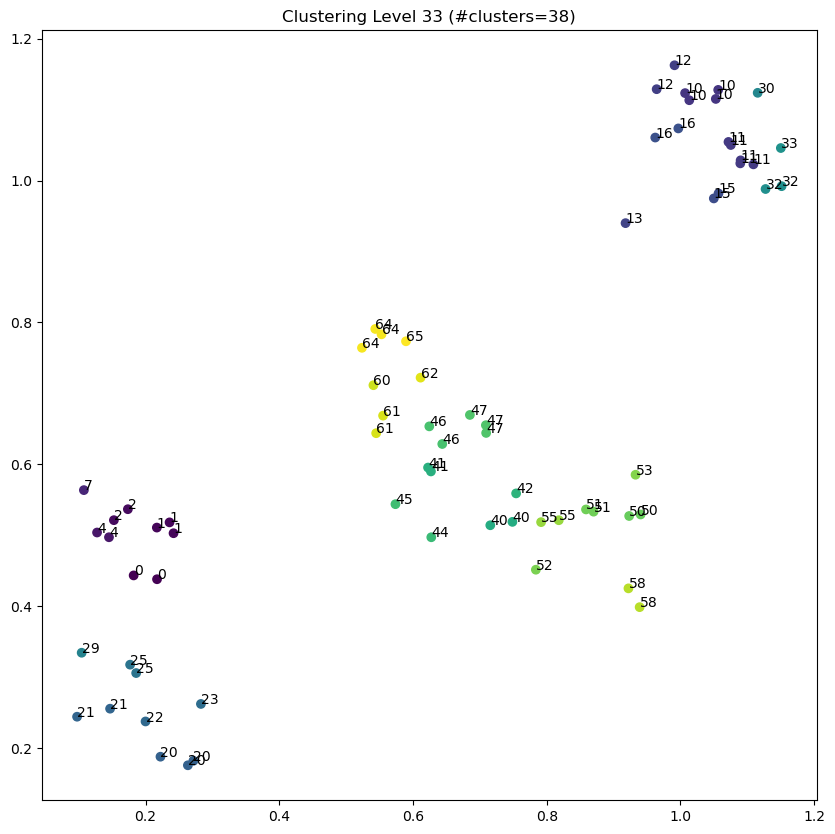

62.0 and 65.0 merged at distance 0.05569528170732298


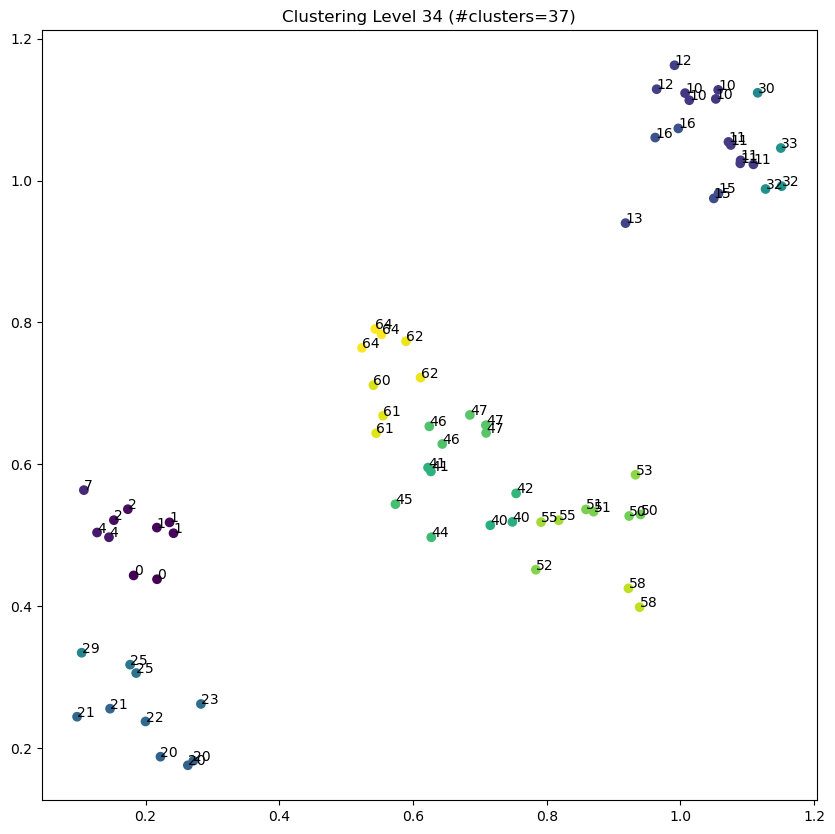

2.0 and 4.0 merged at distance 0.05660198637302988


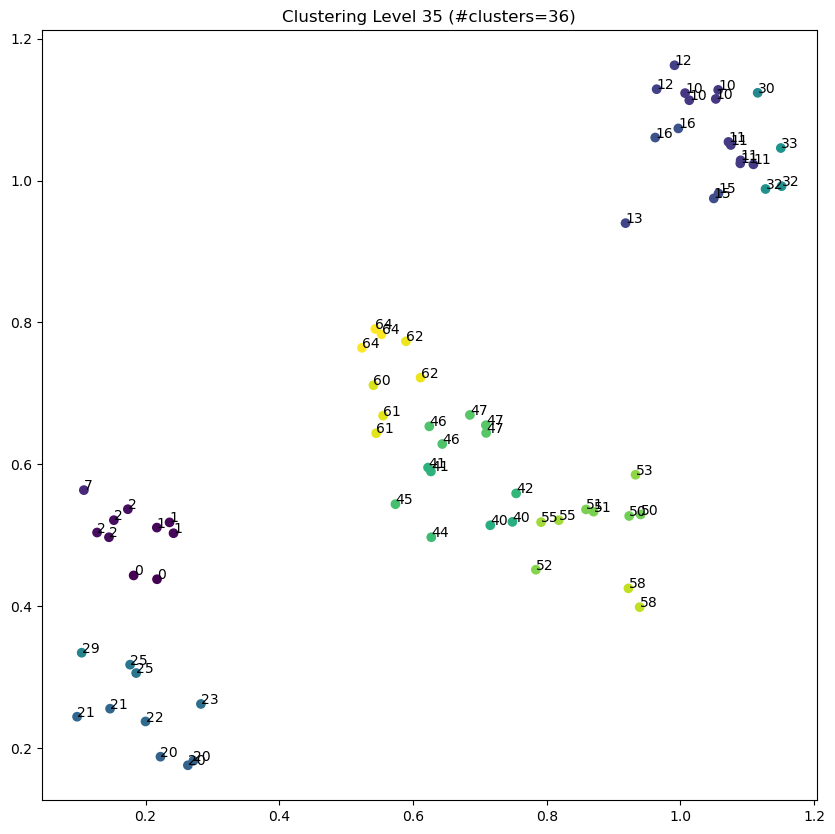

50.0 and 53.0 merged at distance 0.058896291959354634


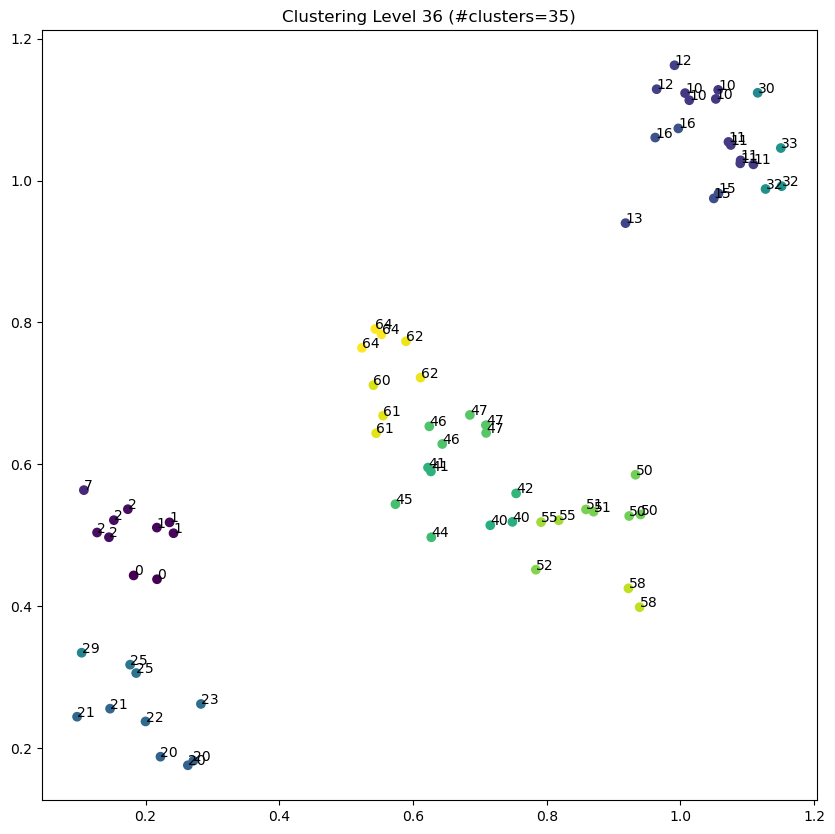

40.0 and 42.0 merged at distance 0.059229428060176156


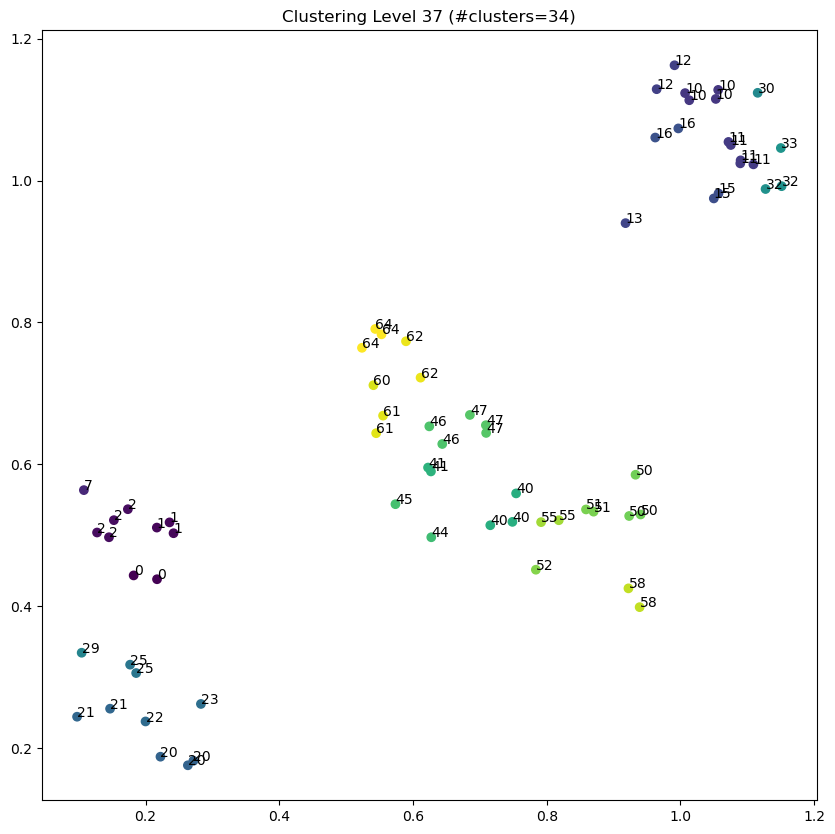

32.0 and 33.0 merged at distance 0.06212547474962373


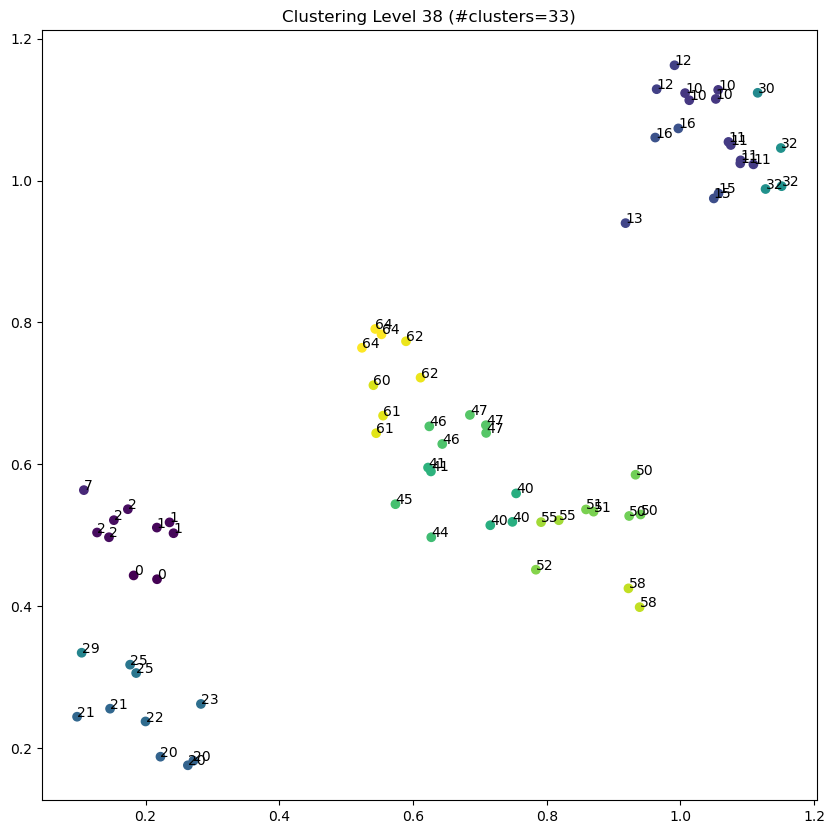

41.0 and 46.0 merged at distance 0.0635661060692978


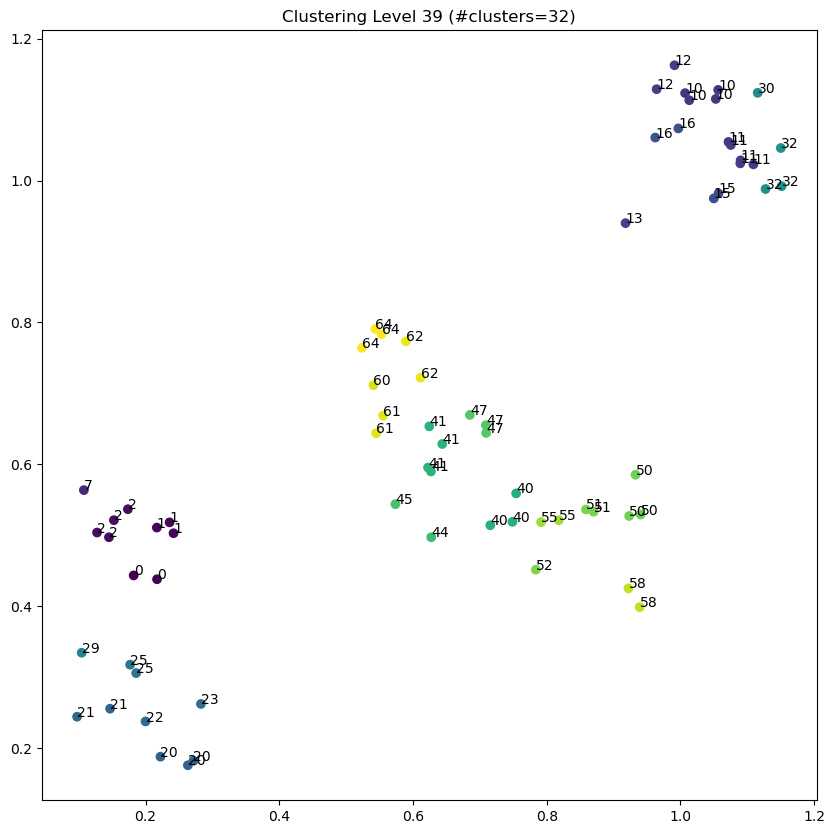

60.0 and 61.0 merged at distance 0.06776423142251929


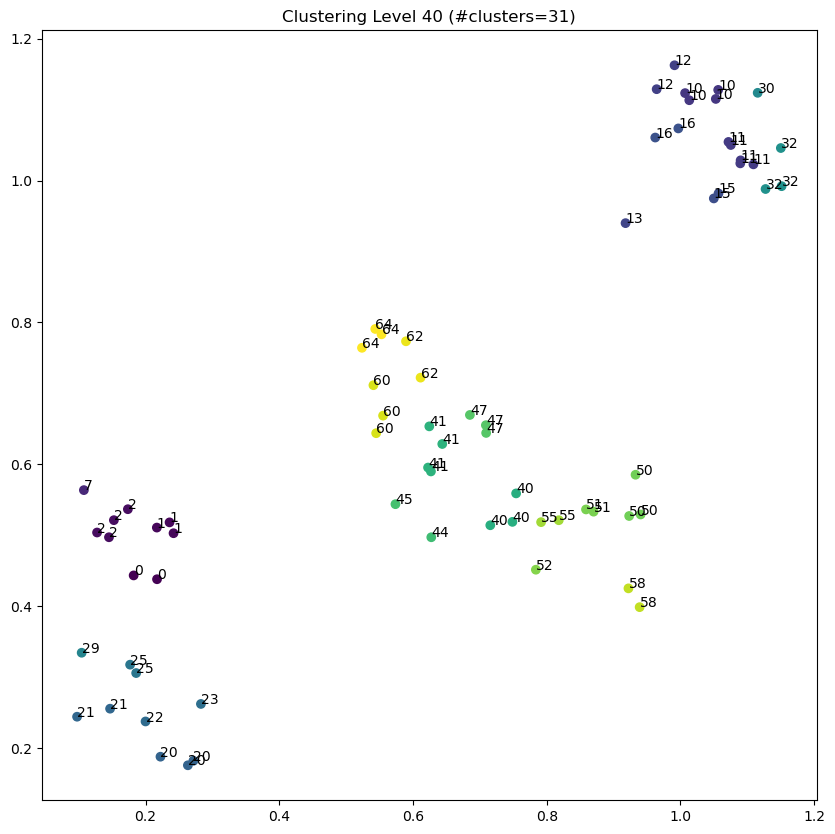

44.0 and 45.0 merged at distance 0.07103669962655589


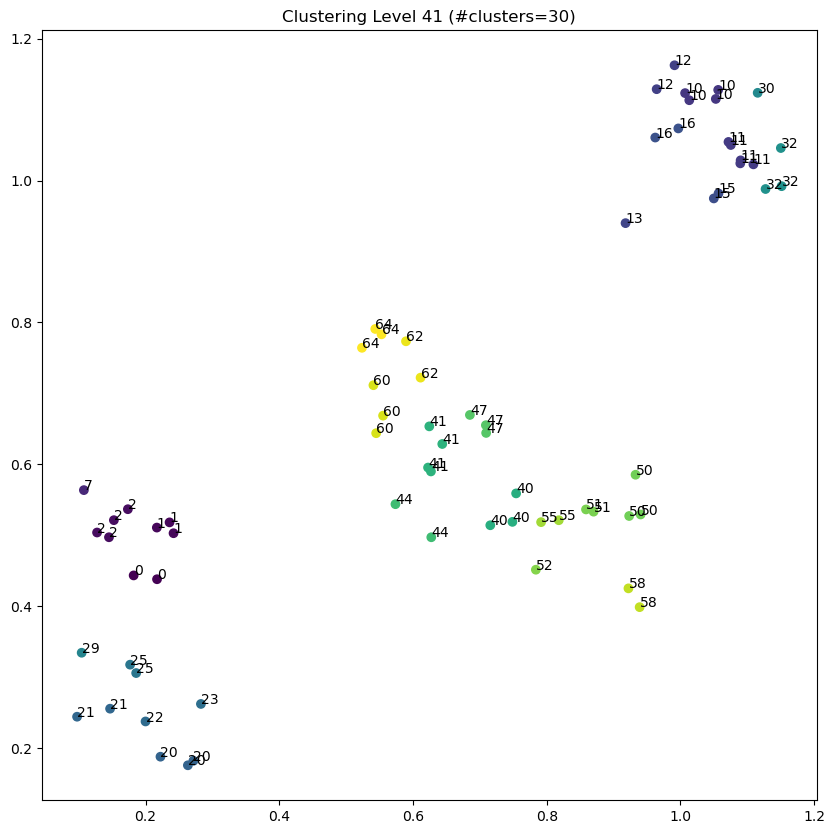

2.0 and 7.0 merged at distance 0.07629634788498277


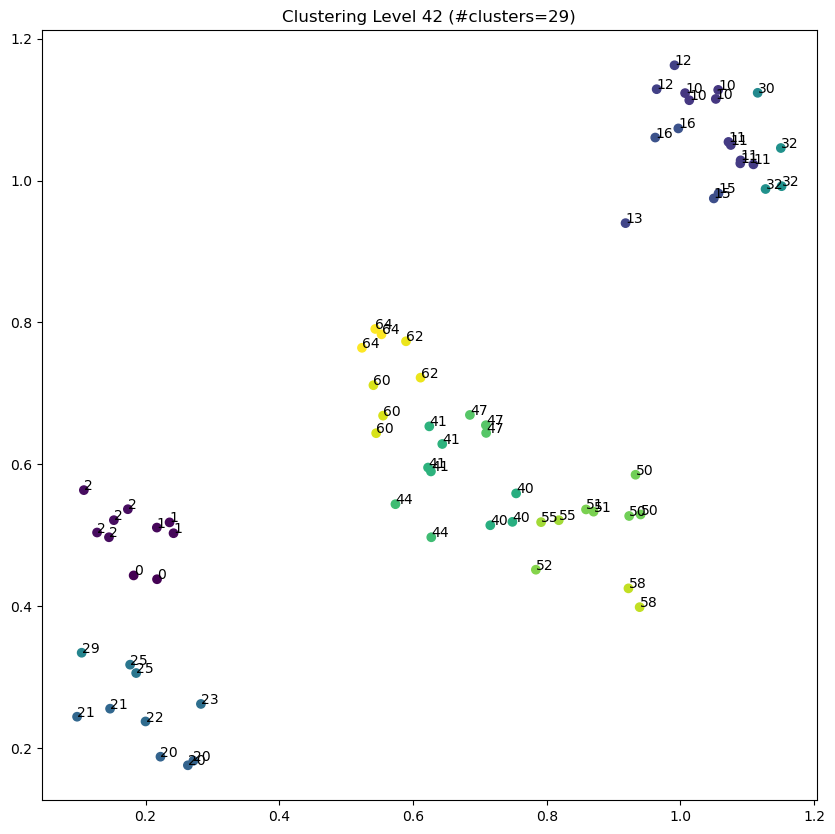

52.0 and 55.0 merged at distance 0.07773337200796218


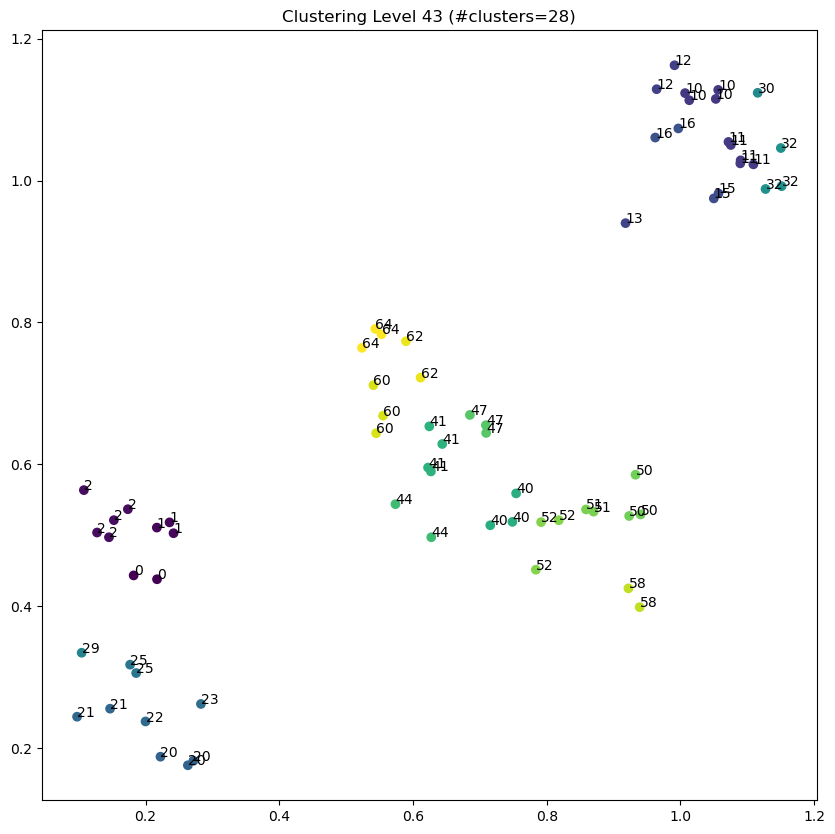

11.0 and 15.0 merged at distance 0.08258183291540998


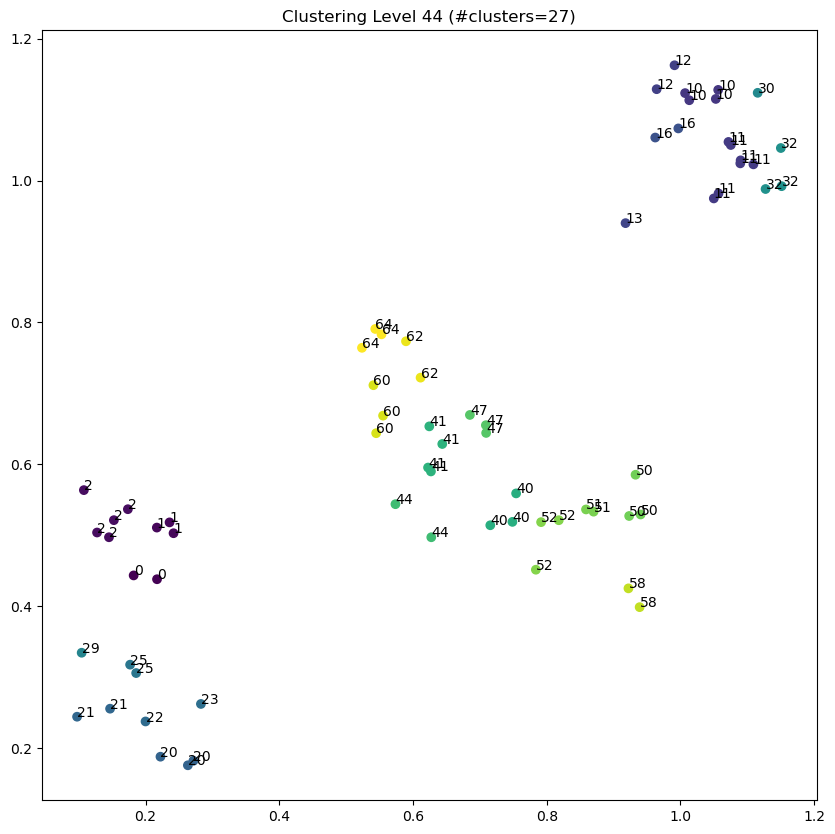

22.0 and 25.0 merged at distance 0.08329137066789602


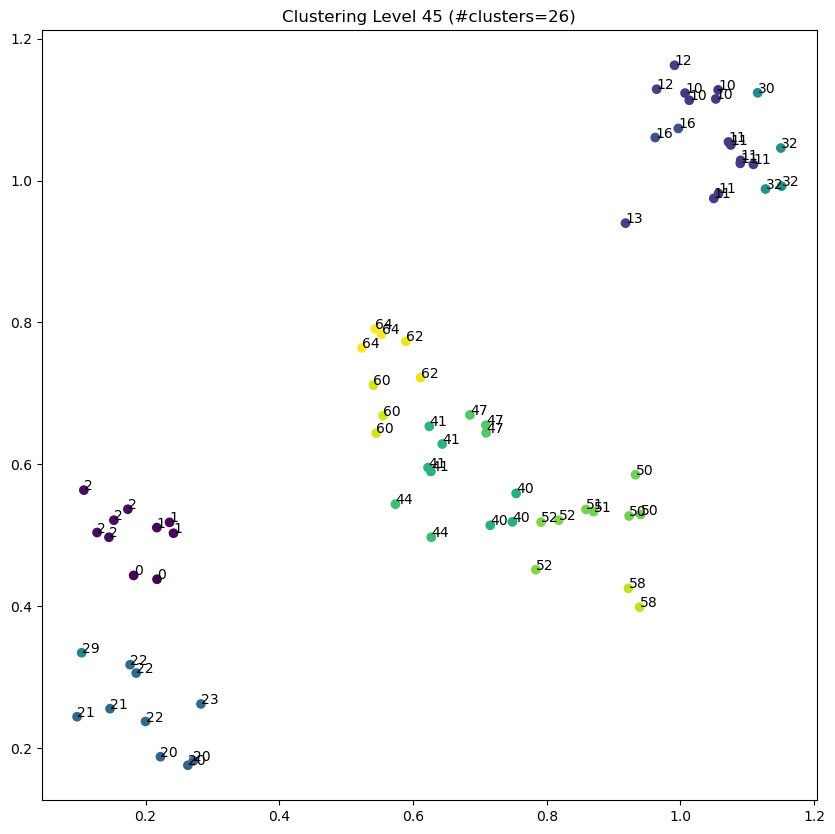

50.0 and 51.0 merged at distance 0.08876153103803167


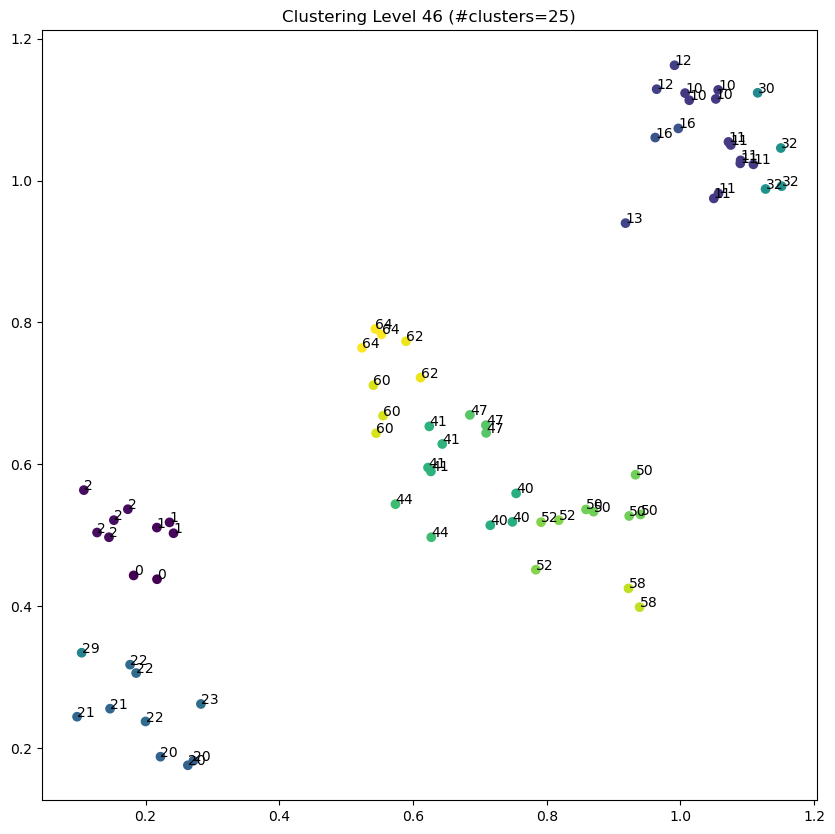

21.0 and 29.0 merged at distance 0.09042909396426559


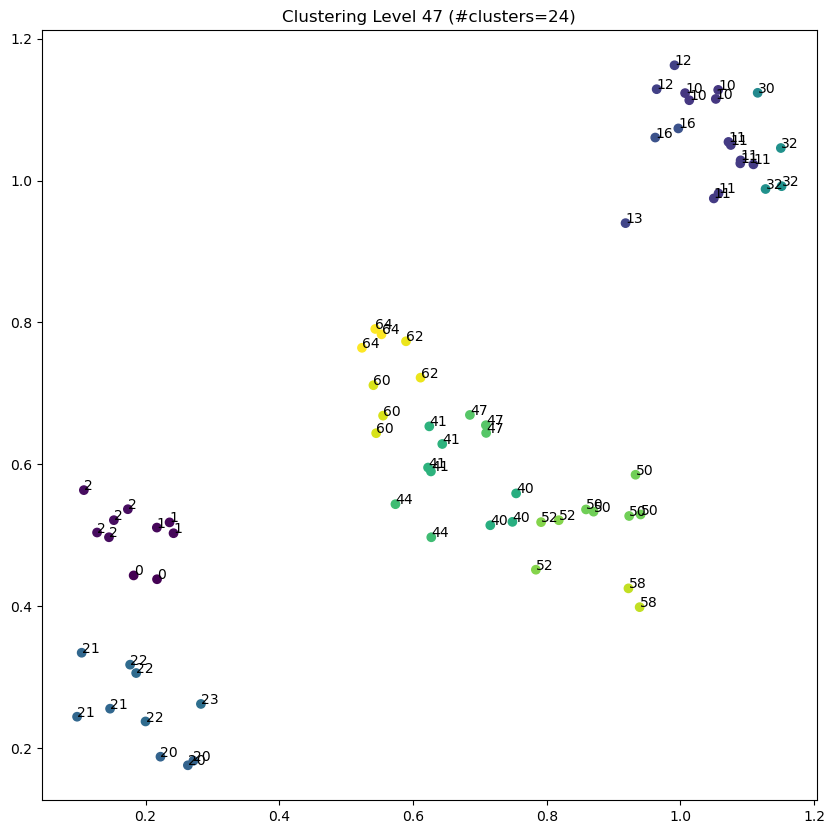

10.0 and 12.0 merged at distance 0.09203300531185793


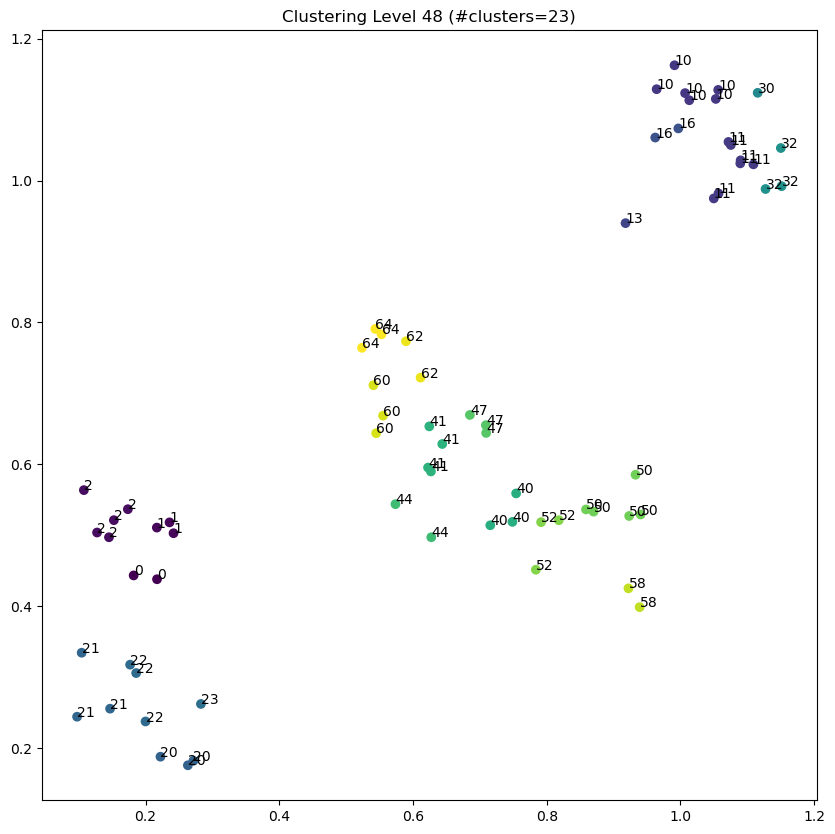

0.0 and 1.0 merged at distance 0.09205236190927256


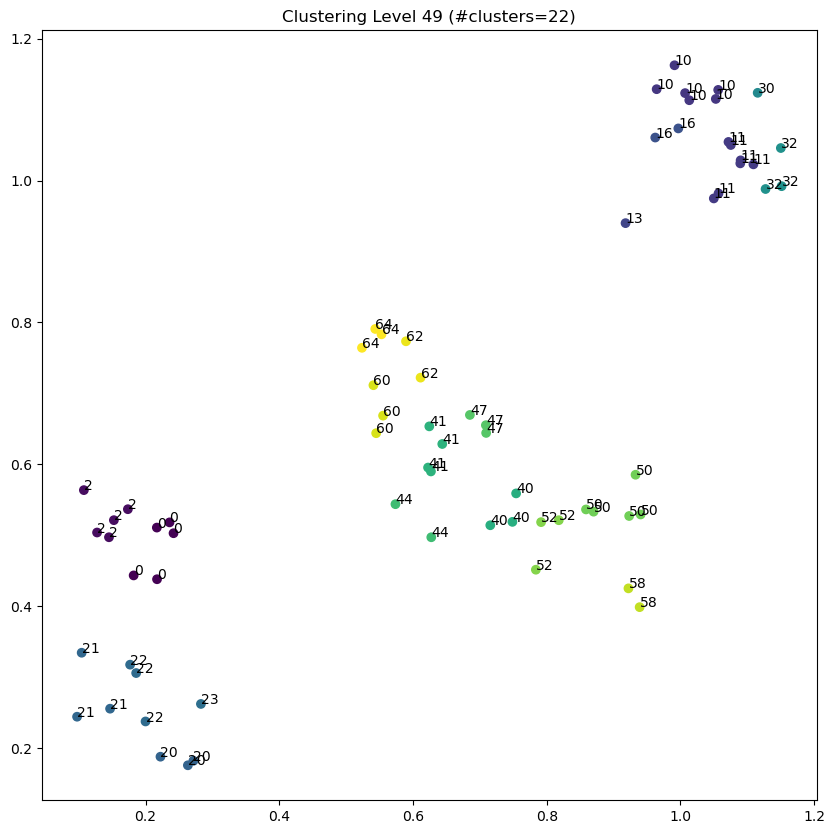

20.0 and 23.0 merged at distance 0.0958570449965821


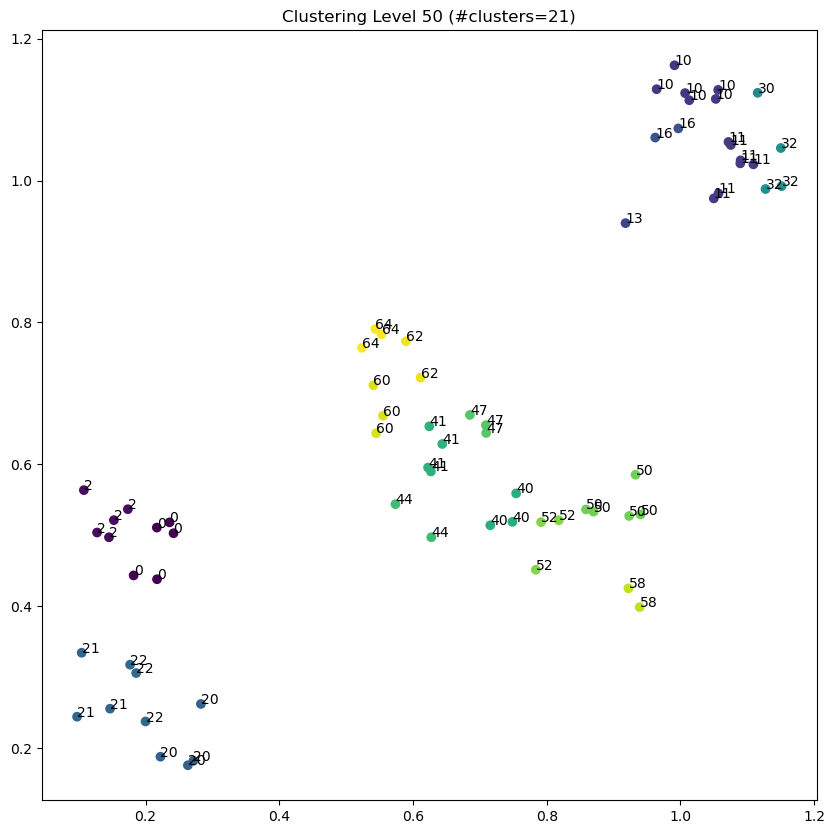

62.0 and 64.0 merged at distance 0.09720590807061001


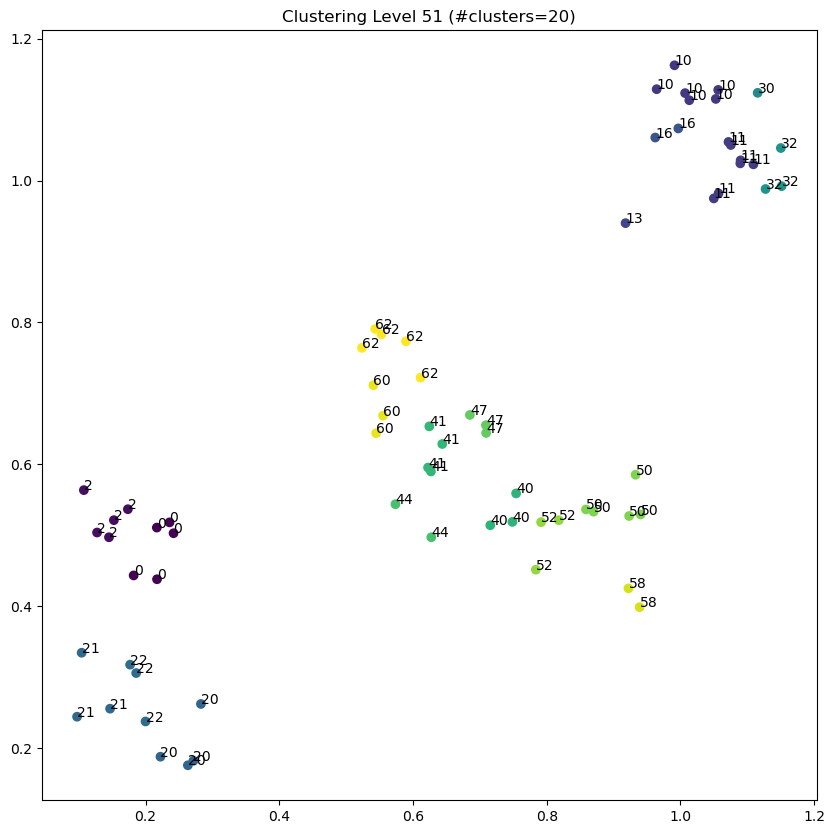

41.0 and 47.0 merged at distance 0.10509501185337371


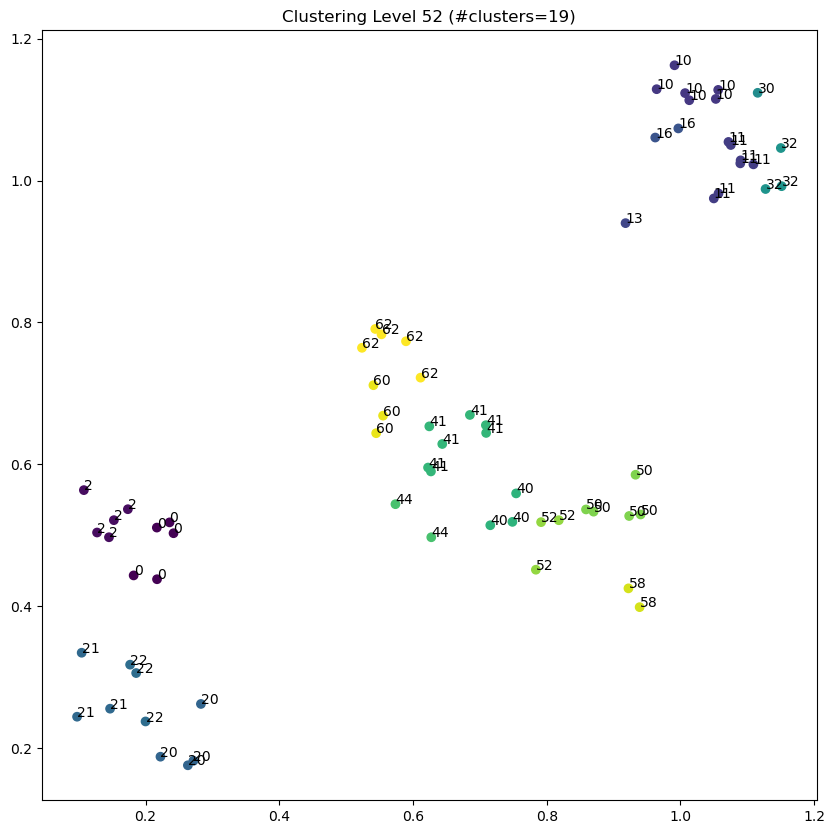

40.0 and 52.0 merged at distance 0.11154394525708665


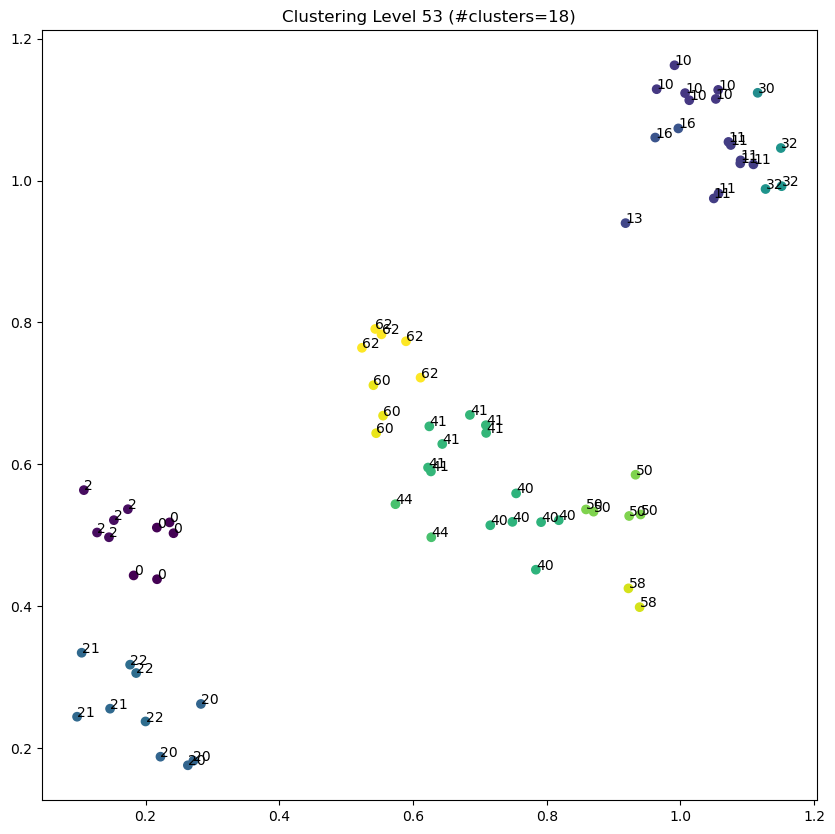

10.0 and 16.0 merged at distance 0.11563050647333138


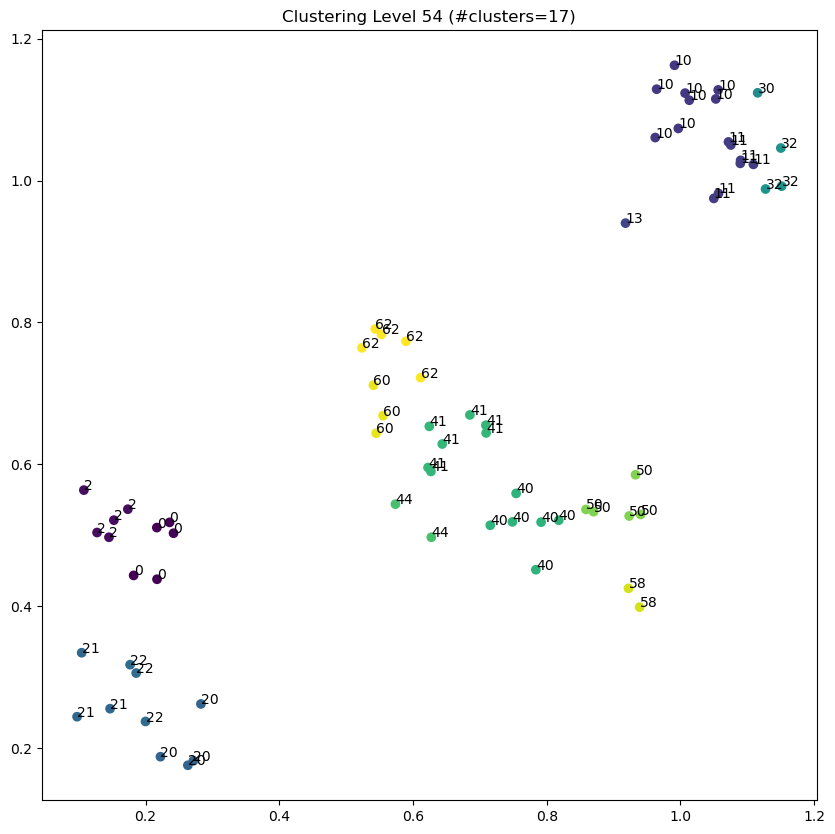

11.0 and 32.0 merged at distance 0.12286944144229232


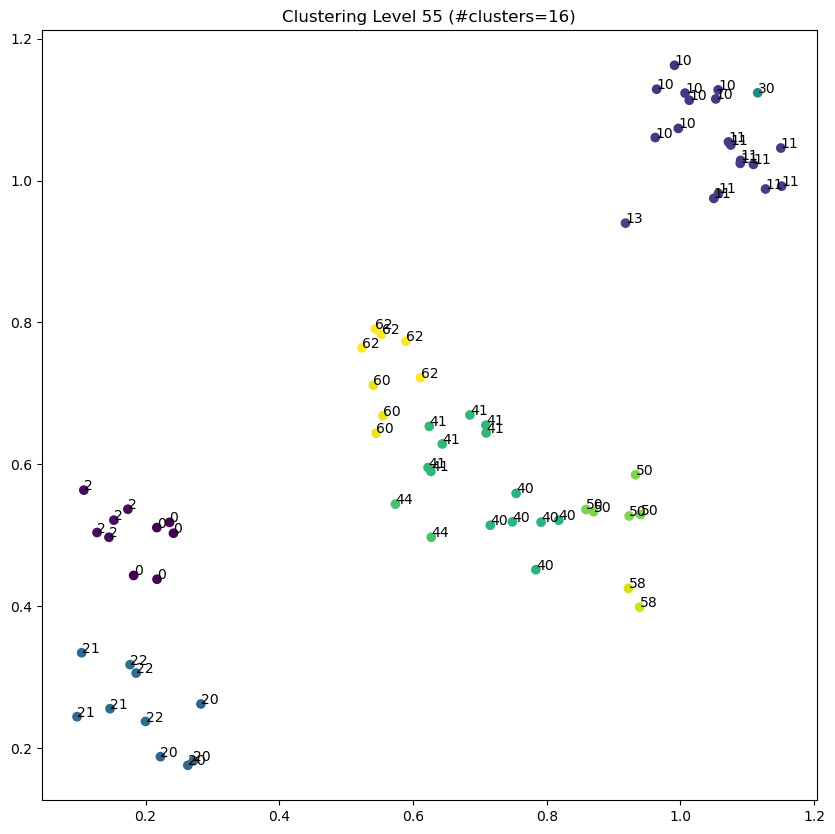

21.0 and 22.0 merged at distance 0.13603040414427311


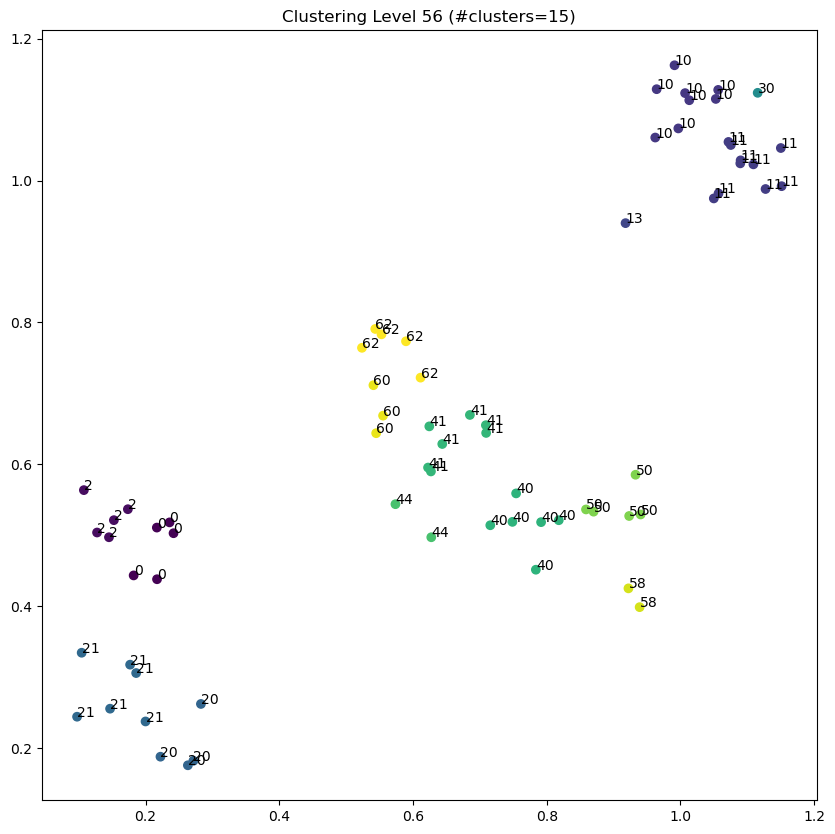

60.0 and 62.0 merged at distance 0.14693359706339224


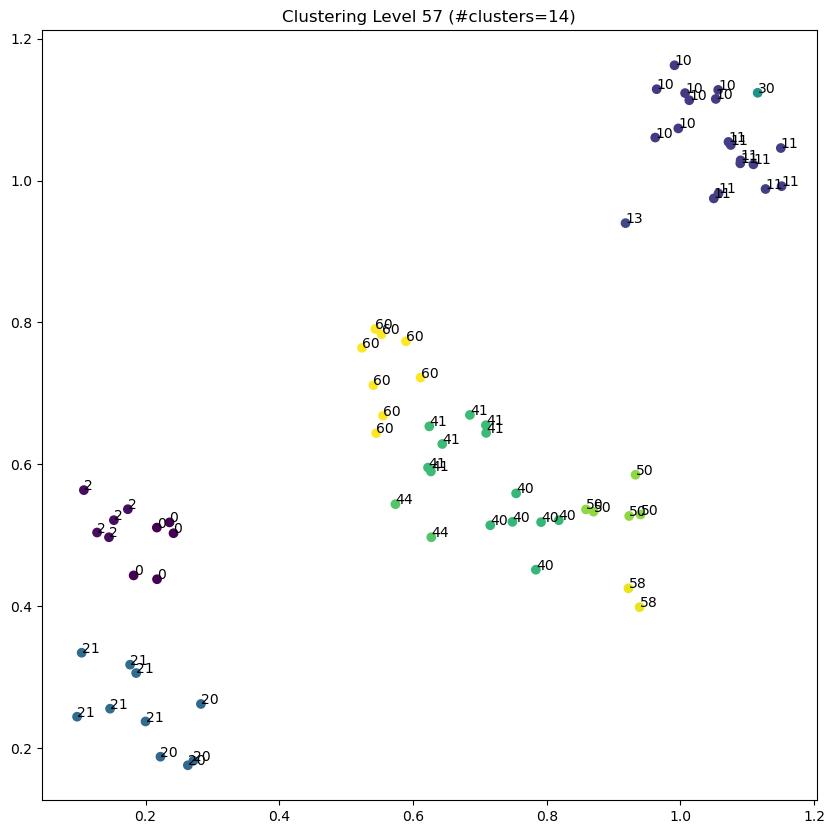

11.0 and 30.0 merged at distance 0.16267075320918653


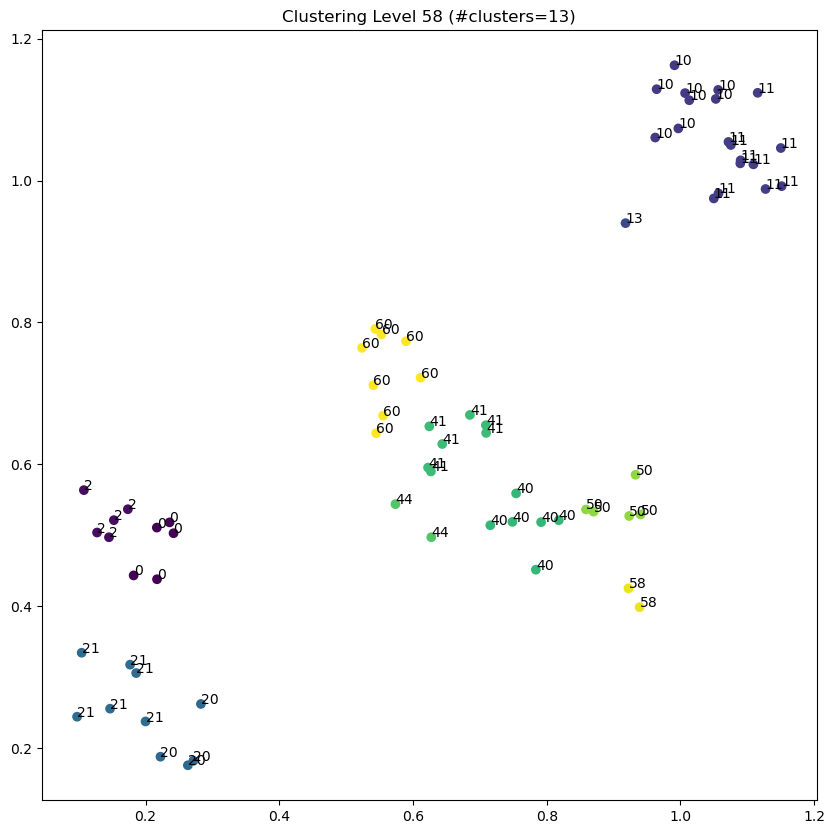

0.0 and 2.0 merged at distance 0.16656230519029308


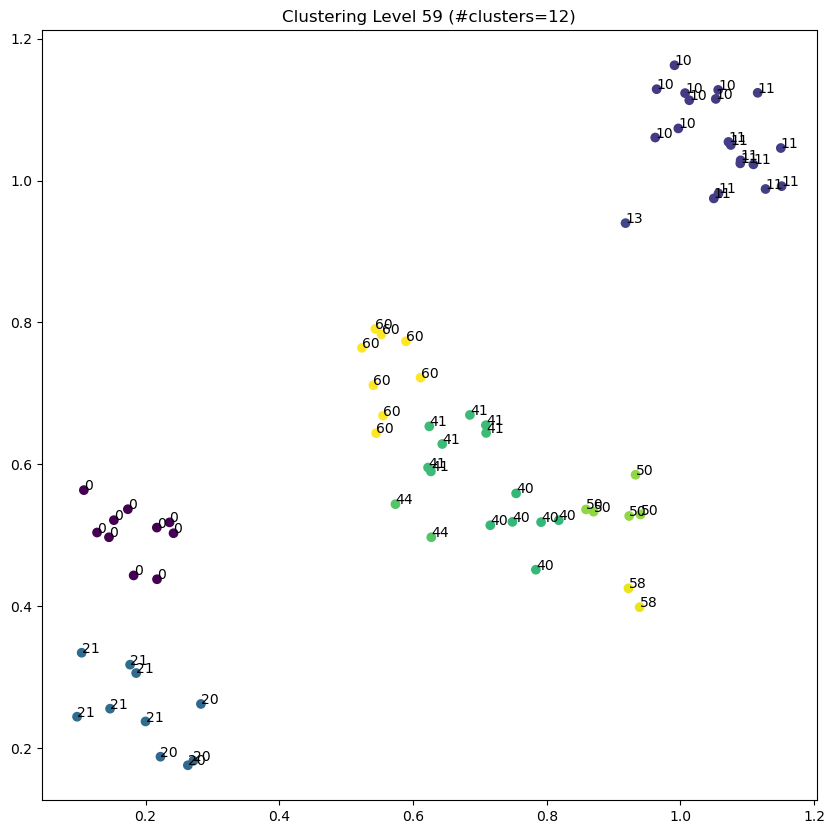

41.0 and 44.0 merged at distance 0.1818148968956061


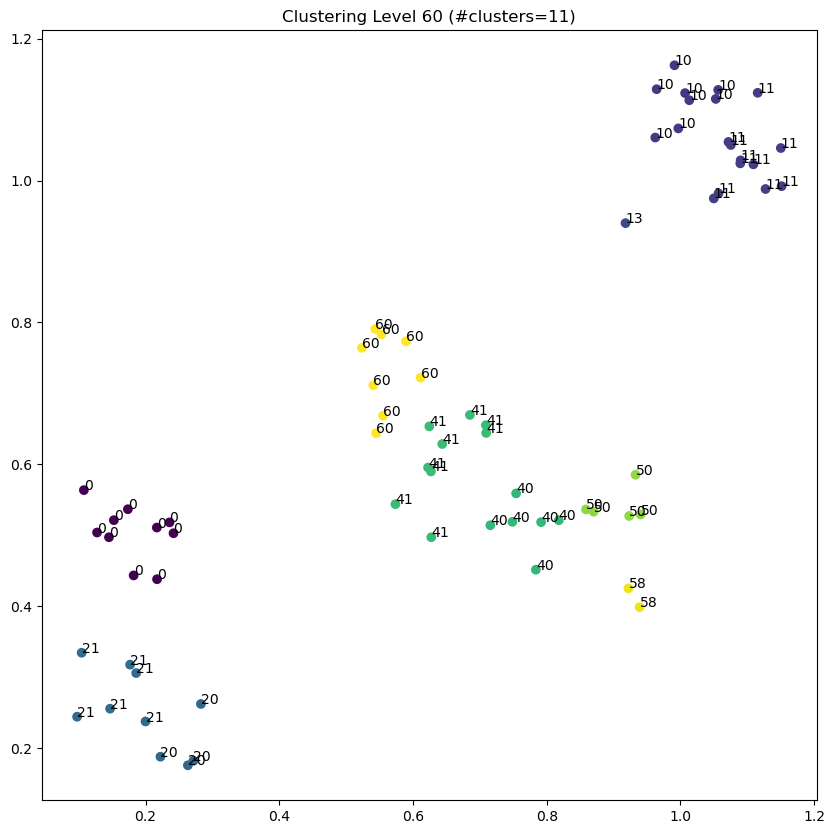

50.0 and 58.0 merged at distance 0.1866997765552237


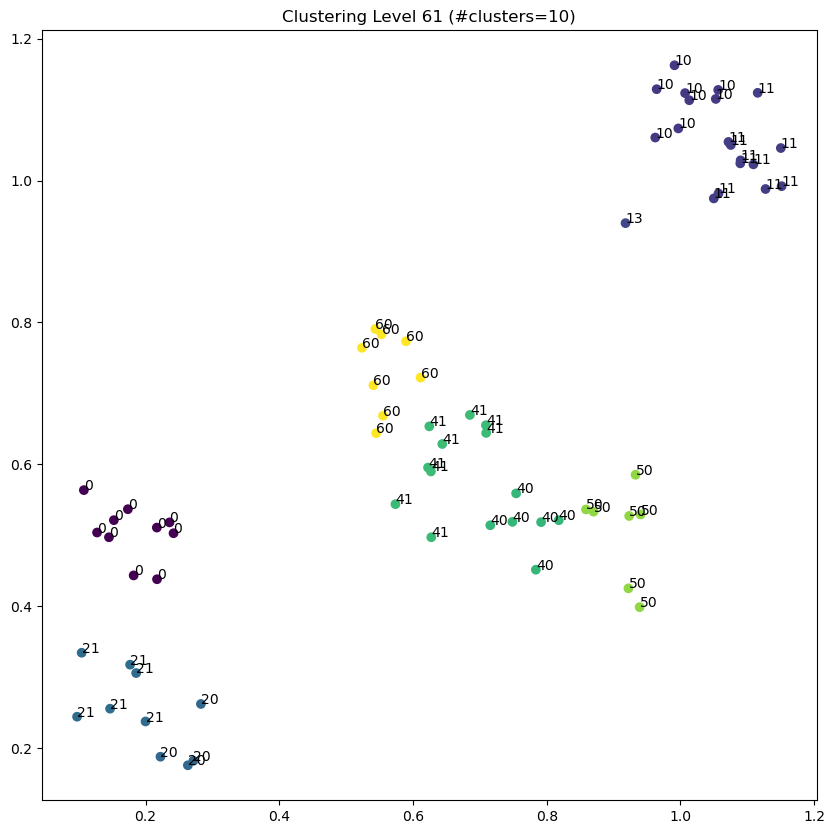

20.0 and 21.0 merged at distance 0.22611679390799033


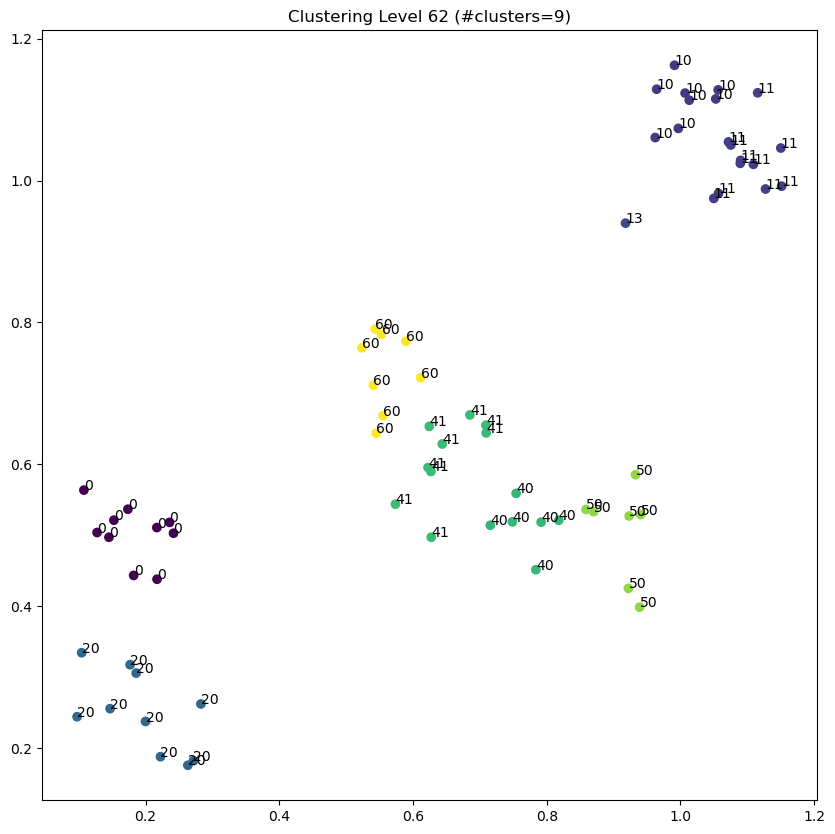

10.0 and 11.0 merged at distance 0.23385482435380978


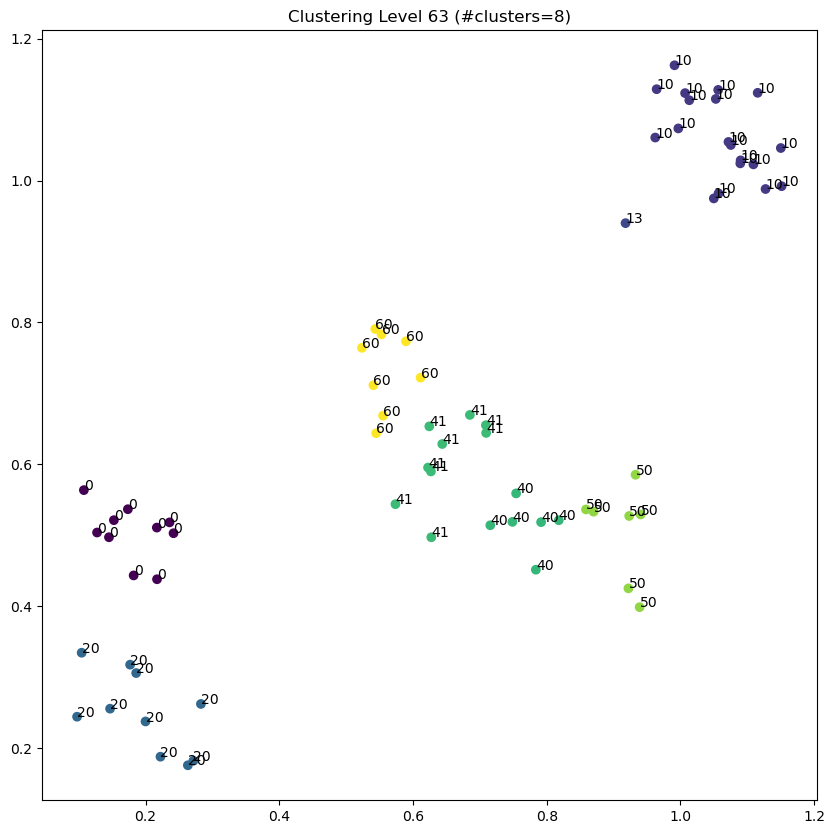

40.0 and 50.0 merged at distance 0.2514394900658616


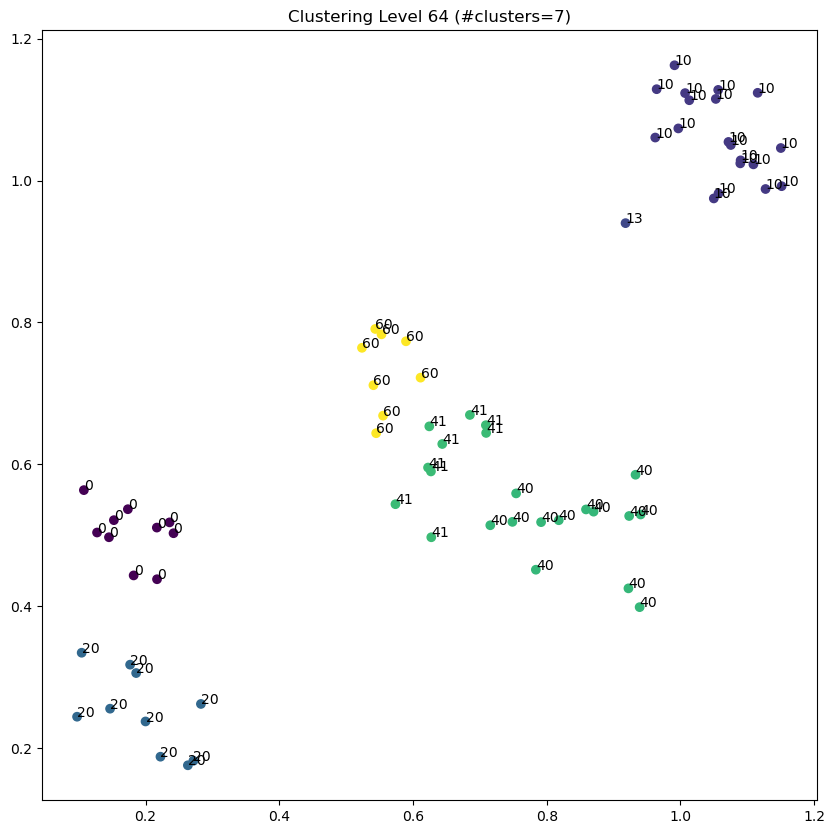

10.0 and 13.0 merged at distance 0.26981661216849884


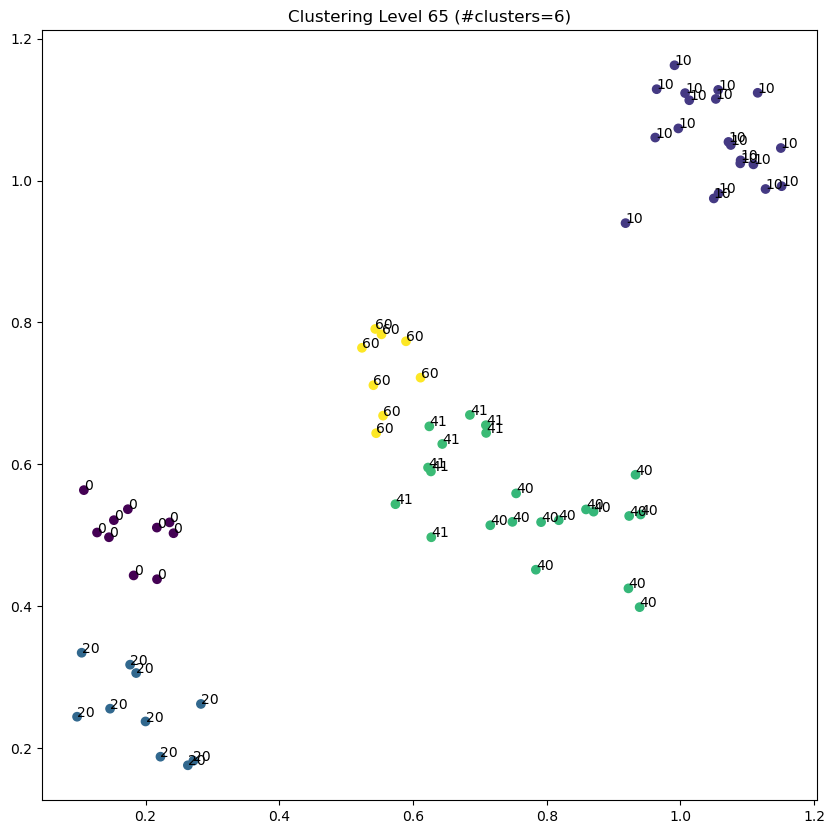

41.0 and 60.0 merged at distance 0.3053092062190425


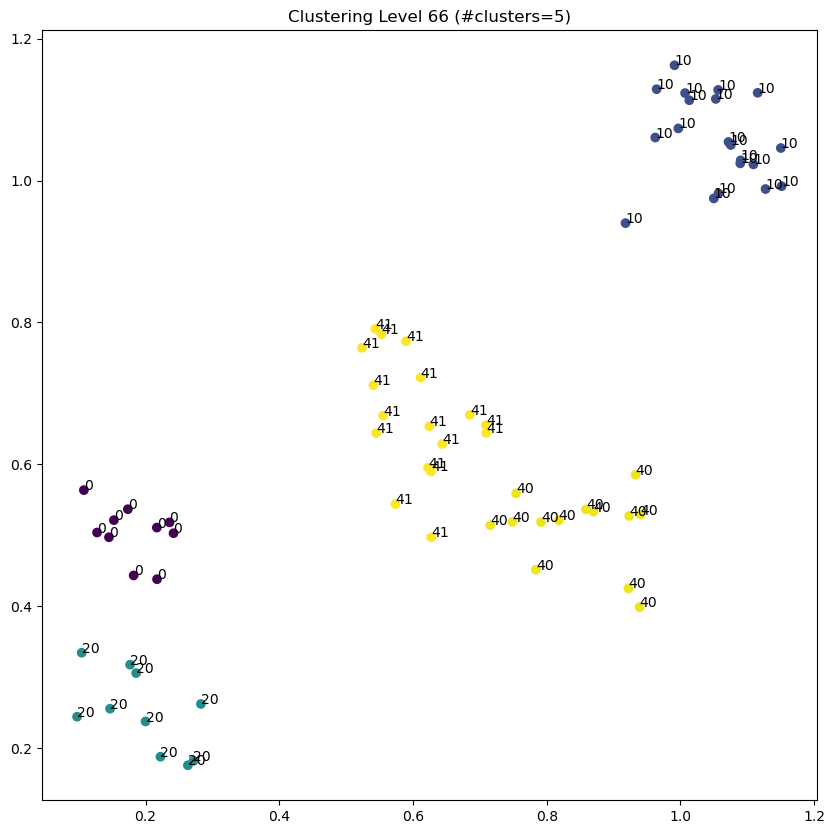

0.0 and 20.0 merged at distance 0.4178436770301993


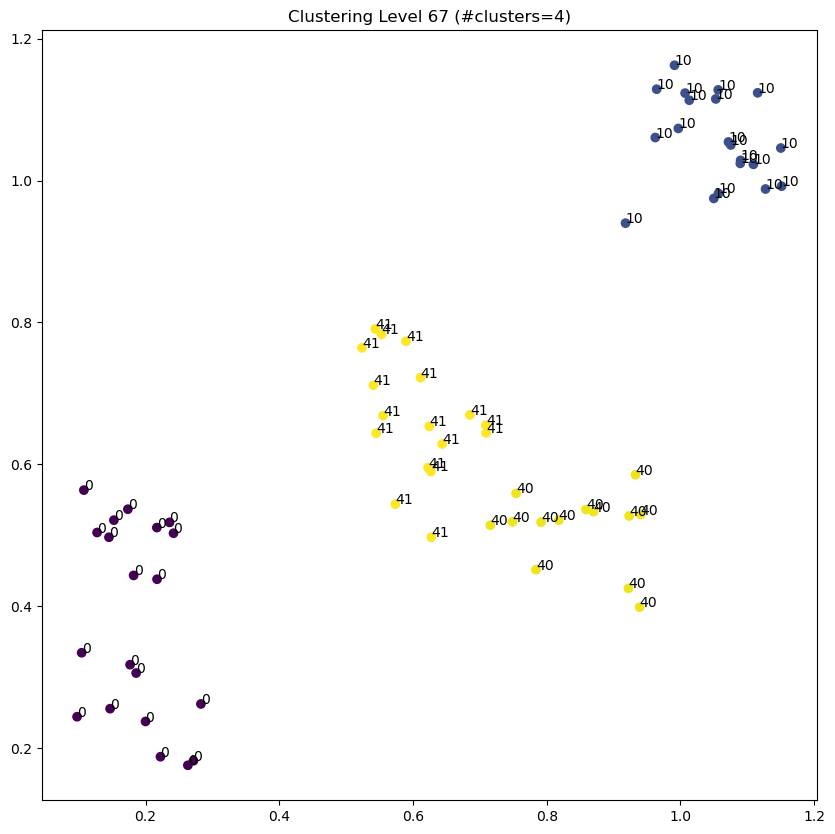

40.0 and 41.0 merged at distance 0.5568485756747027


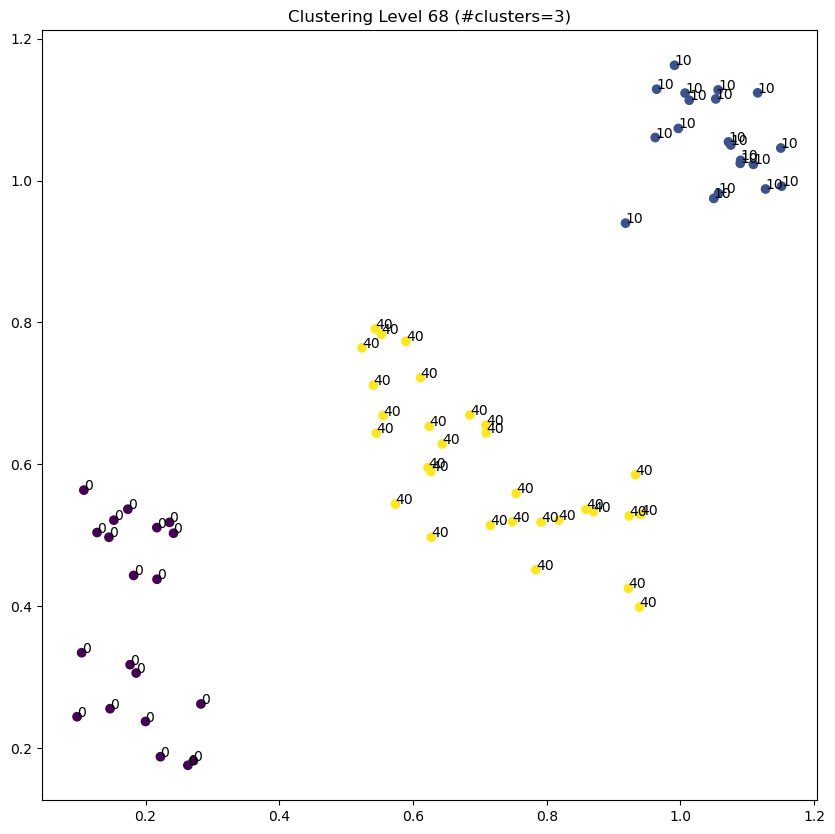

10.0 and 40.0 merged at distance 0.7941873858640042


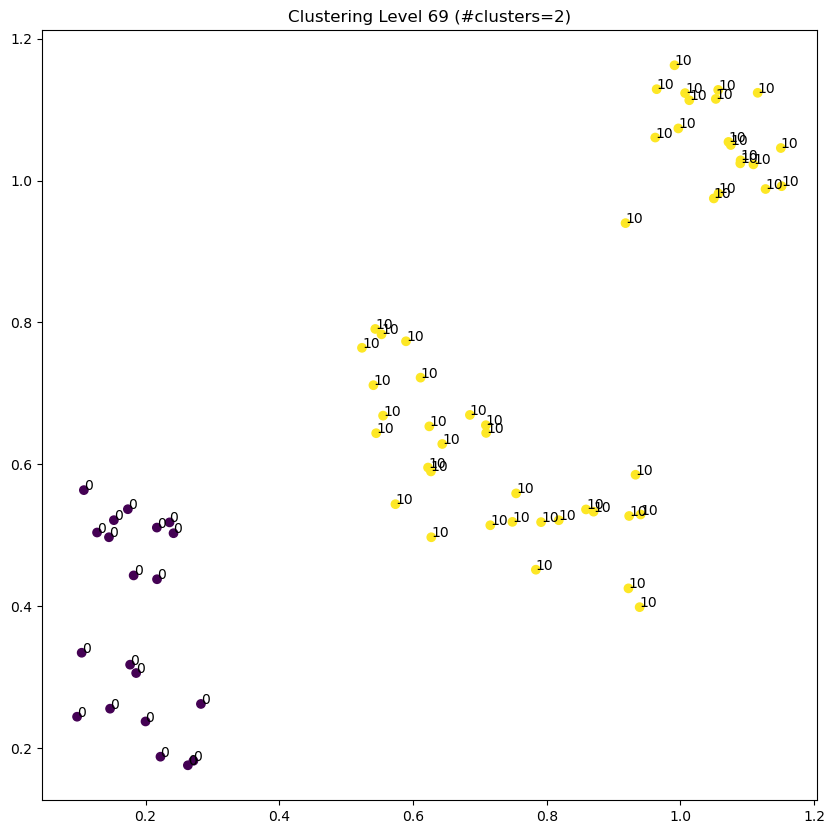

0.0 and 10.0 merged at distance 1.3452080063161482


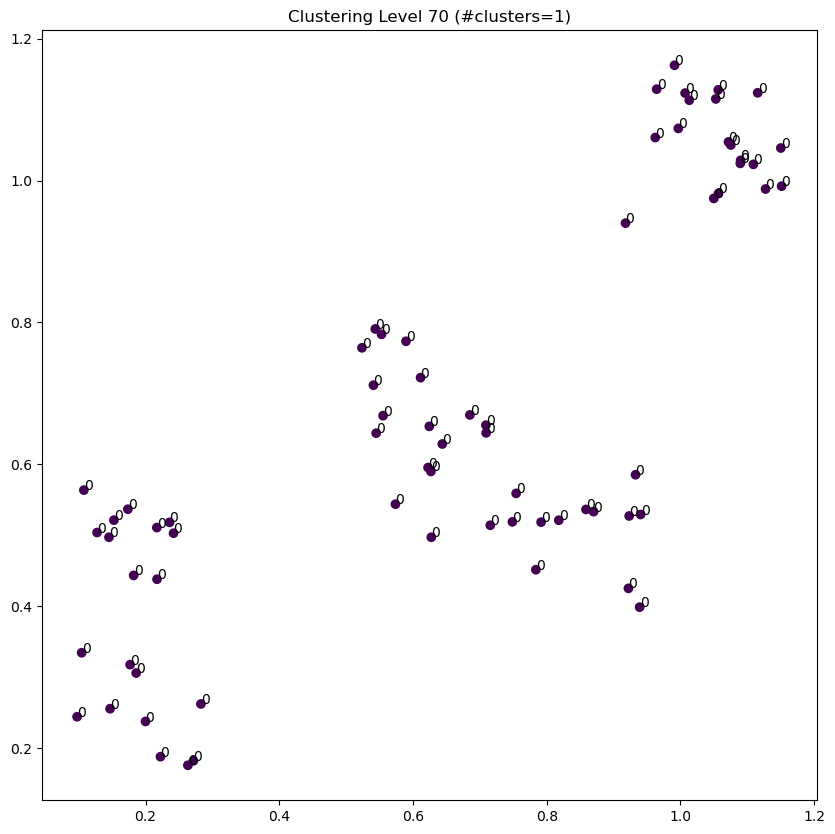

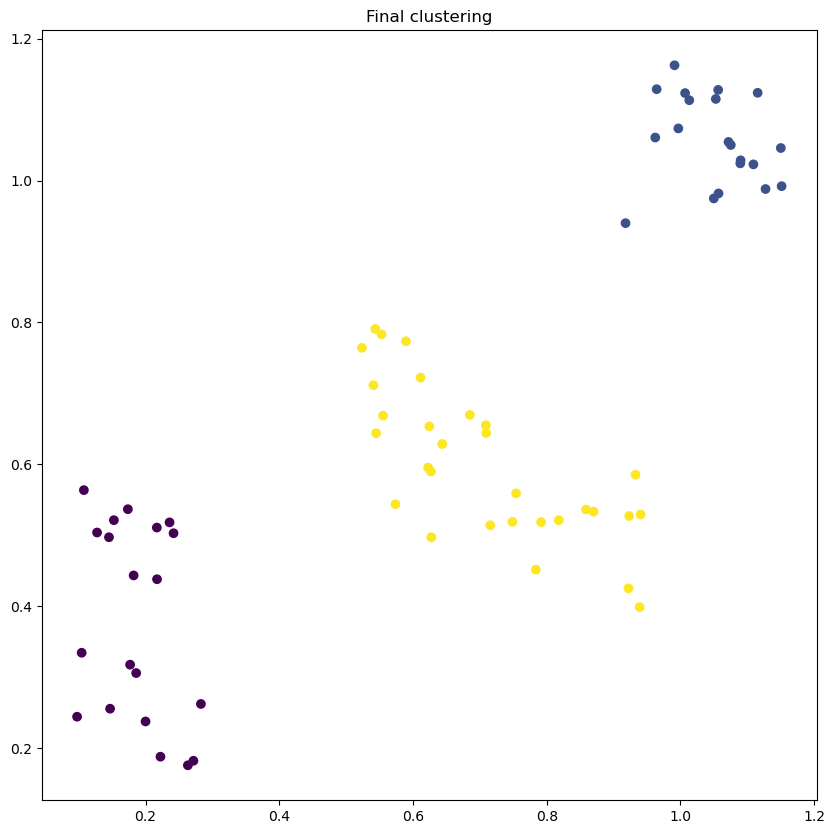

In [62]:
cl = AgglomerativeClustering(linkage_type="complete_linkage")
cl.fit(points)
cl.show_clusterings()
cl.show_clustering(k=3)

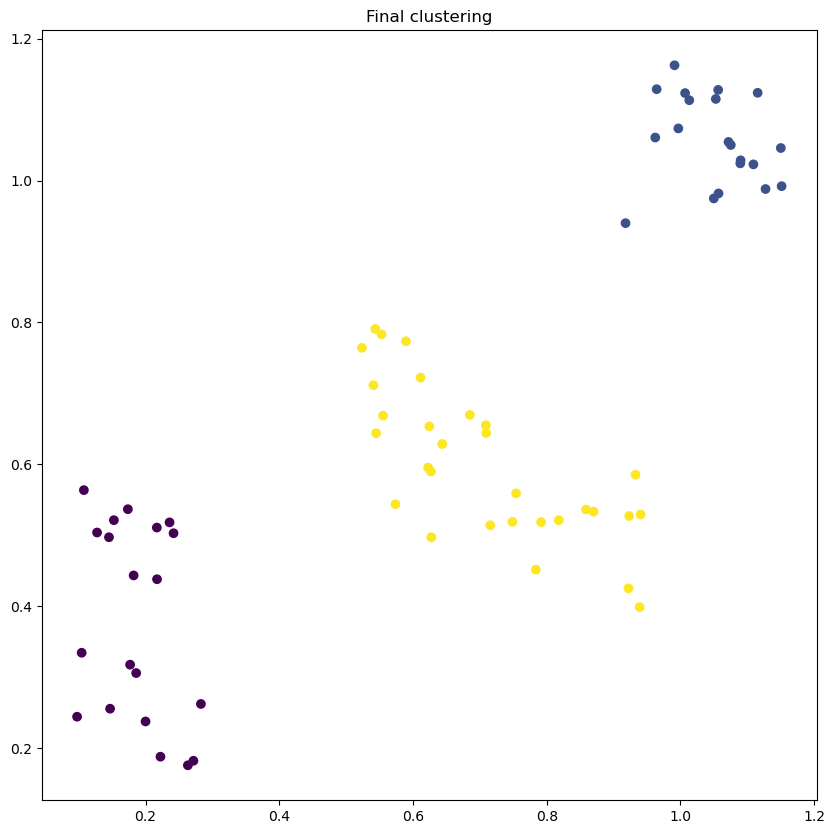

In [61]:
al = AgglomerativeClustering(linkage_type="average_linkage")
al.fit(points)
al.show_clustering(k=3)